# **Problem Set 8**

## **Tasks**
- Assembling A and S matrices
- Calculating d, Dpro, Dstr, Dprof
- Answering the multiple choice questions
- Providing a quantitative analysis the SPA

## **Passing requirement**
- **At least 80 points**
- **Question 1) has to be delivered on Blackboard in Assignments -> PS8 -> "PS8 - Questions BB"**
- **Question 7) has to be delivered on Blackboard in Assignments -> PS8 -> "PS8 - Questions BB"**

**Answers to questions 1) and 7) count for 15 points in total. Write your answers in the word template provided in Assignments -> PS8 -> "PS8 - Questions BB" converted to a pdf file!**

**_Please run the cell below before you start the assignment_**

In [1]:
# Import required Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import files_PS8_V1_0.run_SPA_folder.run_SPA as run_SPA

# Folder for the files
files_folder = "files_PS8_V1_0/"

### In case formulas are entered in the csv files & correcting the datatypes
def convert_formulas(matrix):
    for row in matrix.index:
        for column in matrix.columns:
            if type(matrix.loc[row, column]) == str:
                if " " in matrix.loc[row, column]:
                    matrix.loc[row, column] = matrix.loc[row, column].lstrip(' ')
                if "=" in matrix.loc[row, column]:
                    matrix.loc[row, column] = matrix.loc[row, column].lstrip('=')
                matrix.loc[row, column] = pd.eval(matrix.loc[row, column])
    ### Get the data types right in the DataFrames
    s = matrix.select_dtypes(include='object').columns
    matrix[s] = matrix[s].astype("float64")
    return matrix

## **LCA of producing a bike**

Your main objective is to compare the environmental impacts for two cases: a) building the aluminium components of the bike from primary aluminium, and b) building them from old scrap aluminium (i.e. aluminium from post-consumer scrap).

The bicycle assembly plant is assumed to require inputs from three manufacturing plants: the bike frame/wheel plant, the tire plant, and another manufacturing plant producing all of the other components into a single bike. An average 400 km of road transport is assumed to be required to transport the bicycle components from the three manufacturing plants to the bicycle assembly plant. After assembling all the components, the bike has a mass of 14.9 kg. The bike is assumed to be manufactured in Europe and 1500 km of road transport is required to deliver the assembled bicycle from the assembly plant to the retail store. Please see the spreadsheet provided **‘Foreground_Background_list_PS8.csv’** in **files_PS8_V1_0** for the data on the material and energy requirements of this foreground system.

It is assumed that there are no direct emissions in the foreground system.

_**Disclaimer**: Mainstream LCA assessments normally use commercial LCI databases, such as Ecoinvent, for their background systems. These databases are, as the name indicates, commercial in nature and are as such not open access. We are therefore using an open-access mixed-unit version of EXIOBASE. This is an Input-Output database (IOT). So for your applications, you will in principle be using an IO-Hybrid LCA model rather than a conventional process-based LCA model. Have a look at [DOI: 10.5281/zenodo.7244918] and [DIO: 10.5281/zenodo.3583070] if you are interested in more details about the dataset you will be using. Please though note, that this dataset is only intended for training purposes in this course, so if you are planning to do project or thesis work on LCA, consult your supervisor to get access to suitable databases for your purpose._


## **1. Flowchart** _(5 points)_

**Instructions:** Make a flowchart of your system. Include important material/energy flows between these processes in your flowchart. Label all the nodes and label all the flows with their values and units.

This question brings 5 points and is **mandatory** for passing the assignment. You have to deliver the flowchart on Blackboard in the folder (Assignments -> PS8 -> "PS8 - Questions BB").

_The flowchart needs to be readable for us: you can do the flowchart by hand (drawing on paper and taking a picture/scanning) or you can use a software (draw on a tablet, use PowerPoint, Lucidchart, Miro, etc.). **Place the flowchart in the word template saved in pdf!**_

## **2. Data preparation** _(5 points)_

Run the cell below to import `Aff`, `Abf`, `Afb` and `Abb` as Pandas DataFrames.

In [2]:
Aff = convert_formulas(pd.read_csv(files_folder + 'Aff.csv', sep = ',', index_col = [0]))
Abf = convert_formulas(pd.read_csv(files_folder + 'Abf.csv', sep = ',', index_col = [0]))
Afb = convert_formulas(pd.read_csv(files_folder + 'Afb.csv', sep = ',', index_col = [0]))
Abb = convert_formulas(pd.read_csv(files_folder + 'Abb.csv', sep = ',', index_col = [0]))

Run the cell below to get the `C` matrix.

In [3]:
C = pd.read_csv(files_folder + 'C.csv', sep = ',', index_col = [0])

Run the cell below to get the `Sb` matrix.

In [4]:
Sb = pd.read_csv(files_folder + 'Sb.csv', sep = ',', index_col = [0])

Define `Sf` (think if it should contain values or not) and build the entire `S` matrix.

In [5]:
Sf = pd.DataFrame(index=Sb.index, columns=['Bicycle at retail', 'Bicycle assembly', 'Bike frame_wheel plant', 'Tire plant', 'Other manufacturing', 'Final transport', 'Components transport'])
Sf = Sf.fillna(0)
#display(Sf)
S = pd.concat([Sf, Sb], axis = 1)
S = S.fillna(0)
display(S)

,Bicycle at retail,Bicycle assembly,Bike frame_wheel plant,Tire plant,Other manufacturing,Final transport,Components transport,Paddy rice - tonnes,Wheat - tonnes,Cereal grains nec - tonnes,...,Paper for treatment: landfill - tonnes,Plastic waste for treatment: landfill - tonnes,Inert/metal/hazardous waste for treatment: landfill - tonnes,Textiles waste for treatment: landfill - tonnes,Wood waste for treatment: landfill - tonnes,Membership organisation services n.e.c. (91) - Meuro,Recreational; cultural and sporting services (92) - Meuro,Other services (93) - Meuro,Private households with employed persons (95) - Meuro,Extra-territorial organizations and bodies - Meuro
stressor,,,,,,,,,,,,,,,,,,,,,
As - air,0,0,0,0,0,0,0,1.055943e-07,3.601500e-08,2.993447e-08,...,9.604339e-05,3.819078e-05,8.114235e-07,7.528521e-05,3.076124e-05,7.352691e-03,1.343060e-01,1.592342e-02,1.141639e-03,0.0
B(a)P - air,0,0,0,0,0,0,0,4.937834e-09,2.183136e-09,1.186787e-09,...,6.558476e-06,1.299374e-06,6.901086e-08,3.767485e-06,2.315894e-06,1.428354e-03,8.907123e-03,8.976144e-03,1.276504e-05,0.0
B(k)F - air,0,0,0,0,0,0,0,3.024885e-09,1.497463e-09,1.205494e-09,...,4.164415e-06,9.694945e-07,5.078342e-08,2.482862e-06,1.757146e-06,7.682042e-04,3.183830e-03,3.360970e-03,6.734697e-06,0.0
Benzo(a)pyrene - air,0,0,0,0,0,0,0,5.485326e-04,9.029145e-04,1.067115e-03,...,1.427018e-05,5.925850e-06,9.974458e-08,1.189803e-05,5.706305e-06,7.658296e-02,2.234698e-02,8.347303e-03,6.464619e-02,0.0
Benzo(k)fluoranthene - air,0,0,0,0,0,0,0,8.627478e-09,1.697544e-08,8.415671e-09,...,6.143055e-06,2.538951e-06,4.262908e-08,3.564798e-06,1.894310e-06,4.202326e-02,4.807519e-03,3.658156e-03,3.636805e-02,0.0
CH4 - air,0,0,0,0,0,0,0,5.391245e+01,1.071145e-01,7.531363e-01,...,1.797020e+02,1.125160e+01,2.451064e-03,9.347895e+01,2.457928e+01,2.710816e+02,6.391136e+02,3.657077e+02,4.127884e+01,0.0
CO - air,0,0,0,0,0,0,0,1.077115e+00,1.678588e+00,1.252726e+00,...,2.953051e-01,1.071567e-01,2.396640e-03,2.567863e-01,1.237269e-01,1.289478e+03,1.813558e+02,1.041683e+02,9.252846e+02,0.0
CO2 - air,0,0,0,0,0,0,0,1.149402e+02,1.356389e+02,6.188169e+01,...,6.214001e+01,1.940564e+01,3.969031e-01,6.316443e+01,2.702017e+01,6.330510e+04,4.826371e+04,3.147201e+04,4.440537e+04,0.0
Cd - air,0,0,0,0,0,0,0,5.019837e-07,6.101785e-07,3.785314e-07,...,1.670036e-05,6.976356e-06,1.447249e-07,1.655773e-05,6.714583e-06,2.447039e-03,9.906529e-03,3.126851e-03,6.067787e-04,0.0


**_Run the cell under to check the format of your answer(s)_**

In [6]:
assert S.isnull().values.any() == False, 'There are still NaN values in the matrix'
assert (S.index == Sb.index).all(), 'The index do not correspond'
assert (S.columns == ['Bicycle at retail', 'Bicycle assembly', 'Bike frame_wheel plant', 'Tire plant', 'Other manufacturing', 'Final transport', 'Components transport', 
                      'Paddy rice - tonnes', 'Wheat - tonnes', 'Cereal grains nec - tonnes', 'Vegetables; fruit; nuts - tonnes', 'Oil seeds - tonnes', 'Sugar cane; sugar beet - tonnes', 'Plant-based fibers - tonnes', 'Crops nec - tonnes', 'Cattle - tonnes', 'Pigs - tonnes', 'Poultry - tonnes', 'Meat animals nec - tonnes', 'Animal products nec - tonnes', 'Raw milk - tonnes', 'Wool; silk-worm cocoons - tonnes', 'Manure (conventional treatment) - tonnes', 'Manure (biogas treatment) - tonnes', 'Products of forestry; logging and related services (02) - tonnes', 'Fish and other fishing products; services incidental of fishing (05) - tonnes', 'Anthracite - tonnes', 'Coking Coal - tonnes', 'Other Bituminous Coal - tonnes', 'Sub-Bituminous Coal - tonnes', 'Patent Fuel - tonnes', 'Lignite/Brown Coal - tonnes', 'BKB/Peat Briquettes - tonnes', 'Peat - tonnes', 'Crude petroleum and services related to crude oil extraction; excluding surveying - tonnes', 'Natural gas and services related to natural gas extraction; excluding surveying - tonnes', 'Natural Gas Liquids - tonnes', 'Other Hydrocarbons - tonnes', 'Uranium and thorium ores (12) - tonnes', 'Iron ores - tonnes', 'Copper ores and concentrates - tonnes', 'Nickel ores and concentrates - tonnes', 'Aluminium ores and concentrates - tonnes', 'Precious metal ores and concentrates - tonnes', 'Lead; zinc and tin ores and concentrates - tonnes', 'Other non-ferrous metal ores and concentrates - tonnes', 'Stone - tonnes', 'Sand and clay - tonnes', 'Chemical and fertilizer minerals; salt and other mining and quarrying products n.e.c. - tonnes', 'Products of meat cattle - tonnes', 'Products of meat pigs - tonnes', 'Products of meat poultry - tonnes', 'Meat products nec - tonnes', 'products of Vegetable oils and fats - tonnes', 'Dairy products - tonnes', 'Processed rice - tonnes', 'Sugar - tonnes', 'Food products nec - tonnes', 'Beverages - tonnes', 'Fish products - tonnes', 'Tobacco products (16) - tonnes', 'Textiles (17) - tonnes', 'Wearing apparel; furs (18) - tonnes', 'Leather and leather products (19) - tonnes', 'Wood and products of wood and cork (except furniture); articles of straw and plaiting materials (20) - tonnes', 'Wood material for treatment; Re-processing of secondary wood material into new wood material - tonnes', 'Pulp - tonnes', 'Paper and paper products - tonnes', 'Secondary paper for treatment; Re-processing of secondary paper into new pulp - tonnes', 'Printed matter and recorded media (22) - tonnes', 'Coke Oven Coke - tonnes', 'Gas Coke - tonnes', 'Coal Tar - tonnes', 'Motor Gasoline - tonnes', 'Aviation Gasoline - tonnes', 'Gasoline Type Jet Fuel - tonnes', 'Kerosene Type Jet Fuel - tonnes', 'Kerosene - tonnes', 'Gas/Diesel Oil - tonnes', 'Heavy Fuel Oil - tonnes', 'Refinery Gas - tonnes', 'Liquefied Petroleum Gases (LPG) - tonnes', 'Refinery Feedstocks - tonnes', 'Ethane - tonnes', 'Naphtha - tonnes', 'White Spirit & SBP - tonnes', 'Lubricants - tonnes', 'Bitumen - tonnes', 'Paraffin Waxes - tonnes', 'Petroleum Coke - tonnes', 'Non-specified Petroleum Products - tonnes', 'Nuclear fuel - TJ', 'Plastics; basic - tonnes', 'Secondary plastic for treatment; Re-processing of secondary plastic into new plastic - tonnes', 'N-fertiliser - tonnes', 'P- and other fertiliser - tonnes', 'Chemicals nec - tonnes', 'Charcoal - tonnes', 'Additives/Blending Components - tonnes', 'Biogasoline - tonnes', 'Biodiesels - tonnes', 'Other Liquid Biofuels - tonnes', 'Rubber and plastic products (25) - tonnes', 'Glass and glass products - tonnes', 'Secondary glass for treatment; Re-processing of secondary glass into new glass - tonnes', 'Ceramic goods - tonnes', 'Bricks; tiles and construction products; in baked clay - tonnes', 'Cement; lime and plaster - tonnes', 'Ash for treatment; Re-processing of ash into clinker - tonnes', 'Other non-metallic mineral products - tonnes', 'Precious metals - tonnes', 'Secondary preciuos metals for treatment; Re-processing of secondary preciuos metals into new preciuos metals - tonnes', 'Aluminium and aluminium products - tonnes', 'Secondary aluminium for treatment; Re-processing of secondary aluminium into new aluminium - tonnes', 'Lead; zinc and tin and products thereof - tonnes', 'Secondary lead for treatment; Re-processing of secondary lead into new lead - tonnes', 'Copper products - tonnes', 'Secondary copper for treatment; Re-processing of secondary copper into new copper - tonnes', 'Other non-ferrous metal products - tonnes', 'Secondary other non-ferrous metals for treatment; Re-processing of secondary other non-ferrous metals into new other non-ferrous metals - tonnes', 'Foundry work services - tonnes', 'Basic iron and steel and of ferro-alloys and first products thereof - tonnes', 'Secondary steel for treatment; Re-processing of secondary steel into new steel - tonnes', 'Fabricated metal products; except machinery and equipment (28) - tonnes', 'Machinery and equipment n.e.c. (29) - tonnes', 'Office machinery and computers (30) - tonnes', 'Electrical machinery and apparatus n.e.c. (31) - tonnes', 'Radio; television and communication equipment and apparatus (32) - tonnes', 'Medical; precision and optical instruments; watches and clocks (33) - tonnes', 'Motor vehicles; trailers and semi-trailers (34) - Meuro', 'Other transport equipment (35) - Meuro', 'Furniture; other manufactured goods n.e.c. (36) - tonnes', 'Secondary raw materials - Meuro', 'Bottles for treatment; Recycling of bottles by direct reuse - tonnes', 'Electricity by coal - TJ', 'Electricity by gas - TJ', 'Electricity by nuclear - TJ', 'Electricity by hydro - TJ', 'Electricity by wind - TJ', 'Electricity by petroleum and other oil derivatives - TJ', 'Electricity by biomass and waste - TJ', 'Electricity by solar photovoltaic - TJ', 'Electricity by solar thermal - TJ', 'Electricity by tide; wave; ocean - TJ', 'Electricity by Geothermal - TJ', 'Electricity nec - TJ', 'Transmission services of electricity - Meuro', 'Distribution and trade services of electricity - Meuro', 'Distribution services of gaseous fuels through mains - Meuro', 'Coke oven gas - tonnes', 'Blast Furnace Gas - tonnes', 'Oxygen Steel Furnace Gas - tonnes', 'Gas Works Gas - tonnes', 'Biogas - tonnes', 'Steam and hot water supply services - TJ', 'Collected and purified water; distribution services of water (41) - Meuro', 'Construction work (45) - Meuro', 'Secondary construction material for treatment; Re-processing of secondary construction material into aggregates - tonnes', 'Sale; maintenance; repair of motor vehicles; motor vehicles parts; motorcycles; motor cycles parts and accessoiries - Meuro', 'Retail trade services of motor fuel - Meuro', 'Wholesale trade and commission trade services; except of motor vehicles and motorcycles (51) - Meuro', 'Retail  trade services; except of motor vehicles and motorcycles; repair services of personal and household goods (52) - Meuro', 'Hotel and restaurant services (55) - Meuro', 'Railway transportation services - Meuro', 'Other land transportation services - Meuro', 'Transportation services via pipelines - Meuro', 'Sea and coastal water transportation services - Meuro', 'Inland water transportation services - Meuro', 'Air transport services (62) - Meuro', 'Supporting and auxiliary transport services; travel agency services (63) - Meuro', 'Post and telecommunication services (64) - Meuro', 'Financial intermediation services; except insurance and pension funding services (65) - Meuro', 'Insurance and pension funding services; except compulsory social security services (66) - Meuro', 'Services auxiliary to financial intermediation (67) - Meuro', 'Real estate services (70) - Meuro', 'Renting services of machinery and equipment without operator and of personal and household goods (71) - Meuro', 'Computer and related services (72) - Meuro', 'Research and development services (73) - Meuro', 'Other business services (74) - Meuro', 'Public administration and defence services; compulsory social security services (75) - Meuro', 'Education services (80) - Meuro', 'Health and social work services (85) - Meuro', 'Food waste for treatment: incineration - tonnes', 'Paper waste for treatment: incineration - tonnes', 'Plastic waste for treatment: incineration - tonnes', 'Intert/metal waste for treatment: incineration - tonnes', 'Textiles waste for treatment: incineration - tonnes', 'Wood waste for treatment: incineration - tonnes', 'Oil/hazardous waste for treatment: incineration - tonnes', 'Food waste for treatment: biogasification and land application - tonnes', 'Paper waste for treatment: biogasification and land application - tonnes', 'Sewage sludge for treatment: biogasification and land application - tonnes', 'Food waste for treatment: composting and land application - tonnes', 'Paper and wood waste for treatment: composting and land application - tonnes', 'Food waste for treatment: waste water treatment - tonnes', 'Other waste for treatment: waste water treatment - tonnes', 'Food waste for treatment: landfill - tonnes', 'Paper for treatment: landfill - tonnes', 'Plastic waste for treatment: landfill - tonnes', 'Inert/metal/hazardous waste for treatment: landfill - tonnes', 'Textiles waste for treatment: landfill - tonnes', 'Wood waste for treatment: landfill - tonnes', 'Membership organisation services n.e.c. (91) - Meuro', 'Recreational; cultural and sporting services (92) - Meuro', 'Other services (93) - Meuro', 'Private households with employed persons (95) - Meuro', 'Extra-territorial organizations and bodies - Meuro'
                     ]).all(), 'The columns do not correspond'

## **3. Bike using primary aluminium** _(30 points)_

#### **3a)** _(5 points)_ Fill in `Aff`
For that, you have two options: 
- Option 1: filling in csv file located in the **files_PS8_V1_0** folder and save the csv files by using "ctrl+s". **If you are calculating some numbers, you should enter the formulas in the table.**
- Option 2: filling in the table in the cell below using the pandas loc fonction

**About the units for "Final transport" and "Components transport" in the foreground system**: In LCA, it is common to model transport in tkm (tonne-km) which means that you have to multiply the mass (in tonnes) of the product being transported with the distance (in km) it is being transported.

In [7]:
Aff = Aff.fillna(0)
display(Aff)

,Bicycle at retail,Bicycle assembly,Bike frame_wheel plant,Tire plant,Other manufacturing,Final transport,Components transport
Bicycle at retail,0.00,0.00,0.0,0.0,0.0,0.0,0.0
Bicycle assembly,1.00,0.00,0.0,0.0,0.0,0.0,0.0
Bike frame_wheel plant,0.00,1.00,0.0,0.0,0.0,0.0,0.0
Tire plant,0.00,1.00,0.0,0.0,0.0,0.0,0.0
Other manufacturing,0.00,1.00,0.0,0.0,0.0,0.0,0.0
Final transport,22.35,0.00,0.0,0.0,0.0,0.0,0.0
Components transport,0.00,5.96,0.0,0.0,0.0,0.0,0.0


**_Run the cell under to check the format of your answer(s)_**

In [8]:
assert Aff.isnull().values.any() == False, 'There are still NaN values in the matrix'
assert (Aff.index == ['Bicycle at retail', 'Bicycle assembly', 'Bike frame_wheel plant', 'Tire plant', 'Other manufacturing', 'Final transport','Components transport'
                     ]).all(), 'The index do not correspond'
assert (Aff.columns == ['Bicycle at retail', 'Bicycle assembly', 'Bike frame_wheel plant', 'Tire plant', 'Other manufacturing', 'Final transport', 'Components transport'
                       ]).all(), 'The columns do not correspond'

#### **3b)** _(5 points)_ Fill in `Abf`

Use the file Foreground_Background_list_PS8.csv to fill in `Abf`. For that, you have two options: 
- Option 1: filling in csv file located in the **files_PS8_V1_0** folder and save the csv files by using "ctrl+s". **If you are calculating some numbers, you should enter the formulas in the table.**
- Option 2: filling in the table in the cell below using the function `fill_in_matrix_from_table(matrix, table)` which is given to transform data from a one column table to a matrix and the table **‘Foreground_Background_list_PS8.csv’**. 

Using Option 2 function avoids to filling in the matrix manually and prevents forgetting values, but you are free to choose.

In [9]:
def fill_in_matrix_from_table(matrix, table):
    for i in matrix.index:
        for j in matrix.columns:
            if table[(table['Background process'] == i) & (table['Foreground process'] == j)]['Value'].empty == False:
                matrix.loc[i, j] = table[(table['Background process'] == i) & (table['Foreground process'] == j)]['Value'].values[0]
    return matrix

### This is importing the table for using the function fill_in_matrix_from_table(matrix, table)
Abf_list = pd.read_csv(files_folder + 'Foreground_Background_list_PS8.csv')

In [10]:
fill_in_matrix_from_table(Abf, Abf_list)
Abf = Abf.fillna(0)
#display(Abf)

**_Run the cell under to check the format of your answer(s)_**

In [11]:
assert Abf.isnull().values.any() == False, 'There are still NaN values in the matrix'
assert (Abf.index == ['Paddy rice - tonnes', 'Wheat - tonnes', 'Cereal grains nec - tonnes', 'Vegetables; fruit; nuts - tonnes', 'Oil seeds - tonnes', 'Sugar cane; sugar beet - tonnes', 'Plant-based fibers - tonnes', 'Crops nec - tonnes', 'Cattle - tonnes', 'Pigs - tonnes', 'Poultry - tonnes', 'Meat animals nec - tonnes', 'Animal products nec - tonnes', 'Raw milk - tonnes', 'Wool; silk-worm cocoons - tonnes', 'Manure (conventional treatment) - tonnes', 'Manure (biogas treatment) - tonnes', 'Products of forestry; logging and related services (02) - tonnes', 'Fish and other fishing products; services incidental of fishing (05) - tonnes', 'Anthracite - tonnes', 'Coking Coal - tonnes', 'Other Bituminous Coal - tonnes', 'Sub-Bituminous Coal - tonnes', 'Patent Fuel - tonnes', 'Lignite/Brown Coal - tonnes', 'BKB/Peat Briquettes - tonnes', 'Peat - tonnes', 'Crude petroleum and services related to crude oil extraction; excluding surveying - tonnes', 'Natural gas and services related to natural gas extraction; excluding surveying - tonnes', 'Natural Gas Liquids - tonnes', 'Other Hydrocarbons - tonnes', 'Uranium and thorium ores (12) - tonnes', 'Iron ores - tonnes', 'Copper ores and concentrates - tonnes', 'Nickel ores and concentrates - tonnes', 'Aluminium ores and concentrates - tonnes', 'Precious metal ores and concentrates - tonnes', 'Lead; zinc and tin ores and concentrates - tonnes', 'Other non-ferrous metal ores and concentrates - tonnes', 'Stone - tonnes', 'Sand and clay - tonnes', 'Chemical and fertilizer minerals; salt and other mining and quarrying products n.e.c. - tonnes', 'Products of meat cattle - tonnes', 'Products of meat pigs - tonnes', 'Products of meat poultry - tonnes', 'Meat products nec - tonnes', 'products of Vegetable oils and fats - tonnes', 'Dairy products - tonnes', 'Processed rice - tonnes', 'Sugar - tonnes', 'Food products nec - tonnes', 'Beverages - tonnes', 'Fish products - tonnes', 'Tobacco products (16) - tonnes', 'Textiles (17) - tonnes', 'Wearing apparel; furs (18) - tonnes', 'Leather and leather products (19) - tonnes', 'Wood and products of wood and cork (except furniture); articles of straw and plaiting materials (20) - tonnes', 'Wood material for treatment; Re-processing of secondary wood material into new wood material - tonnes', 'Pulp - tonnes', 'Paper and paper products - tonnes', 'Secondary paper for treatment; Re-processing of secondary paper into new pulp - tonnes', 'Printed matter and recorded media (22) - tonnes', 'Coke Oven Coke - tonnes', 'Gas Coke - tonnes', 'Coal Tar - tonnes', 'Motor Gasoline - tonnes', 'Aviation Gasoline - tonnes', 'Gasoline Type Jet Fuel - tonnes', 'Kerosene Type Jet Fuel - tonnes', 'Kerosene - tonnes', 'Gas/Diesel Oil - tonnes', 'Heavy Fuel Oil - tonnes', 'Refinery Gas - tonnes', 'Liquefied Petroleum Gases (LPG) - tonnes', 'Refinery Feedstocks - tonnes', 'Ethane - tonnes', 'Naphtha - tonnes', 'White Spirit & SBP - tonnes', 'Lubricants - tonnes', 'Bitumen - tonnes', 'Paraffin Waxes - tonnes', 'Petroleum Coke - tonnes', 'Non-specified Petroleum Products - tonnes', 'Nuclear fuel - TJ', 'Plastics; basic - tonnes', 'Secondary plastic for treatment; Re-processing of secondary plastic into new plastic - tonnes', 'N-fertiliser - tonnes', 'P- and other fertiliser - tonnes', 'Chemicals nec - tonnes', 'Charcoal - tonnes', 'Additives/Blending Components - tonnes', 'Biogasoline - tonnes', 'Biodiesels - tonnes', 'Other Liquid Biofuels - tonnes', 'Rubber and plastic products (25) - tonnes', 'Glass and glass products - tonnes', 'Secondary glass for treatment; Re-processing of secondary glass into new glass - tonnes', 'Ceramic goods - tonnes', 'Bricks; tiles and construction products; in baked clay - tonnes', 'Cement; lime and plaster - tonnes', 'Ash for treatment; Re-processing of ash into clinker - tonnes', 'Other non-metallic mineral products - tonnes', 'Precious metals - tonnes', 'Secondary preciuos metals for treatment; Re-processing of secondary preciuos metals into new preciuos metals - tonnes', 'Aluminium and aluminium products - tonnes', 'Secondary aluminium for treatment; Re-processing of secondary aluminium into new aluminium - tonnes', 'Lead; zinc and tin and products thereof - tonnes', 'Secondary lead for treatment; Re-processing of secondary lead into new lead - tonnes', 'Copper products - tonnes', 'Secondary copper for treatment; Re-processing of secondary copper into new copper - tonnes', 'Other non-ferrous metal products - tonnes', 'Secondary other non-ferrous metals for treatment; Re-processing of secondary other non-ferrous metals into new other non-ferrous metals - tonnes', 'Foundry work services - tonnes', 'Basic iron and steel and of ferro-alloys and first products thereof - tonnes', 'Secondary steel for treatment; Re-processing of secondary steel into new steel - tonnes', 'Fabricated metal products; except machinery and equipment (28) - tonnes', 'Machinery and equipment n.e.c. (29) - tonnes', 'Office machinery and computers (30) - tonnes', 'Electrical machinery and apparatus n.e.c. (31) - tonnes', 'Radio; television and communication equipment and apparatus (32) - tonnes', 'Medical; precision and optical instruments; watches and clocks (33) - tonnes', 'Motor vehicles; trailers and semi-trailers (34) - Meuro', 'Other transport equipment (35) - Meuro', 'Furniture; other manufactured goods n.e.c. (36) - tonnes', 'Secondary raw materials - Meuro', 'Bottles for treatment; Recycling of bottles by direct reuse - tonnes', 'Electricity by coal - TJ', 'Electricity by gas - TJ', 'Electricity by nuclear - TJ', 'Electricity by hydro - TJ', 'Electricity by wind - TJ', 'Electricity by petroleum and other oil derivatives - TJ', 'Electricity by biomass and waste - TJ', 'Electricity by solar photovoltaic - TJ', 'Electricity by solar thermal - TJ', 'Electricity by tide; wave; ocean - TJ', 'Electricity by Geothermal - TJ', 'Electricity nec - TJ', 'Transmission services of electricity - Meuro', 'Distribution and trade services of electricity - Meuro', 'Distribution services of gaseous fuels through mains - Meuro', 'Coke oven gas - tonnes', 'Blast Furnace Gas - tonnes', 'Oxygen Steel Furnace Gas - tonnes', 'Gas Works Gas - tonnes', 'Biogas - tonnes', 'Steam and hot water supply services - TJ', 'Collected and purified water; distribution services of water (41) - Meuro', 'Construction work (45) - Meuro', 'Secondary construction material for treatment; Re-processing of secondary construction material into aggregates - tonnes', 'Sale; maintenance; repair of motor vehicles; motor vehicles parts; motorcycles; motor cycles parts and accessoiries - Meuro', 'Retail trade services of motor fuel - Meuro', 'Wholesale trade and commission trade services; except of motor vehicles and motorcycles (51) - Meuro', 'Retail  trade services; except of motor vehicles and motorcycles; repair services of personal and household goods (52) - Meuro', 'Hotel and restaurant services (55) - Meuro', 'Railway transportation services - Meuro', 'Other land transportation services - Meuro', 'Transportation services via pipelines - Meuro', 'Sea and coastal water transportation services - Meuro', 'Inland water transportation services - Meuro', 'Air transport services (62) - Meuro', 'Supporting and auxiliary transport services; travel agency services (63) - Meuro', 'Post and telecommunication services (64) - Meuro', 'Financial intermediation services; except insurance and pension funding services (65) - Meuro', 'Insurance and pension funding services; except compulsory social security services (66) - Meuro', 'Services auxiliary to financial intermediation (67) - Meuro', 'Real estate services (70) - Meuro', 'Renting services of machinery and equipment without operator and of personal and household goods (71) - Meuro', 'Computer and related services (72) - Meuro', 'Research and development services (73) - Meuro', 'Other business services (74) - Meuro', 'Public administration and defence services; compulsory social security services (75) - Meuro', 'Education services (80) - Meuro', 'Health and social work services (85) - Meuro', 'Food waste for treatment: incineration - tonnes', 'Paper waste for treatment: incineration - tonnes', 'Plastic waste for treatment: incineration - tonnes', 'Intert/metal waste for treatment: incineration - tonnes', 'Textiles waste for treatment: incineration - tonnes', 'Wood waste for treatment: incineration - tonnes', 'Oil/hazardous waste for treatment: incineration - tonnes', 'Food waste for treatment: biogasification and land application - tonnes', 'Paper waste for treatment: biogasification and land application - tonnes', 'Sewage sludge for treatment: biogasification and land application - tonnes', 'Food waste for treatment: composting and land application - tonnes', 'Paper and wood waste for treatment: composting and land application - tonnes', 'Food waste for treatment: waste water treatment - tonnes', 'Other waste for treatment: waste water treatment - tonnes', 'Food waste for treatment: landfill - tonnes', 'Paper for treatment: landfill - tonnes', 'Plastic waste for treatment: landfill - tonnes', 'Inert/metal/hazardous waste for treatment: landfill - tonnes', 'Textiles waste for treatment: landfill - tonnes', 'Wood waste for treatment: landfill - tonnes', 'Membership organisation services n.e.c. (91) - Meuro', 'Recreational; cultural and sporting services (92) - Meuro', 'Other services (93) - Meuro', 'Private households with employed persons (95) - Meuro', 'Extra-territorial organizations and bodies - Meuro'
                     ]).all(), 'The index do not correspond'
assert (Abf.columns == ['Bicycle at retail', 'Bicycle assembly', 'Bike frame_wheel plant', 'Tire plant', 'Other manufacturing', 'Final transport', 'Components transport'
                       ]).all(), 'The columns do not correspond'

#### **3c)** _(5 points)_ Fill in `Afb`, build the `A` matrix and calculate the `L` matrix

In [12]:
Afb = pd.DataFrame()
A1 = pd.concat([Aff, Afb], axis = 1)
A2 = pd.concat([Abf, Abb], axis = 1)
A = pd.concat([A1, A2], axis = 0)
A = A.fillna(0)
#display(A)

I = np.identity(207)
Larr = np.linalg.inv(I-A)
L = pd.DataFrame(Larr, index = ['Bicycle at retail', 'Bicycle assembly', 'Bike frame_wheel plant', 'Tire plant', 'Other manufacturing', 'Final transport', 'Components transport',
                       'Paddy rice - tonnes', 'Wheat - tonnes', 'Cereal grains nec - tonnes', 'Vegetables; fruit; nuts - tonnes', 'Oil seeds - tonnes', 'Sugar cane; sugar beet - tonnes', 'Plant-based fibers - tonnes', 'Crops nec - tonnes', 'Cattle - tonnes', 'Pigs - tonnes', 'Poultry - tonnes', 'Meat animals nec - tonnes', 'Animal products nec - tonnes', 'Raw milk - tonnes', 'Wool; silk-worm cocoons - tonnes', 'Manure (conventional treatment) - tonnes', 'Manure (biogas treatment) - tonnes', 'Products of forestry; logging and related services (02) - tonnes', 'Fish and other fishing products; services incidental of fishing (05) - tonnes', 'Anthracite - tonnes', 'Coking Coal - tonnes', 'Other Bituminous Coal - tonnes', 'Sub-Bituminous Coal - tonnes', 'Patent Fuel - tonnes', 'Lignite/Brown Coal - tonnes', 'BKB/Peat Briquettes - tonnes', 'Peat - tonnes', 'Crude petroleum and services related to crude oil extraction; excluding surveying - tonnes', 'Natural gas and services related to natural gas extraction; excluding surveying - tonnes', 'Natural Gas Liquids - tonnes', 'Other Hydrocarbons - tonnes', 'Uranium and thorium ores (12) - tonnes', 'Iron ores - tonnes', 'Copper ores and concentrates - tonnes', 'Nickel ores and concentrates - tonnes', 'Aluminium ores and concentrates - tonnes', 'Precious metal ores and concentrates - tonnes', 'Lead; zinc and tin ores and concentrates - tonnes', 'Other non-ferrous metal ores and concentrates - tonnes', 'Stone - tonnes', 'Sand and clay - tonnes', 'Chemical and fertilizer minerals; salt and other mining and quarrying products n.e.c. - tonnes', 'Products of meat cattle - tonnes', 'Products of meat pigs - tonnes', 'Products of meat poultry - tonnes', 'Meat products nec - tonnes', 'products of Vegetable oils and fats - tonnes', 'Dairy products - tonnes', 'Processed rice - tonnes', 'Sugar - tonnes', 'Food products nec - tonnes', 'Beverages - tonnes', 'Fish products - tonnes', 'Tobacco products (16) - tonnes', 'Textiles (17) - tonnes', 'Wearing apparel; furs (18) - tonnes', 'Leather and leather products (19) - tonnes', 'Wood and products of wood and cork (except furniture); articles of straw and plaiting materials (20) - tonnes', 'Wood material for treatment; Re-processing of secondary wood material into new wood material - tonnes', 'Pulp - tonnes', 'Paper and paper products - tonnes', 'Secondary paper for treatment; Re-processing of secondary paper into new pulp - tonnes', 'Printed matter and recorded media (22) - tonnes', 'Coke Oven Coke - tonnes', 'Gas Coke - tonnes', 'Coal Tar - tonnes', 'Motor Gasoline - tonnes', 'Aviation Gasoline - tonnes', 'Gasoline Type Jet Fuel - tonnes', 'Kerosene Type Jet Fuel - tonnes', 'Kerosene - tonnes', 'Gas/Diesel Oil - tonnes', 'Heavy Fuel Oil - tonnes', 'Refinery Gas - tonnes', 'Liquefied Petroleum Gases (LPG) - tonnes', 'Refinery Feedstocks - tonnes', 'Ethane - tonnes', 'Naphtha - tonnes', 'White Spirit & SBP - tonnes', 'Lubricants - tonnes', 'Bitumen - tonnes', 'Paraffin Waxes - tonnes', 'Petroleum Coke - tonnes', 'Non-specified Petroleum Products - tonnes', 'Nuclear fuel - TJ', 'Plastics; basic - tonnes', 'Secondary plastic for treatment; Re-processing of secondary plastic into new plastic - tonnes', 'N-fertiliser - tonnes', 'P- and other fertiliser - tonnes', 'Chemicals nec - tonnes', 'Charcoal - tonnes', 'Additives/Blending Components - tonnes', 'Biogasoline - tonnes', 'Biodiesels - tonnes', 'Other Liquid Biofuels - tonnes', 'Rubber and plastic products (25) - tonnes', 'Glass and glass products - tonnes', 'Secondary glass for treatment; Re-processing of secondary glass into new glass - tonnes', 'Ceramic goods - tonnes', 'Bricks; tiles and construction products; in baked clay - tonnes', 'Cement; lime and plaster - tonnes', 'Ash for treatment; Re-processing of ash into clinker - tonnes', 'Other non-metallic mineral products - tonnes', 'Precious metals - tonnes', 'Secondary preciuos metals for treatment; Re-processing of secondary preciuos metals into new preciuos metals - tonnes', 'Aluminium and aluminium products - tonnes', 'Secondary aluminium for treatment; Re-processing of secondary aluminium into new aluminium - tonnes', 'Lead; zinc and tin and products thereof - tonnes', 'Secondary lead for treatment; Re-processing of secondary lead into new lead - tonnes', 'Copper products - tonnes', 'Secondary copper for treatment; Re-processing of secondary copper into new copper - tonnes', 'Other non-ferrous metal products - tonnes', 'Secondary other non-ferrous metals for treatment; Re-processing of secondary other non-ferrous metals into new other non-ferrous metals - tonnes', 'Foundry work services - tonnes', 'Basic iron and steel and of ferro-alloys and first products thereof - tonnes', 'Secondary steel for treatment; Re-processing of secondary steel into new steel - tonnes', 'Fabricated metal products; except machinery and equipment (28) - tonnes', 'Machinery and equipment n.e.c. (29) - tonnes', 'Office machinery and computers (30) - tonnes', 'Electrical machinery and apparatus n.e.c. (31) - tonnes', 'Radio; television and communication equipment and apparatus (32) - tonnes', 'Medical; precision and optical instruments; watches and clocks (33) - tonnes', 'Motor vehicles; trailers and semi-trailers (34) - Meuro', 'Other transport equipment (35) - Meuro', 'Furniture; other manufactured goods n.e.c. (36) - tonnes', 'Secondary raw materials - Meuro', 'Bottles for treatment; Recycling of bottles by direct reuse - tonnes', 'Electricity by coal - TJ', 'Electricity by gas - TJ', 'Electricity by nuclear - TJ', 'Electricity by hydro - TJ', 'Electricity by wind - TJ', 'Electricity by petroleum and other oil derivatives - TJ', 'Electricity by biomass and waste - TJ', 'Electricity by solar photovoltaic - TJ', 'Electricity by solar thermal - TJ', 'Electricity by tide; wave; ocean - TJ', 'Electricity by Geothermal - TJ', 'Electricity nec - TJ', 'Transmission services of electricity - Meuro', 'Distribution and trade services of electricity - Meuro', 'Distribution services of gaseous fuels through mains - Meuro', 'Coke oven gas - tonnes', 'Blast Furnace Gas - tonnes', 'Oxygen Steel Furnace Gas - tonnes', 'Gas Works Gas - tonnes', 'Biogas - tonnes', 'Steam and hot water supply services - TJ', 'Collected and purified water; distribution services of water (41) - Meuro', 'Construction work (45) - Meuro', 'Secondary construction material for treatment; Re-processing of secondary construction material into aggregates - tonnes', 'Sale; maintenance; repair of motor vehicles; motor vehicles parts; motorcycles; motor cycles parts and accessoiries - Meuro', 'Retail trade services of motor fuel - Meuro', 'Wholesale trade and commission trade services; except of motor vehicles and motorcycles (51) - Meuro', 'Retail  trade services; except of motor vehicles and motorcycles; repair services of personal and household goods (52) - Meuro', 'Hotel and restaurant services (55) - Meuro', 'Railway transportation services - Meuro', 'Other land transportation services - Meuro', 'Transportation services via pipelines - Meuro', 'Sea and coastal water transportation services - Meuro', 'Inland water transportation services - Meuro', 'Air transport services (62) - Meuro', 'Supporting and auxiliary transport services; travel agency services (63) - Meuro', 'Post and telecommunication services (64) - Meuro', 'Financial intermediation services; except insurance and pension funding services (65) - Meuro', 'Insurance and pension funding services; except compulsory social security services (66) - Meuro', 'Services auxiliary to financial intermediation (67) - Meuro', 'Real estate services (70) - Meuro', 'Renting services of machinery and equipment without operator and of personal and household goods (71) - Meuro', 'Computer and related services (72) - Meuro', 'Research and development services (73) - Meuro', 'Other business services (74) - Meuro', 'Public administration and defence services; compulsory social security services (75) - Meuro', 'Education services (80) - Meuro', 'Health and social work services (85) - Meuro', 'Food waste for treatment: incineration - tonnes', 'Paper waste for treatment: incineration - tonnes', 'Plastic waste for treatment: incineration - tonnes', 'Intert/metal waste for treatment: incineration - tonnes', 'Textiles waste for treatment: incineration - tonnes', 'Wood waste for treatment: incineration - tonnes', 'Oil/hazardous waste for treatment: incineration - tonnes', 'Food waste for treatment: biogasification and land application - tonnes', 'Paper waste for treatment: biogasification and land application - tonnes', 'Sewage sludge for treatment: biogasification and land application - tonnes', 'Food waste for treatment: composting and land application - tonnes', 'Paper and wood waste for treatment: composting and land application - tonnes', 'Food waste for treatment: waste water treatment - tonnes', 'Other waste for treatment: waste water treatment - tonnes', 'Food waste for treatment: landfill - tonnes', 'Paper for treatment: landfill - tonnes', 'Plastic waste for treatment: landfill - tonnes', 'Inert/metal/hazardous waste for treatment: landfill - tonnes', 'Textiles waste for treatment: landfill - tonnes', 'Wood waste for treatment: landfill - tonnes', 'Membership organisation services n.e.c. (91) - Meuro', 'Recreational; cultural and sporting services (92) - Meuro', 'Other services (93) - Meuro', 'Private households with employed persons (95) - Meuro', 'Extra-territorial organizations and bodies - Meuro'
                     ], columns = ['Bicycle at retail', 'Bicycle assembly', 'Bike frame_wheel plant', 'Tire plant', 'Other manufacturing', 'Final transport', 'Components transport',
                       'Paddy rice - tonnes', 'Wheat - tonnes', 'Cereal grains nec - tonnes', 'Vegetables; fruit; nuts - tonnes', 'Oil seeds - tonnes', 'Sugar cane; sugar beet - tonnes', 'Plant-based fibers - tonnes', 'Crops nec - tonnes', 'Cattle - tonnes', 'Pigs - tonnes', 'Poultry - tonnes', 'Meat animals nec - tonnes', 'Animal products nec - tonnes', 'Raw milk - tonnes', 'Wool; silk-worm cocoons - tonnes', 'Manure (conventional treatment) - tonnes', 'Manure (biogas treatment) - tonnes', 'Products of forestry; logging and related services (02) - tonnes', 'Fish and other fishing products; services incidental of fishing (05) - tonnes', 'Anthracite - tonnes', 'Coking Coal - tonnes', 'Other Bituminous Coal - tonnes', 'Sub-Bituminous Coal - tonnes', 'Patent Fuel - tonnes', 'Lignite/Brown Coal - tonnes', 'BKB/Peat Briquettes - tonnes', 'Peat - tonnes', 'Crude petroleum and services related to crude oil extraction; excluding surveying - tonnes', 'Natural gas and services related to natural gas extraction; excluding surveying - tonnes', 'Natural Gas Liquids - tonnes', 'Other Hydrocarbons - tonnes', 'Uranium and thorium ores (12) - tonnes', 'Iron ores - tonnes', 'Copper ores and concentrates - tonnes', 'Nickel ores and concentrates - tonnes', 'Aluminium ores and concentrates - tonnes', 'Precious metal ores and concentrates - tonnes', 'Lead; zinc and tin ores and concentrates - tonnes', 'Other non-ferrous metal ores and concentrates - tonnes', 'Stone - tonnes', 'Sand and clay - tonnes', 'Chemical and fertilizer minerals; salt and other mining and quarrying products n.e.c. - tonnes', 'Products of meat cattle - tonnes', 'Products of meat pigs - tonnes', 'Products of meat poultry - tonnes', 'Meat products nec - tonnes', 'products of Vegetable oils and fats - tonnes', 'Dairy products - tonnes', 'Processed rice - tonnes', 'Sugar - tonnes', 'Food products nec - tonnes', 'Beverages - tonnes', 'Fish products - tonnes', 'Tobacco products (16) - tonnes', 'Textiles (17) - tonnes', 'Wearing apparel; furs (18) - tonnes', 'Leather and leather products (19) - tonnes', 'Wood and products of wood and cork (except furniture); articles of straw and plaiting materials (20) - tonnes', 'Wood material for treatment; Re-processing of secondary wood material into new wood material - tonnes', 'Pulp - tonnes', 'Paper and paper products - tonnes', 'Secondary paper for treatment; Re-processing of secondary paper into new pulp - tonnes', 'Printed matter and recorded media (22) - tonnes', 'Coke Oven Coke - tonnes', 'Gas Coke - tonnes', 'Coal Tar - tonnes', 'Motor Gasoline - tonnes', 'Aviation Gasoline - tonnes', 'Gasoline Type Jet Fuel - tonnes', 'Kerosene Type Jet Fuel - tonnes', 'Kerosene - tonnes', 'Gas/Diesel Oil - tonnes', 'Heavy Fuel Oil - tonnes', 'Refinery Gas - tonnes', 'Liquefied Petroleum Gases (LPG) - tonnes', 'Refinery Feedstocks - tonnes', 'Ethane - tonnes', 'Naphtha - tonnes', 'White Spirit & SBP - tonnes', 'Lubricants - tonnes', 'Bitumen - tonnes', 'Paraffin Waxes - tonnes', 'Petroleum Coke - tonnes', 'Non-specified Petroleum Products - tonnes', 'Nuclear fuel - TJ', 'Plastics; basic - tonnes', 'Secondary plastic for treatment; Re-processing of secondary plastic into new plastic - tonnes', 'N-fertiliser - tonnes', 'P- and other fertiliser - tonnes', 'Chemicals nec - tonnes', 'Charcoal - tonnes', 'Additives/Blending Components - tonnes', 'Biogasoline - tonnes', 'Biodiesels - tonnes', 'Other Liquid Biofuels - tonnes', 'Rubber and plastic products (25) - tonnes', 'Glass and glass products - tonnes', 'Secondary glass for treatment; Re-processing of secondary glass into new glass - tonnes', 'Ceramic goods - tonnes', 'Bricks; tiles and construction products; in baked clay - tonnes', 'Cement; lime and plaster - tonnes', 'Ash for treatment; Re-processing of ash into clinker - tonnes', 'Other non-metallic mineral products - tonnes', 'Precious metals - tonnes', 'Secondary preciuos metals for treatment; Re-processing of secondary preciuos metals into new preciuos metals - tonnes', 'Aluminium and aluminium products - tonnes', 'Secondary aluminium for treatment; Re-processing of secondary aluminium into new aluminium - tonnes', 'Lead; zinc and tin and products thereof - tonnes', 'Secondary lead for treatment; Re-processing of secondary lead into new lead - tonnes', 'Copper products - tonnes', 'Secondary copper for treatment; Re-processing of secondary copper into new copper - tonnes', 'Other non-ferrous metal products - tonnes', 'Secondary other non-ferrous metals for treatment; Re-processing of secondary other non-ferrous metals into new other non-ferrous metals - tonnes', 'Foundry work services - tonnes', 'Basic iron and steel and of ferro-alloys and first products thereof - tonnes', 'Secondary steel for treatment; Re-processing of secondary steel into new steel - tonnes', 'Fabricated metal products; except machinery and equipment (28) - tonnes', 'Machinery and equipment n.e.c. (29) - tonnes', 'Office machinery and computers (30) - tonnes', 'Electrical machinery and apparatus n.e.c. (31) - tonnes', 'Radio; television and communication equipment and apparatus (32) - tonnes', 'Medical; precision and optical instruments; watches and clocks (33) - tonnes', 'Motor vehicles; trailers and semi-trailers (34) - Meuro', 'Other transport equipment (35) - Meuro', 'Furniture; other manufactured goods n.e.c. (36) - tonnes', 'Secondary raw materials - Meuro', 'Bottles for treatment; Recycling of bottles by direct reuse - tonnes', 'Electricity by coal - TJ', 'Electricity by gas - TJ', 'Electricity by nuclear - TJ', 'Electricity by hydro - TJ', 'Electricity by wind - TJ', 'Electricity by petroleum and other oil derivatives - TJ', 'Electricity by biomass and waste - TJ', 'Electricity by solar photovoltaic - TJ', 'Electricity by solar thermal - TJ', 'Electricity by tide; wave; ocean - TJ', 'Electricity by Geothermal - TJ', 'Electricity nec - TJ', 'Transmission services of electricity - Meuro', 'Distribution and trade services of electricity - Meuro', 'Distribution services of gaseous fuels through mains - Meuro', 'Coke oven gas - tonnes', 'Blast Furnace Gas - tonnes', 'Oxygen Steel Furnace Gas - tonnes', 'Gas Works Gas - tonnes', 'Biogas - tonnes', 'Steam and hot water supply services - TJ', 'Collected and purified water; distribution services of water (41) - Meuro', 'Construction work (45) - Meuro', 'Secondary construction material for treatment; Re-processing of secondary construction material into aggregates - tonnes', 'Sale; maintenance; repair of motor vehicles; motor vehicles parts; motorcycles; motor cycles parts and accessoiries - Meuro', 'Retail trade services of motor fuel - Meuro', 'Wholesale trade and commission trade services; except of motor vehicles and motorcycles (51) - Meuro', 'Retail  trade services; except of motor vehicles and motorcycles; repair services of personal and household goods (52) - Meuro', 'Hotel and restaurant services (55) - Meuro', 'Railway transportation services - Meuro', 'Other land transportation services - Meuro', 'Transportation services via pipelines - Meuro', 'Sea and coastal water transportation services - Meuro', 'Inland water transportation services - Meuro', 'Air transport services (62) - Meuro', 'Supporting and auxiliary transport services; travel agency services (63) - Meuro', 'Post and telecommunication services (64) - Meuro', 'Financial intermediation services; except insurance and pension funding services (65) - Meuro', 'Insurance and pension funding services; except compulsory social security services (66) - Meuro', 'Services auxiliary to financial intermediation (67) - Meuro', 'Real estate services (70) - Meuro', 'Renting services of machinery and equipment without operator and of personal and household goods (71) - Meuro', 'Computer and related services (72) - Meuro', 'Research and development services (73) - Meuro', 'Other business services (74) - Meuro', 'Public administration and defence services; compulsory social security services (75) - Meuro', 'Education services (80) - Meuro', 'Health and social work services (85) - Meuro', 'Food waste for treatment: incineration - tonnes', 'Paper waste for treatment: incineration - tonnes', 'Plastic waste for treatment: incineration - tonnes', 'Intert/metal waste for treatment: incineration - tonnes', 'Textiles waste for treatment: incineration - tonnes', 'Wood waste for treatment: incineration - tonnes', 'Oil/hazardous waste for treatment: incineration - tonnes', 'Food waste for treatment: biogasification and land application - tonnes', 'Paper waste for treatment: biogasification and land application - tonnes', 'Sewage sludge for treatment: biogasification and land application - tonnes', 'Food waste for treatment: composting and land application - tonnes', 'Paper and wood waste for treatment: composting and land application - tonnes', 'Food waste for treatment: waste water treatment - tonnes', 'Other waste for treatment: waste water treatment - tonnes', 'Food waste for treatment: landfill - tonnes', 'Paper for treatment: landfill - tonnes', 'Plastic waste for treatment: landfill - tonnes', 'Inert/metal/hazardous waste for treatment: landfill - tonnes', 'Textiles waste for treatment: landfill - tonnes', 'Wood waste for treatment: landfill - tonnes', 'Membership organisation services n.e.c. (91) - Meuro', 'Recreational; cultural and sporting services (92) - Meuro', 'Other services (93) - Meuro', 'Private households with employed persons (95) - Meuro', 'Extra-territorial organizations and bodies - Meuro'
                     ])
#display(L)

**_Run the cell under to check the format of your answer(s)_**

In [13]:
assert (L.index == ['Bicycle at retail', 'Bicycle assembly', 'Bike frame_wheel plant', 'Tire plant', 'Other manufacturing', 'Final transport', 'Components transport', 
                    'Paddy rice - tonnes', 'Wheat - tonnes', 'Cereal grains nec - tonnes', 'Vegetables; fruit; nuts - tonnes', 'Oil seeds - tonnes', 'Sugar cane; sugar beet - tonnes', 'Plant-based fibers - tonnes', 'Crops nec - tonnes', 'Cattle - tonnes', 'Pigs - tonnes', 'Poultry - tonnes', 'Meat animals nec - tonnes', 'Animal products nec - tonnes', 'Raw milk - tonnes', 'Wool; silk-worm cocoons - tonnes', 'Manure (conventional treatment) - tonnes', 'Manure (biogas treatment) - tonnes', 'Products of forestry; logging and related services (02) - tonnes', 'Fish and other fishing products; services incidental of fishing (05) - tonnes', 'Anthracite - tonnes', 'Coking Coal - tonnes', 'Other Bituminous Coal - tonnes', 'Sub-Bituminous Coal - tonnes', 'Patent Fuel - tonnes', 'Lignite/Brown Coal - tonnes', 'BKB/Peat Briquettes - tonnes', 'Peat - tonnes', 'Crude petroleum and services related to crude oil extraction; excluding surveying - tonnes', 'Natural gas and services related to natural gas extraction; excluding surveying - tonnes', 'Natural Gas Liquids - tonnes', 'Other Hydrocarbons - tonnes', 'Uranium and thorium ores (12) - tonnes', 'Iron ores - tonnes', 'Copper ores and concentrates - tonnes', 'Nickel ores and concentrates - tonnes', 'Aluminium ores and concentrates - tonnes', 'Precious metal ores and concentrates - tonnes', 'Lead; zinc and tin ores and concentrates - tonnes', 'Other non-ferrous metal ores and concentrates - tonnes', 'Stone - tonnes', 'Sand and clay - tonnes', 'Chemical and fertilizer minerals; salt and other mining and quarrying products n.e.c. - tonnes', 'Products of meat cattle - tonnes', 'Products of meat pigs - tonnes', 'Products of meat poultry - tonnes', 'Meat products nec - tonnes', 'products of Vegetable oils and fats - tonnes', 'Dairy products - tonnes', 'Processed rice - tonnes', 'Sugar - tonnes', 'Food products nec - tonnes', 'Beverages - tonnes', 'Fish products - tonnes', 'Tobacco products (16) - tonnes', 'Textiles (17) - tonnes', 'Wearing apparel; furs (18) - tonnes', 'Leather and leather products (19) - tonnes', 'Wood and products of wood and cork (except furniture); articles of straw and plaiting materials (20) - tonnes', 'Wood material for treatment; Re-processing of secondary wood material into new wood material - tonnes', 'Pulp - tonnes', 'Paper and paper products - tonnes', 'Secondary paper for treatment; Re-processing of secondary paper into new pulp - tonnes', 'Printed matter and recorded media (22) - tonnes', 'Coke Oven Coke - tonnes', 'Gas Coke - tonnes', 'Coal Tar - tonnes', 'Motor Gasoline - tonnes', 'Aviation Gasoline - tonnes', 'Gasoline Type Jet Fuel - tonnes', 'Kerosene Type Jet Fuel - tonnes', 'Kerosene - tonnes', 'Gas/Diesel Oil - tonnes', 'Heavy Fuel Oil - tonnes', 'Refinery Gas - tonnes', 'Liquefied Petroleum Gases (LPG) - tonnes', 'Refinery Feedstocks - tonnes', 'Ethane - tonnes', 'Naphtha - tonnes', 'White Spirit & SBP - tonnes', 'Lubricants - tonnes', 'Bitumen - tonnes', 'Paraffin Waxes - tonnes', 'Petroleum Coke - tonnes', 'Non-specified Petroleum Products - tonnes', 'Nuclear fuel - TJ', 'Plastics; basic - tonnes', 'Secondary plastic for treatment; Re-processing of secondary plastic into new plastic - tonnes', 'N-fertiliser - tonnes', 'P- and other fertiliser - tonnes', 'Chemicals nec - tonnes', 'Charcoal - tonnes', 'Additives/Blending Components - tonnes', 'Biogasoline - tonnes', 'Biodiesels - tonnes', 'Other Liquid Biofuels - tonnes', 'Rubber and plastic products (25) - tonnes', 'Glass and glass products - tonnes', 'Secondary glass for treatment; Re-processing of secondary glass into new glass - tonnes', 'Ceramic goods - tonnes', 'Bricks; tiles and construction products; in baked clay - tonnes', 'Cement; lime and plaster - tonnes', 'Ash for treatment; Re-processing of ash into clinker - tonnes', 'Other non-metallic mineral products - tonnes', 'Precious metals - tonnes', 'Secondary preciuos metals for treatment; Re-processing of secondary preciuos metals into new preciuos metals - tonnes', 'Aluminium and aluminium products - tonnes', 'Secondary aluminium for treatment; Re-processing of secondary aluminium into new aluminium - tonnes', 'Lead; zinc and tin and products thereof - tonnes', 'Secondary lead for treatment; Re-processing of secondary lead into new lead - tonnes', 'Copper products - tonnes', 'Secondary copper for treatment; Re-processing of secondary copper into new copper - tonnes', 'Other non-ferrous metal products - tonnes', 'Secondary other non-ferrous metals for treatment; Re-processing of secondary other non-ferrous metals into new other non-ferrous metals - tonnes', 'Foundry work services - tonnes', 'Basic iron and steel and of ferro-alloys and first products thereof - tonnes', 'Secondary steel for treatment; Re-processing of secondary steel into new steel - tonnes', 'Fabricated metal products; except machinery and equipment (28) - tonnes', 'Machinery and equipment n.e.c. (29) - tonnes', 'Office machinery and computers (30) - tonnes', 'Electrical machinery and apparatus n.e.c. (31) - tonnes', 'Radio; television and communication equipment and apparatus (32) - tonnes', 'Medical; precision and optical instruments; watches and clocks (33) - tonnes', 'Motor vehicles; trailers and semi-trailers (34) - Meuro', 'Other transport equipment (35) - Meuro', 'Furniture; other manufactured goods n.e.c. (36) - tonnes', 'Secondary raw materials - Meuro', 'Bottles for treatment; Recycling of bottles by direct reuse - tonnes', 'Electricity by coal - TJ', 'Electricity by gas - TJ', 'Electricity by nuclear - TJ', 'Electricity by hydro - TJ', 'Electricity by wind - TJ', 'Electricity by petroleum and other oil derivatives - TJ', 'Electricity by biomass and waste - TJ', 'Electricity by solar photovoltaic - TJ', 'Electricity by solar thermal - TJ', 'Electricity by tide; wave; ocean - TJ', 'Electricity by Geothermal - TJ', 'Electricity nec - TJ', 'Transmission services of electricity - Meuro', 'Distribution and trade services of electricity - Meuro', 'Distribution services of gaseous fuels through mains - Meuro', 'Coke oven gas - tonnes', 'Blast Furnace Gas - tonnes', 'Oxygen Steel Furnace Gas - tonnes', 'Gas Works Gas - tonnes', 'Biogas - tonnes', 'Steam and hot water supply services - TJ', 'Collected and purified water; distribution services of water (41) - Meuro', 'Construction work (45) - Meuro', 'Secondary construction material for treatment; Re-processing of secondary construction material into aggregates - tonnes', 'Sale; maintenance; repair of motor vehicles; motor vehicles parts; motorcycles; motor cycles parts and accessoiries - Meuro', 'Retail trade services of motor fuel - Meuro', 'Wholesale trade and commission trade services; except of motor vehicles and motorcycles (51) - Meuro', 'Retail  trade services; except of motor vehicles and motorcycles; repair services of personal and household goods (52) - Meuro', 'Hotel and restaurant services (55) - Meuro', 'Railway transportation services - Meuro', 'Other land transportation services - Meuro', 'Transportation services via pipelines - Meuro', 'Sea and coastal water transportation services - Meuro', 'Inland water transportation services - Meuro', 'Air transport services (62) - Meuro', 'Supporting and auxiliary transport services; travel agency services (63) - Meuro', 'Post and telecommunication services (64) - Meuro', 'Financial intermediation services; except insurance and pension funding services (65) - Meuro', 'Insurance and pension funding services; except compulsory social security services (66) - Meuro', 'Services auxiliary to financial intermediation (67) - Meuro', 'Real estate services (70) - Meuro', 'Renting services of machinery and equipment without operator and of personal and household goods (71) - Meuro', 'Computer and related services (72) - Meuro', 'Research and development services (73) - Meuro', 'Other business services (74) - Meuro', 'Public administration and defence services; compulsory social security services (75) - Meuro', 'Education services (80) - Meuro', 'Health and social work services (85) - Meuro', 'Food waste for treatment: incineration - tonnes', 'Paper waste for treatment: incineration - tonnes', 'Plastic waste for treatment: incineration - tonnes', 'Intert/metal waste for treatment: incineration - tonnes', 'Textiles waste for treatment: incineration - tonnes', 'Wood waste for treatment: incineration - tonnes', 'Oil/hazardous waste for treatment: incineration - tonnes', 'Food waste for treatment: biogasification and land application - tonnes', 'Paper waste for treatment: biogasification and land application - tonnes', 'Sewage sludge for treatment: biogasification and land application - tonnes', 'Food waste for treatment: composting and land application - tonnes', 'Paper and wood waste for treatment: composting and land application - tonnes', 'Food waste for treatment: waste water treatment - tonnes', 'Other waste for treatment: waste water treatment - tonnes', 'Food waste for treatment: landfill - tonnes', 'Paper for treatment: landfill - tonnes', 'Plastic waste for treatment: landfill - tonnes', 'Inert/metal/hazardous waste for treatment: landfill - tonnes', 'Textiles waste for treatment: landfill - tonnes', 'Wood waste for treatment: landfill - tonnes', 'Membership organisation services n.e.c. (91) - Meuro', 'Recreational; cultural and sporting services (92) - Meuro', 'Other services (93) - Meuro', 'Private households with employed persons (95) - Meuro', 'Extra-territorial organizations and bodies - Meuro'
                   ]).all(), 'The index do not correspond'
assert (L.columns == ['Bicycle at retail', 'Bicycle assembly', 'Bike frame_wheel plant','Tire plant', 'Other manufacturing', 'Final transport', 'Components transport', 
                      'Paddy rice - tonnes', 'Wheat - tonnes', 'Cereal grains nec - tonnes', 'Vegetables; fruit; nuts - tonnes', 'Oil seeds - tonnes', 'Sugar cane; sugar beet - tonnes', 'Plant-based fibers - tonnes', 'Crops nec - tonnes', 'Cattle - tonnes', 'Pigs - tonnes', 'Poultry - tonnes', 'Meat animals nec - tonnes', 'Animal products nec - tonnes', 'Raw milk - tonnes', 'Wool; silk-worm cocoons - tonnes', 'Manure (conventional treatment) - tonnes', 'Manure (biogas treatment) - tonnes', 'Products of forestry; logging and related services (02) - tonnes', 'Fish and other fishing products; services incidental of fishing (05) - tonnes', 'Anthracite - tonnes', 'Coking Coal - tonnes', 'Other Bituminous Coal - tonnes', 'Sub-Bituminous Coal - tonnes', 'Patent Fuel - tonnes', 'Lignite/Brown Coal - tonnes', 'BKB/Peat Briquettes - tonnes', 'Peat - tonnes', 'Crude petroleum and services related to crude oil extraction; excluding surveying - tonnes', 'Natural gas and services related to natural gas extraction; excluding surveying - tonnes', 'Natural Gas Liquids - tonnes', 'Other Hydrocarbons - tonnes', 'Uranium and thorium ores (12) - tonnes', 'Iron ores - tonnes', 'Copper ores and concentrates - tonnes', 'Nickel ores and concentrates - tonnes', 'Aluminium ores and concentrates - tonnes', 'Precious metal ores and concentrates - tonnes', 'Lead; zinc and tin ores and concentrates - tonnes', 'Other non-ferrous metal ores and concentrates - tonnes', 'Stone - tonnes', 'Sand and clay - tonnes', 'Chemical and fertilizer minerals; salt and other mining and quarrying products n.e.c. - tonnes', 'Products of meat cattle - tonnes', 'Products of meat pigs - tonnes', 'Products of meat poultry - tonnes', 'Meat products nec - tonnes', 'products of Vegetable oils and fats - tonnes', 'Dairy products - tonnes', 'Processed rice - tonnes', 'Sugar - tonnes', 'Food products nec - tonnes', 'Beverages - tonnes', 'Fish products - tonnes', 'Tobacco products (16) - tonnes', 'Textiles (17) - tonnes', 'Wearing apparel; furs (18) - tonnes', 'Leather and leather products (19) - tonnes', 'Wood and products of wood and cork (except furniture); articles of straw and plaiting materials (20) - tonnes', 'Wood material for treatment; Re-processing of secondary wood material into new wood material - tonnes', 'Pulp - tonnes', 'Paper and paper products - tonnes', 'Secondary paper for treatment; Re-processing of secondary paper into new pulp - tonnes', 'Printed matter and recorded media (22) - tonnes', 'Coke Oven Coke - tonnes', 'Gas Coke - tonnes', 'Coal Tar - tonnes', 'Motor Gasoline - tonnes', 'Aviation Gasoline - tonnes', 'Gasoline Type Jet Fuel - tonnes', 'Kerosene Type Jet Fuel - tonnes', 'Kerosene - tonnes', 'Gas/Diesel Oil - tonnes', 'Heavy Fuel Oil - tonnes', 'Refinery Gas - tonnes', 'Liquefied Petroleum Gases (LPG) - tonnes', 'Refinery Feedstocks - tonnes', 'Ethane - tonnes', 'Naphtha - tonnes', 'White Spirit & SBP - tonnes', 'Lubricants - tonnes', 'Bitumen - tonnes', 'Paraffin Waxes - tonnes', 'Petroleum Coke - tonnes', 'Non-specified Petroleum Products - tonnes', 'Nuclear fuel - TJ', 'Plastics; basic - tonnes', 'Secondary plastic for treatment; Re-processing of secondary plastic into new plastic - tonnes', 'N-fertiliser - tonnes', 'P- and other fertiliser - tonnes', 'Chemicals nec - tonnes', 'Charcoal - tonnes', 'Additives/Blending Components - tonnes', 'Biogasoline - tonnes', 'Biodiesels - tonnes', 'Other Liquid Biofuels - tonnes', 'Rubber and plastic products (25) - tonnes', 'Glass and glass products - tonnes', 'Secondary glass for treatment; Re-processing of secondary glass into new glass - tonnes', 'Ceramic goods - tonnes', 'Bricks; tiles and construction products; in baked clay - tonnes', 'Cement; lime and plaster - tonnes', 'Ash for treatment; Re-processing of ash into clinker - tonnes', 'Other non-metallic mineral products - tonnes', 'Precious metals - tonnes', 'Secondary preciuos metals for treatment; Re-processing of secondary preciuos metals into new preciuos metals - tonnes', 'Aluminium and aluminium products - tonnes', 'Secondary aluminium for treatment; Re-processing of secondary aluminium into new aluminium - tonnes', 'Lead; zinc and tin and products thereof - tonnes', 'Secondary lead for treatment; Re-processing of secondary lead into new lead - tonnes', 'Copper products - tonnes', 'Secondary copper for treatment; Re-processing of secondary copper into new copper - tonnes', 'Other non-ferrous metal products - tonnes', 'Secondary other non-ferrous metals for treatment; Re-processing of secondary other non-ferrous metals into new other non-ferrous metals - tonnes', 'Foundry work services - tonnes', 'Basic iron and steel and of ferro-alloys and first products thereof - tonnes', 'Secondary steel for treatment; Re-processing of secondary steel into new steel - tonnes', 'Fabricated metal products; except machinery and equipment (28) - tonnes', 'Machinery and equipment n.e.c. (29) - tonnes', 'Office machinery and computers (30) - tonnes', 'Electrical machinery and apparatus n.e.c. (31) - tonnes', 'Radio; television and communication equipment and apparatus (32) - tonnes', 'Medical; precision and optical instruments; watches and clocks (33) - tonnes', 'Motor vehicles; trailers and semi-trailers (34) - Meuro', 'Other transport equipment (35) - Meuro', 'Furniture; other manufactured goods n.e.c. (36) - tonnes', 'Secondary raw materials - Meuro', 'Bottles for treatment; Recycling of bottles by direct reuse - tonnes', 'Electricity by coal - TJ', 'Electricity by gas - TJ', 'Electricity by nuclear - TJ', 'Electricity by hydro - TJ', 'Electricity by wind - TJ', 'Electricity by petroleum and other oil derivatives - TJ', 'Electricity by biomass and waste - TJ', 'Electricity by solar photovoltaic - TJ', 'Electricity by solar thermal - TJ', 'Electricity by tide; wave; ocean - TJ', 'Electricity by Geothermal - TJ', 'Electricity nec - TJ', 'Transmission services of electricity - Meuro', 'Distribution and trade services of electricity - Meuro', 'Distribution services of gaseous fuels through mains - Meuro', 'Coke oven gas - tonnes', 'Blast Furnace Gas - tonnes', 'Oxygen Steel Furnace Gas - tonnes', 'Gas Works Gas - tonnes', 'Biogas - tonnes', 'Steam and hot water supply services - TJ', 'Collected and purified water; distribution services of water (41) - Meuro', 'Construction work (45) - Meuro', 'Secondary construction material for treatment; Re-processing of secondary construction material into aggregates - tonnes', 'Sale; maintenance; repair of motor vehicles; motor vehicles parts; motorcycles; motor cycles parts and accessoiries - Meuro', 'Retail trade services of motor fuel - Meuro', 'Wholesale trade and commission trade services; except of motor vehicles and motorcycles (51) - Meuro', 'Retail  trade services; except of motor vehicles and motorcycles; repair services of personal and household goods (52) - Meuro', 'Hotel and restaurant services (55) - Meuro', 'Railway transportation services - Meuro', 'Other land transportation services - Meuro', 'Transportation services via pipelines - Meuro', 'Sea and coastal water transportation services - Meuro', 'Inland water transportation services - Meuro', 'Air transport services (62) - Meuro', 'Supporting and auxiliary transport services; travel agency services (63) - Meuro', 'Post and telecommunication services (64) - Meuro', 'Financial intermediation services; except insurance and pension funding services (65) - Meuro', 'Insurance and pension funding services; except compulsory social security services (66) - Meuro', 'Services auxiliary to financial intermediation (67) - Meuro', 'Real estate services (70) - Meuro', 'Renting services of machinery and equipment without operator and of personal and household goods (71) - Meuro', 'Computer and related services (72) - Meuro', 'Research and development services (73) - Meuro', 'Other business services (74) - Meuro', 'Public administration and defence services; compulsory social security services (75) - Meuro', 'Education services (80) - Meuro', 'Health and social work services (85) - Meuro', 'Food waste for treatment: incineration - tonnes', 'Paper waste for treatment: incineration - tonnes', 'Plastic waste for treatment: incineration - tonnes', 'Intert/metal waste for treatment: incineration - tonnes', 'Textiles waste for treatment: incineration - tonnes', 'Wood waste for treatment: incineration - tonnes', 'Oil/hazardous waste for treatment: incineration - tonnes', 'Food waste for treatment: biogasification and land application - tonnes', 'Paper waste for treatment: biogasification and land application - tonnes', 'Sewage sludge for treatment: biogasification and land application - tonnes', 'Food waste for treatment: composting and land application - tonnes', 'Paper and wood waste for treatment: composting and land application - tonnes', 'Food waste for treatment: waste water treatment - tonnes', 'Other waste for treatment: waste water treatment - tonnes', 'Food waste for treatment: landfill - tonnes', 'Paper for treatment: landfill - tonnes', 'Plastic waste for treatment: landfill - tonnes', 'Inert/metal/hazardous waste for treatment: landfill - tonnes', 'Textiles waste for treatment: landfill - tonnes', 'Wood waste for treatment: landfill - tonnes', 'Membership organisation services n.e.c. (91) - Meuro', 'Recreational; cultural and sporting services (92) - Meuro', 'Other services (93) - Meuro', 'Private households with employed persons (95) - Meuro', 'Extra-territorial organizations and bodies - Meuro'
                     ]).all(), 'The columns do not correspond'

#### **3d)** _(2.5 points)_ Calculate the output vector `x`

Run the cell below to get the `y` vector.

In [14]:
y = pd.read_csv(files_folder + 'y.csv', sep = ',', index_col = [0])

Fill in `y`, calculate `x` and rename its column into "Output".

In [15]:
y = y.fillna(0)
x = L @ y
x = x.rename(columns = {'Final demand' : 'Output'})
display(x)

,Output
Bicycle at retail,1.000000e+00
Bicycle assembly,1.000000e+00
Bike frame_wheel plant,1.000000e+00
Tire plant,1.000000e+00
Other manufacturing,1.000000e+00
...,...
Membership organisation services n.e.c. (91) - Meuro,2.599001e-08
Recreational; cultural and sporting services (92) - Meuro,4.286486e-08
Other services (93) - Meuro,8.607890e-08
Private households with employed persons (95) - Meuro,0.000000e+00


**_Run the cell under to check the format of your answer(s)_**

In [16]:
assert (x.index == ['Bicycle at retail', 'Bicycle assembly', 'Bike frame_wheel plant', 'Tire plant', 'Other manufacturing', 'Final transport', 'Components transport', 
                    'Paddy rice - tonnes', 'Wheat - tonnes', 'Cereal grains nec - tonnes', 'Vegetables; fruit; nuts - tonnes', 'Oil seeds - tonnes', 'Sugar cane; sugar beet - tonnes', 'Plant-based fibers - tonnes', 'Crops nec - tonnes', 'Cattle - tonnes', 'Pigs - tonnes', 'Poultry - tonnes', 'Meat animals nec - tonnes', 'Animal products nec - tonnes', 'Raw milk - tonnes', 'Wool; silk-worm cocoons - tonnes', 'Manure (conventional treatment) - tonnes', 'Manure (biogas treatment) - tonnes', 'Products of forestry; logging and related services (02) - tonnes', 'Fish and other fishing products; services incidental of fishing (05) - tonnes', 'Anthracite - tonnes', 'Coking Coal - tonnes', 'Other Bituminous Coal - tonnes', 'Sub-Bituminous Coal - tonnes', 'Patent Fuel - tonnes', 'Lignite/Brown Coal - tonnes', 'BKB/Peat Briquettes - tonnes', 'Peat - tonnes', 'Crude petroleum and services related to crude oil extraction; excluding surveying - tonnes', 'Natural gas and services related to natural gas extraction; excluding surveying - tonnes', 'Natural Gas Liquids - tonnes', 'Other Hydrocarbons - tonnes', 'Uranium and thorium ores (12) - tonnes', 'Iron ores - tonnes', 'Copper ores and concentrates - tonnes', 'Nickel ores and concentrates - tonnes', 'Aluminium ores and concentrates - tonnes', 'Precious metal ores and concentrates - tonnes', 'Lead; zinc and tin ores and concentrates - tonnes', 'Other non-ferrous metal ores and concentrates - tonnes', 'Stone - tonnes', 'Sand and clay - tonnes', 'Chemical and fertilizer minerals; salt and other mining and quarrying products n.e.c. - tonnes', 'Products of meat cattle - tonnes', 'Products of meat pigs - tonnes', 'Products of meat poultry - tonnes', 'Meat products nec - tonnes', 'products of Vegetable oils and fats - tonnes', 'Dairy products - tonnes', 'Processed rice - tonnes', 'Sugar - tonnes', 'Food products nec - tonnes', 'Beverages - tonnes', 'Fish products - tonnes', 'Tobacco products (16) - tonnes', 'Textiles (17) - tonnes', 'Wearing apparel; furs (18) - tonnes', 'Leather and leather products (19) - tonnes', 'Wood and products of wood and cork (except furniture); articles of straw and plaiting materials (20) - tonnes', 'Wood material for treatment; Re-processing of secondary wood material into new wood material - tonnes', 'Pulp - tonnes', 'Paper and paper products - tonnes', 'Secondary paper for treatment; Re-processing of secondary paper into new pulp - tonnes', 'Printed matter and recorded media (22) - tonnes', 'Coke Oven Coke - tonnes', 'Gas Coke - tonnes', 'Coal Tar - tonnes', 'Motor Gasoline - tonnes', 'Aviation Gasoline - tonnes', 'Gasoline Type Jet Fuel - tonnes', 'Kerosene Type Jet Fuel - tonnes', 'Kerosene - tonnes', 'Gas/Diesel Oil - tonnes', 'Heavy Fuel Oil - tonnes', 'Refinery Gas - tonnes', 'Liquefied Petroleum Gases (LPG) - tonnes', 'Refinery Feedstocks - tonnes', 'Ethane - tonnes', 'Naphtha - tonnes', 'White Spirit & SBP - tonnes', 'Lubricants - tonnes', 'Bitumen - tonnes', 'Paraffin Waxes - tonnes', 'Petroleum Coke - tonnes', 'Non-specified Petroleum Products - tonnes', 'Nuclear fuel - TJ', 'Plastics; basic - tonnes', 'Secondary plastic for treatment; Re-processing of secondary plastic into new plastic - tonnes', 'N-fertiliser - tonnes', 'P- and other fertiliser - tonnes', 'Chemicals nec - tonnes', 'Charcoal - tonnes', 'Additives/Blending Components - tonnes', 'Biogasoline - tonnes', 'Biodiesels - tonnes', 'Other Liquid Biofuels - tonnes', 'Rubber and plastic products (25) - tonnes', 'Glass and glass products - tonnes', 'Secondary glass for treatment; Re-processing of secondary glass into new glass - tonnes', 'Ceramic goods - tonnes', 'Bricks; tiles and construction products; in baked clay - tonnes', 'Cement; lime and plaster - tonnes', 'Ash for treatment; Re-processing of ash into clinker - tonnes', 'Other non-metallic mineral products - tonnes', 'Precious metals - tonnes', 'Secondary preciuos metals for treatment; Re-processing of secondary preciuos metals into new preciuos metals - tonnes', 'Aluminium and aluminium products - tonnes', 'Secondary aluminium for treatment; Re-processing of secondary aluminium into new aluminium - tonnes', 'Lead; zinc and tin and products thereof - tonnes', 'Secondary lead for treatment; Re-processing of secondary lead into new lead - tonnes', 'Copper products - tonnes', 'Secondary copper for treatment; Re-processing of secondary copper into new copper - tonnes', 'Other non-ferrous metal products - tonnes', 'Secondary other non-ferrous metals for treatment; Re-processing of secondary other non-ferrous metals into new other non-ferrous metals - tonnes', 'Foundry work services - tonnes', 'Basic iron and steel and of ferro-alloys and first products thereof - tonnes', 'Secondary steel for treatment; Re-processing of secondary steel into new steel - tonnes', 'Fabricated metal products; except machinery and equipment (28) - tonnes', 'Machinery and equipment n.e.c. (29) - tonnes', 'Office machinery and computers (30) - tonnes', 'Electrical machinery and apparatus n.e.c. (31) - tonnes', 'Radio; television and communication equipment and apparatus (32) - tonnes', 'Medical; precision and optical instruments; watches and clocks (33) - tonnes', 'Motor vehicles; trailers and semi-trailers (34) - Meuro', 'Other transport equipment (35) - Meuro', 'Furniture; other manufactured goods n.e.c. (36) - tonnes', 'Secondary raw materials - Meuro', 'Bottles for treatment; Recycling of bottles by direct reuse - tonnes', 'Electricity by coal - TJ', 'Electricity by gas - TJ', 'Electricity by nuclear - TJ', 'Electricity by hydro - TJ', 'Electricity by wind - TJ', 'Electricity by petroleum and other oil derivatives - TJ', 'Electricity by biomass and waste - TJ', 'Electricity by solar photovoltaic - TJ', 'Electricity by solar thermal - TJ', 'Electricity by tide; wave; ocean - TJ', 'Electricity by Geothermal - TJ', 'Electricity nec - TJ', 'Transmission services of electricity - Meuro', 'Distribution and trade services of electricity - Meuro', 'Distribution services of gaseous fuels through mains - Meuro', 'Coke oven gas - tonnes', 'Blast Furnace Gas - tonnes', 'Oxygen Steel Furnace Gas - tonnes', 'Gas Works Gas - tonnes', 'Biogas - tonnes', 'Steam and hot water supply services - TJ', 'Collected and purified water; distribution services of water (41) - Meuro', 'Construction work (45) - Meuro', 'Secondary construction material for treatment; Re-processing of secondary construction material into aggregates - tonnes', 'Sale; maintenance; repair of motor vehicles; motor vehicles parts; motorcycles; motor cycles parts and accessoiries - Meuro', 'Retail trade services of motor fuel - Meuro', 'Wholesale trade and commission trade services; except of motor vehicles and motorcycles (51) - Meuro', 'Retail  trade services; except of motor vehicles and motorcycles; repair services of personal and household goods (52) - Meuro', 'Hotel and restaurant services (55) - Meuro', 'Railway transportation services - Meuro', 'Other land transportation services - Meuro', 'Transportation services via pipelines - Meuro', 'Sea and coastal water transportation services - Meuro', 'Inland water transportation services - Meuro', 'Air transport services (62) - Meuro', 'Supporting and auxiliary transport services; travel agency services (63) - Meuro', 'Post and telecommunication services (64) - Meuro', 'Financial intermediation services; except insurance and pension funding services (65) - Meuro', 'Insurance and pension funding services; except compulsory social security services (66) - Meuro', 'Services auxiliary to financial intermediation (67) - Meuro', 'Real estate services (70) - Meuro', 'Renting services of machinery and equipment without operator and of personal and household goods (71) - Meuro', 'Computer and related services (72) - Meuro', 'Research and development services (73) - Meuro', 'Other business services (74) - Meuro', 'Public administration and defence services; compulsory social security services (75) - Meuro', 'Education services (80) - Meuro', 'Health and social work services (85) - Meuro', 'Food waste for treatment: incineration - tonnes', 'Paper waste for treatment: incineration - tonnes', 'Plastic waste for treatment: incineration - tonnes', 'Intert/metal waste for treatment: incineration - tonnes', 'Textiles waste for treatment: incineration - tonnes', 'Wood waste for treatment: incineration - tonnes', 'Oil/hazardous waste for treatment: incineration - tonnes', 'Food waste for treatment: biogasification and land application - tonnes', 'Paper waste for treatment: biogasification and land application - tonnes', 'Sewage sludge for treatment: biogasification and land application - tonnes', 'Food waste for treatment: composting and land application - tonnes', 'Paper and wood waste for treatment: composting and land application - tonnes', 'Food waste for treatment: waste water treatment - tonnes', 'Other waste for treatment: waste water treatment - tonnes', 'Food waste for treatment: landfill - tonnes', 'Paper for treatment: landfill - tonnes', 'Plastic waste for treatment: landfill - tonnes', 'Inert/metal/hazardous waste for treatment: landfill - tonnes', 'Textiles waste for treatment: landfill - tonnes', 'Wood waste for treatment: landfill - tonnes', 'Membership organisation services n.e.c. (91) - Meuro', 'Recreational; cultural and sporting services (92) - Meuro', 'Other services (93) - Meuro', 'Private households with employed persons (95) - Meuro', 'Extra-territorial organizations and bodies - Meuro']).all(), 'The index do not correspond'
assert (x.columns == ['Output']).all(), 'The columns do not correspond'

#### **3e)** _(2.5 points)_ Calculate the vector of total impacts `d` and rename its column into "Total impacts"

In [17]:
e = S @ x
e = e.rename(columns = {'Output' : 'Stressors'})
#display(e)

d = C @ e
d = d.rename(columns = {'Stressors' : 'Total impacts'})
#display(d)

**_Run the cell under to check the format of your answer(s)_**

In [18]:
assert (d.index == C.index).all(), 'The index do not correspond'
assert (d.columns == ['Total impacts'
                     ]).all(), 'The columns do not correspond'

#### **3f)** _(2.5 points)_ Calculate `Dpro`

In [19]:
x_i_marr = np.diag(x["Output"])
x_i_m = pd.DataFrame(x_i_marr, index = ['Bicycle at retail', 'Bicycle assembly', 'Bike frame_wheel plant', 'Tire plant', 'Other manufacturing', 'Final transport', 'Components transport', 
                    'Paddy rice - tonnes', 'Wheat - tonnes', 'Cereal grains nec - tonnes', 'Vegetables; fruit; nuts - tonnes', 'Oil seeds - tonnes', 'Sugar cane; sugar beet - tonnes', 'Plant-based fibers - tonnes', 'Crops nec - tonnes', 'Cattle - tonnes', 'Pigs - tonnes', 'Poultry - tonnes', 'Meat animals nec - tonnes', 'Animal products nec - tonnes', 'Raw milk - tonnes', 'Wool; silk-worm cocoons - tonnes', 'Manure (conventional treatment) - tonnes', 'Manure (biogas treatment) - tonnes', 'Products of forestry; logging and related services (02) - tonnes', 'Fish and other fishing products; services incidental of fishing (05) - tonnes', 'Anthracite - tonnes', 'Coking Coal - tonnes', 'Other Bituminous Coal - tonnes', 'Sub-Bituminous Coal - tonnes', 'Patent Fuel - tonnes', 'Lignite/Brown Coal - tonnes', 'BKB/Peat Briquettes - tonnes', 'Peat - tonnes', 'Crude petroleum and services related to crude oil extraction; excluding surveying - tonnes', 'Natural gas and services related to natural gas extraction; excluding surveying - tonnes', 'Natural Gas Liquids - tonnes', 'Other Hydrocarbons - tonnes', 'Uranium and thorium ores (12) - tonnes', 'Iron ores - tonnes', 'Copper ores and concentrates - tonnes', 'Nickel ores and concentrates - tonnes', 'Aluminium ores and concentrates - tonnes', 'Precious metal ores and concentrates - tonnes', 'Lead; zinc and tin ores and concentrates - tonnes', 'Other non-ferrous metal ores and concentrates - tonnes', 'Stone - tonnes', 'Sand and clay - tonnes', 'Chemical and fertilizer minerals; salt and other mining and quarrying products n.e.c. - tonnes', 'Products of meat cattle - tonnes', 'Products of meat pigs - tonnes', 'Products of meat poultry - tonnes', 'Meat products nec - tonnes', 'products of Vegetable oils and fats - tonnes', 'Dairy products - tonnes', 'Processed rice - tonnes', 'Sugar - tonnes', 'Food products nec - tonnes', 'Beverages - tonnes', 'Fish products - tonnes', 'Tobacco products (16) - tonnes', 'Textiles (17) - tonnes', 'Wearing apparel; furs (18) - tonnes', 'Leather and leather products (19) - tonnes', 'Wood and products of wood and cork (except furniture); articles of straw and plaiting materials (20) - tonnes', 'Wood material for treatment; Re-processing of secondary wood material into new wood material - tonnes', 'Pulp - tonnes', 'Paper and paper products - tonnes', 'Secondary paper for treatment; Re-processing of secondary paper into new pulp - tonnes', 'Printed matter and recorded media (22) - tonnes', 'Coke Oven Coke - tonnes', 'Gas Coke - tonnes', 'Coal Tar - tonnes', 'Motor Gasoline - tonnes', 'Aviation Gasoline - tonnes', 'Gasoline Type Jet Fuel - tonnes', 'Kerosene Type Jet Fuel - tonnes', 'Kerosene - tonnes', 'Gas/Diesel Oil - tonnes', 'Heavy Fuel Oil - tonnes', 'Refinery Gas - tonnes', 'Liquefied Petroleum Gases (LPG) - tonnes', 'Refinery Feedstocks - tonnes', 'Ethane - tonnes', 'Naphtha - tonnes', 'White Spirit & SBP - tonnes', 'Lubricants - tonnes', 'Bitumen - tonnes', 'Paraffin Waxes - tonnes', 'Petroleum Coke - tonnes', 'Non-specified Petroleum Products - tonnes', 'Nuclear fuel - TJ', 'Plastics; basic - tonnes', 'Secondary plastic for treatment; Re-processing of secondary plastic into new plastic - tonnes', 'N-fertiliser - tonnes', 'P- and other fertiliser - tonnes', 'Chemicals nec - tonnes', 'Charcoal - tonnes', 'Additives/Blending Components - tonnes', 'Biogasoline - tonnes', 'Biodiesels - tonnes', 'Other Liquid Biofuels - tonnes', 'Rubber and plastic products (25) - tonnes', 'Glass and glass products - tonnes', 'Secondary glass for treatment; Re-processing of secondary glass into new glass - tonnes', 'Ceramic goods - tonnes', 'Bricks; tiles and construction products; in baked clay - tonnes', 'Cement; lime and plaster - tonnes', 'Ash for treatment; Re-processing of ash into clinker - tonnes', 'Other non-metallic mineral products - tonnes', 'Precious metals - tonnes', 'Secondary preciuos metals for treatment; Re-processing of secondary preciuos metals into new preciuos metals - tonnes', 'Aluminium and aluminium products - tonnes', 'Secondary aluminium for treatment; Re-processing of secondary aluminium into new aluminium - tonnes', 'Lead; zinc and tin and products thereof - tonnes', 'Secondary lead for treatment; Re-processing of secondary lead into new lead - tonnes', 'Copper products - tonnes', 'Secondary copper for treatment; Re-processing of secondary copper into new copper - tonnes', 'Other non-ferrous metal products - tonnes', 'Secondary other non-ferrous metals for treatment; Re-processing of secondary other non-ferrous metals into new other non-ferrous metals - tonnes', 'Foundry work services - tonnes', 'Basic iron and steel and of ferro-alloys and first products thereof - tonnes', 'Secondary steel for treatment; Re-processing of secondary steel into new steel - tonnes', 'Fabricated metal products; except machinery and equipment (28) - tonnes', 'Machinery and equipment n.e.c. (29) - tonnes', 'Office machinery and computers (30) - tonnes', 'Electrical machinery and apparatus n.e.c. (31) - tonnes', 'Radio; television and communication equipment and apparatus (32) - tonnes', 'Medical; precision and optical instruments; watches and clocks (33) - tonnes', 'Motor vehicles; trailers and semi-trailers (34) - Meuro', 'Other transport equipment (35) - Meuro', 'Furniture; other manufactured goods n.e.c. (36) - tonnes', 'Secondary raw materials - Meuro', 'Bottles for treatment; Recycling of bottles by direct reuse - tonnes', 'Electricity by coal - TJ', 'Electricity by gas - TJ', 'Electricity by nuclear - TJ', 'Electricity by hydro - TJ', 'Electricity by wind - TJ', 'Electricity by petroleum and other oil derivatives - TJ', 'Electricity by biomass and waste - TJ', 'Electricity by solar photovoltaic - TJ', 'Electricity by solar thermal - TJ', 'Electricity by tide; wave; ocean - TJ', 'Electricity by Geothermal - TJ', 'Electricity nec - TJ', 'Transmission services of electricity - Meuro', 'Distribution and trade services of electricity - Meuro', 'Distribution services of gaseous fuels through mains - Meuro', 'Coke oven gas - tonnes', 'Blast Furnace Gas - tonnes', 'Oxygen Steel Furnace Gas - tonnes', 'Gas Works Gas - tonnes', 'Biogas - tonnes', 'Steam and hot water supply services - TJ', 'Collected and purified water; distribution services of water (41) - Meuro', 'Construction work (45) - Meuro', 'Secondary construction material for treatment; Re-processing of secondary construction material into aggregates - tonnes', 'Sale; maintenance; repair of motor vehicles; motor vehicles parts; motorcycles; motor cycles parts and accessoiries - Meuro', 'Retail trade services of motor fuel - Meuro', 'Wholesale trade and commission trade services; except of motor vehicles and motorcycles (51) - Meuro', 'Retail  trade services; except of motor vehicles and motorcycles; repair services of personal and household goods (52) - Meuro', 'Hotel and restaurant services (55) - Meuro', 'Railway transportation services - Meuro', 'Other land transportation services - Meuro', 'Transportation services via pipelines - Meuro', 'Sea and coastal water transportation services - Meuro', 'Inland water transportation services - Meuro', 'Air transport services (62) - Meuro', 'Supporting and auxiliary transport services; travel agency services (63) - Meuro', 'Post and telecommunication services (64) - Meuro', 'Financial intermediation services; except insurance and pension funding services (65) - Meuro', 'Insurance and pension funding services; except compulsory social security services (66) - Meuro', 'Services auxiliary to financial intermediation (67) - Meuro', 'Real estate services (70) - Meuro', 'Renting services of machinery and equipment without operator and of personal and household goods (71) - Meuro', 'Computer and related services (72) - Meuro', 'Research and development services (73) - Meuro', 'Other business services (74) - Meuro', 'Public administration and defence services; compulsory social security services (75) - Meuro', 'Education services (80) - Meuro', 'Health and social work services (85) - Meuro', 'Food waste for treatment: incineration - tonnes', 'Paper waste for treatment: incineration - tonnes', 'Plastic waste for treatment: incineration - tonnes', 'Intert/metal waste for treatment: incineration - tonnes', 'Textiles waste for treatment: incineration - tonnes', 'Wood waste for treatment: incineration - tonnes', 'Oil/hazardous waste for treatment: incineration - tonnes', 'Food waste for treatment: biogasification and land application - tonnes', 'Paper waste for treatment: biogasification and land application - tonnes', 'Sewage sludge for treatment: biogasification and land application - tonnes', 'Food waste for treatment: composting and land application - tonnes', 'Paper and wood waste for treatment: composting and land application - tonnes', 'Food waste for treatment: waste water treatment - tonnes', 'Other waste for treatment: waste water treatment - tonnes', 'Food waste for treatment: landfill - tonnes', 'Paper for treatment: landfill - tonnes', 'Plastic waste for treatment: landfill - tonnes', 'Inert/metal/hazardous waste for treatment: landfill - tonnes', 'Textiles waste for treatment: landfill - tonnes', 'Wood waste for treatment: landfill - tonnes', 'Membership organisation services n.e.c. (91) - Meuro', 'Recreational; cultural and sporting services (92) - Meuro', 'Other services (93) - Meuro', 'Private households with employed persons (95) - Meuro', 'Extra-territorial organizations and bodies - Meuro']
, columns = ['Bicycle at retail', 'Bicycle assembly', 'Bike frame_wheel plant', 'Tire plant', 'Other manufacturing', 'Final transport', 'Components transport', 
                    'Paddy rice - tonnes', 'Wheat - tonnes', 'Cereal grains nec - tonnes', 'Vegetables; fruit; nuts - tonnes', 'Oil seeds - tonnes', 'Sugar cane; sugar beet - tonnes', 'Plant-based fibers - tonnes', 'Crops nec - tonnes', 'Cattle - tonnes', 'Pigs - tonnes', 'Poultry - tonnes', 'Meat animals nec - tonnes', 'Animal products nec - tonnes', 'Raw milk - tonnes', 'Wool; silk-worm cocoons - tonnes', 'Manure (conventional treatment) - tonnes', 'Manure (biogas treatment) - tonnes', 'Products of forestry; logging and related services (02) - tonnes', 'Fish and other fishing products; services incidental of fishing (05) - tonnes', 'Anthracite - tonnes', 'Coking Coal - tonnes', 'Other Bituminous Coal - tonnes', 'Sub-Bituminous Coal - tonnes', 'Patent Fuel - tonnes', 'Lignite/Brown Coal - tonnes', 'BKB/Peat Briquettes - tonnes', 'Peat - tonnes', 'Crude petroleum and services related to crude oil extraction; excluding surveying - tonnes', 'Natural gas and services related to natural gas extraction; excluding surveying - tonnes', 'Natural Gas Liquids - tonnes', 'Other Hydrocarbons - tonnes', 'Uranium and thorium ores (12) - tonnes', 'Iron ores - tonnes', 'Copper ores and concentrates - tonnes', 'Nickel ores and concentrates - tonnes', 'Aluminium ores and concentrates - tonnes', 'Precious metal ores and concentrates - tonnes', 'Lead; zinc and tin ores and concentrates - tonnes', 'Other non-ferrous metal ores and concentrates - tonnes', 'Stone - tonnes', 'Sand and clay - tonnes', 'Chemical and fertilizer minerals; salt and other mining and quarrying products n.e.c. - tonnes', 'Products of meat cattle - tonnes', 'Products of meat pigs - tonnes', 'Products of meat poultry - tonnes', 'Meat products nec - tonnes', 'products of Vegetable oils and fats - tonnes', 'Dairy products - tonnes', 'Processed rice - tonnes', 'Sugar - tonnes', 'Food products nec - tonnes', 'Beverages - tonnes', 'Fish products - tonnes', 'Tobacco products (16) - tonnes', 'Textiles (17) - tonnes', 'Wearing apparel; furs (18) - tonnes', 'Leather and leather products (19) - tonnes', 'Wood and products of wood and cork (except furniture); articles of straw and plaiting materials (20) - tonnes', 'Wood material for treatment; Re-processing of secondary wood material into new wood material - tonnes', 'Pulp - tonnes', 'Paper and paper products - tonnes', 'Secondary paper for treatment; Re-processing of secondary paper into new pulp - tonnes', 'Printed matter and recorded media (22) - tonnes', 'Coke Oven Coke - tonnes', 'Gas Coke - tonnes', 'Coal Tar - tonnes', 'Motor Gasoline - tonnes', 'Aviation Gasoline - tonnes', 'Gasoline Type Jet Fuel - tonnes', 'Kerosene Type Jet Fuel - tonnes', 'Kerosene - tonnes', 'Gas/Diesel Oil - tonnes', 'Heavy Fuel Oil - tonnes', 'Refinery Gas - tonnes', 'Liquefied Petroleum Gases (LPG) - tonnes', 'Refinery Feedstocks - tonnes', 'Ethane - tonnes', 'Naphtha - tonnes', 'White Spirit & SBP - tonnes', 'Lubricants - tonnes', 'Bitumen - tonnes', 'Paraffin Waxes - tonnes', 'Petroleum Coke - tonnes', 'Non-specified Petroleum Products - tonnes', 'Nuclear fuel - TJ', 'Plastics; basic - tonnes', 'Secondary plastic for treatment; Re-processing of secondary plastic into new plastic - tonnes', 'N-fertiliser - tonnes', 'P- and other fertiliser - tonnes', 'Chemicals nec - tonnes', 'Charcoal - tonnes', 'Additives/Blending Components - tonnes', 'Biogasoline - tonnes', 'Biodiesels - tonnes', 'Other Liquid Biofuels - tonnes', 'Rubber and plastic products (25) - tonnes', 'Glass and glass products - tonnes', 'Secondary glass for treatment; Re-processing of secondary glass into new glass - tonnes', 'Ceramic goods - tonnes', 'Bricks; tiles and construction products; in baked clay - tonnes', 'Cement; lime and plaster - tonnes', 'Ash for treatment; Re-processing of ash into clinker - tonnes', 'Other non-metallic mineral products - tonnes', 'Precious metals - tonnes', 'Secondary preciuos metals for treatment; Re-processing of secondary preciuos metals into new preciuos metals - tonnes', 'Aluminium and aluminium products - tonnes', 'Secondary aluminium for treatment; Re-processing of secondary aluminium into new aluminium - tonnes', 'Lead; zinc and tin and products thereof - tonnes', 'Secondary lead for treatment; Re-processing of secondary lead into new lead - tonnes', 'Copper products - tonnes', 'Secondary copper for treatment; Re-processing of secondary copper into new copper - tonnes', 'Other non-ferrous metal products - tonnes', 'Secondary other non-ferrous metals for treatment; Re-processing of secondary other non-ferrous metals into new other non-ferrous metals - tonnes', 'Foundry work services - tonnes', 'Basic iron and steel and of ferro-alloys and first products thereof - tonnes', 'Secondary steel for treatment; Re-processing of secondary steel into new steel - tonnes', 'Fabricated metal products; except machinery and equipment (28) - tonnes', 'Machinery and equipment n.e.c. (29) - tonnes', 'Office machinery and computers (30) - tonnes', 'Electrical machinery and apparatus n.e.c. (31) - tonnes', 'Radio; television and communication equipment and apparatus (32) - tonnes', 'Medical; precision and optical instruments; watches and clocks (33) - tonnes', 'Motor vehicles; trailers and semi-trailers (34) - Meuro', 'Other transport equipment (35) - Meuro', 'Furniture; other manufactured goods n.e.c. (36) - tonnes', 'Secondary raw materials - Meuro', 'Bottles for treatment; Recycling of bottles by direct reuse - tonnes', 'Electricity by coal - TJ', 'Electricity by gas - TJ', 'Electricity by nuclear - TJ', 'Electricity by hydro - TJ', 'Electricity by wind - TJ', 'Electricity by petroleum and other oil derivatives - TJ', 'Electricity by biomass and waste - TJ', 'Electricity by solar photovoltaic - TJ', 'Electricity by solar thermal - TJ', 'Electricity by tide; wave; ocean - TJ', 'Electricity by Geothermal - TJ', 'Electricity nec - TJ', 'Transmission services of electricity - Meuro', 'Distribution and trade services of electricity - Meuro', 'Distribution services of gaseous fuels through mains - Meuro', 'Coke oven gas - tonnes', 'Blast Furnace Gas - tonnes', 'Oxygen Steel Furnace Gas - tonnes', 'Gas Works Gas - tonnes', 'Biogas - tonnes', 'Steam and hot water supply services - TJ', 'Collected and purified water; distribution services of water (41) - Meuro', 'Construction work (45) - Meuro', 'Secondary construction material for treatment; Re-processing of secondary construction material into aggregates - tonnes', 'Sale; maintenance; repair of motor vehicles; motor vehicles parts; motorcycles; motor cycles parts and accessoiries - Meuro', 'Retail trade services of motor fuel - Meuro', 'Wholesale trade and commission trade services; except of motor vehicles and motorcycles (51) - Meuro', 'Retail  trade services; except of motor vehicles and motorcycles; repair services of personal and household goods (52) - Meuro', 'Hotel and restaurant services (55) - Meuro', 'Railway transportation services - Meuro', 'Other land transportation services - Meuro', 'Transportation services via pipelines - Meuro', 'Sea and coastal water transportation services - Meuro', 'Inland water transportation services - Meuro', 'Air transport services (62) - Meuro', 'Supporting and auxiliary transport services; travel agency services (63) - Meuro', 'Post and telecommunication services (64) - Meuro', 'Financial intermediation services; except insurance and pension funding services (65) - Meuro', 'Insurance and pension funding services; except compulsory social security services (66) - Meuro', 'Services auxiliary to financial intermediation (67) - Meuro', 'Real estate services (70) - Meuro', 'Renting services of machinery and equipment without operator and of personal and household goods (71) - Meuro', 'Computer and related services (72) - Meuro', 'Research and development services (73) - Meuro', 'Other business services (74) - Meuro', 'Public administration and defence services; compulsory social security services (75) - Meuro', 'Education services (80) - Meuro', 'Health and social work services (85) - Meuro', 'Food waste for treatment: incineration - tonnes', 'Paper waste for treatment: incineration - tonnes', 'Plastic waste for treatment: incineration - tonnes', 'Intert/metal waste for treatment: incineration - tonnes', 'Textiles waste for treatment: incineration - tonnes', 'Wood waste for treatment: incineration - tonnes', 'Oil/hazardous waste for treatment: incineration - tonnes', 'Food waste for treatment: biogasification and land application - tonnes', 'Paper waste for treatment: biogasification and land application - tonnes', 'Sewage sludge for treatment: biogasification and land application - tonnes', 'Food waste for treatment: composting and land application - tonnes', 'Paper and wood waste for treatment: composting and land application - tonnes', 'Food waste for treatment: waste water treatment - tonnes', 'Other waste for treatment: waste water treatment - tonnes', 'Food waste for treatment: landfill - tonnes', 'Paper for treatment: landfill - tonnes', 'Plastic waste for treatment: landfill - tonnes', 'Inert/metal/hazardous waste for treatment: landfill - tonnes', 'Textiles waste for treatment: landfill - tonnes', 'Wood waste for treatment: landfill - tonnes', 'Membership organisation services n.e.c. (91) - Meuro', 'Recreational; cultural and sporting services (92) - Meuro', 'Other services (93) - Meuro', 'Private households with employed persons (95) - Meuro', 'Extra-territorial organizations and bodies - Meuro'])
#display(x_i_m)
#display(S)

E = S @ x_i_m

#display(E)

Dpro = C @ E
#display(Dpro)

**_Run the cell under to check the format of your answer(s)_**

In [20]:
assert (Dpro.index == C.index).all(), 'The index do not correspond'
assert (Dpro.columns == ['Bicycle at retail', 'Bicycle assembly', 'Bike frame_wheel plant', 'Tire plant', 'Other manufacturing', 'Final transport', 'Components transport', 'Paddy rice - tonnes', 'Wheat - tonnes', 'Cereal grains nec - tonnes', 'Vegetables; fruit; nuts - tonnes', 'Oil seeds - tonnes', 'Sugar cane; sugar beet - tonnes', 'Plant-based fibers - tonnes', 'Crops nec - tonnes', 'Cattle - tonnes', 'Pigs - tonnes', 'Poultry - tonnes', 'Meat animals nec - tonnes', 'Animal products nec - tonnes', 'Raw milk - tonnes', 'Wool; silk-worm cocoons - tonnes', 'Manure (conventional treatment) - tonnes', 'Manure (biogas treatment) - tonnes', 'Products of forestry; logging and related services (02) - tonnes', 'Fish and other fishing products; services incidental of fishing (05) - tonnes', 'Anthracite - tonnes', 'Coking Coal - tonnes', 'Other Bituminous Coal - tonnes', 'Sub-Bituminous Coal - tonnes', 'Patent Fuel - tonnes', 'Lignite/Brown Coal - tonnes', 'BKB/Peat Briquettes - tonnes', 'Peat - tonnes', 'Crude petroleum and services related to crude oil extraction; excluding surveying - tonnes', 'Natural gas and services related to natural gas extraction; excluding surveying - tonnes', 'Natural Gas Liquids - tonnes', 'Other Hydrocarbons - tonnes', 'Uranium and thorium ores (12) - tonnes', 'Iron ores - tonnes', 'Copper ores and concentrates - tonnes', 'Nickel ores and concentrates - tonnes', 'Aluminium ores and concentrates - tonnes', 'Precious metal ores and concentrates - tonnes', 'Lead; zinc and tin ores and concentrates - tonnes', 'Other non-ferrous metal ores and concentrates - tonnes', 'Stone - tonnes', 'Sand and clay - tonnes', 'Chemical and fertilizer minerals; salt and other mining and quarrying products n.e.c. - tonnes', 'Products of meat cattle - tonnes', 'Products of meat pigs - tonnes', 'Products of meat poultry - tonnes', 'Meat products nec - tonnes', 'products of Vegetable oils and fats - tonnes', 'Dairy products - tonnes', 'Processed rice - tonnes', 'Sugar - tonnes', 'Food products nec - tonnes', 'Beverages - tonnes', 'Fish products - tonnes', 'Tobacco products (16) - tonnes', 'Textiles (17) - tonnes', 'Wearing apparel; furs (18) - tonnes', 'Leather and leather products (19) - tonnes', 'Wood and products of wood and cork (except furniture); articles of straw and plaiting materials (20) - tonnes', 'Wood material for treatment; Re-processing of secondary wood material into new wood material - tonnes', 'Pulp - tonnes', 'Paper and paper products - tonnes', 'Secondary paper for treatment; Re-processing of secondary paper into new pulp - tonnes', 'Printed matter and recorded media (22) - tonnes', 'Coke Oven Coke - tonnes', 'Gas Coke - tonnes', 'Coal Tar - tonnes', 'Motor Gasoline - tonnes', 'Aviation Gasoline - tonnes', 'Gasoline Type Jet Fuel - tonnes', 'Kerosene Type Jet Fuel - tonnes', 'Kerosene - tonnes', 'Gas/Diesel Oil - tonnes', 'Heavy Fuel Oil - tonnes', 'Refinery Gas - tonnes', 'Liquefied Petroleum Gases (LPG) - tonnes', 'Refinery Feedstocks - tonnes', 'Ethane - tonnes', 'Naphtha - tonnes', 'White Spirit & SBP - tonnes', 'Lubricants - tonnes', 'Bitumen - tonnes', 'Paraffin Waxes - tonnes', 'Petroleum Coke - tonnes', 'Non-specified Petroleum Products - tonnes', 'Nuclear fuel - TJ', 'Plastics; basic - tonnes', 'Secondary plastic for treatment; Re-processing of secondary plastic into new plastic - tonnes', 'N-fertiliser - tonnes', 'P- and other fertiliser - tonnes', 'Chemicals nec - tonnes', 'Charcoal - tonnes', 'Additives/Blending Components - tonnes', 'Biogasoline - tonnes', 'Biodiesels - tonnes', 'Other Liquid Biofuels - tonnes', 'Rubber and plastic products (25) - tonnes', 'Glass and glass products - tonnes', 'Secondary glass for treatment; Re-processing of secondary glass into new glass - tonnes', 'Ceramic goods - tonnes', 'Bricks; tiles and construction products; in baked clay - tonnes', 'Cement; lime and plaster - tonnes', 'Ash for treatment; Re-processing of ash into clinker - tonnes', 'Other non-metallic mineral products - tonnes', 'Precious metals - tonnes', 'Secondary preciuos metals for treatment; Re-processing of secondary preciuos metals into new preciuos metals - tonnes', 'Aluminium and aluminium products - tonnes', 'Secondary aluminium for treatment; Re-processing of secondary aluminium into new aluminium - tonnes', 'Lead; zinc and tin and products thereof - tonnes', 'Secondary lead for treatment; Re-processing of secondary lead into new lead - tonnes', 'Copper products - tonnes', 'Secondary copper for treatment; Re-processing of secondary copper into new copper - tonnes', 'Other non-ferrous metal products - tonnes', 'Secondary other non-ferrous metals for treatment; Re-processing of secondary other non-ferrous metals into new other non-ferrous metals - tonnes', 'Foundry work services - tonnes', 'Basic iron and steel and of ferro-alloys and first products thereof - tonnes', 'Secondary steel for treatment; Re-processing of secondary steel into new steel - tonnes', 'Fabricated metal products; except machinery and equipment (28) - tonnes', 'Machinery and equipment n.e.c. (29) - tonnes', 'Office machinery and computers (30) - tonnes', 'Electrical machinery and apparatus n.e.c. (31) - tonnes', 'Radio; television and communication equipment and apparatus (32) - tonnes', 'Medical; precision and optical instruments; watches and clocks (33) - tonnes', 'Motor vehicles; trailers and semi-trailers (34) - Meuro', 'Other transport equipment (35) - Meuro', 'Furniture; other manufactured goods n.e.c. (36) - tonnes', 'Secondary raw materials - Meuro', 'Bottles for treatment; Recycling of bottles by direct reuse - tonnes', 'Electricity by coal - TJ', 'Electricity by gas - TJ', 'Electricity by nuclear - TJ', 'Electricity by hydro - TJ', 'Electricity by wind - TJ', 'Electricity by petroleum and other oil derivatives - TJ', 'Electricity by biomass and waste - TJ', 'Electricity by solar photovoltaic - TJ', 'Electricity by solar thermal - TJ', 'Electricity by tide; wave; ocean - TJ', 'Electricity by Geothermal - TJ', 'Electricity nec - TJ', 'Transmission services of electricity - Meuro', 'Distribution and trade services of electricity - Meuro', 'Distribution services of gaseous fuels through mains - Meuro', 'Coke oven gas - tonnes', 'Blast Furnace Gas - tonnes', 'Oxygen Steel Furnace Gas - tonnes', 'Gas Works Gas - tonnes', 'Biogas - tonnes', 'Steam and hot water supply services - TJ', 'Collected and purified water; distribution services of water (41) - Meuro', 'Construction work (45) - Meuro', 'Secondary construction material for treatment; Re-processing of secondary construction material into aggregates - tonnes', 'Sale; maintenance; repair of motor vehicles; motor vehicles parts; motorcycles; motor cycles parts and accessoiries - Meuro', 'Retail trade services of motor fuel - Meuro', 'Wholesale trade and commission trade services; except of motor vehicles and motorcycles (51) - Meuro', 'Retail  trade services; except of motor vehicles and motorcycles; repair services of personal and household goods (52) - Meuro', 'Hotel and restaurant services (55) - Meuro', 'Railway transportation services - Meuro', 'Other land transportation services - Meuro', 'Transportation services via pipelines - Meuro', 'Sea and coastal water transportation services - Meuro', 'Inland water transportation services - Meuro', 'Air transport services (62) - Meuro', 'Supporting and auxiliary transport services; travel agency services (63) - Meuro', 'Post and telecommunication services (64) - Meuro', 'Financial intermediation services; except insurance and pension funding services (65) - Meuro', 'Insurance and pension funding services; except compulsory social security services (66) - Meuro', 'Services auxiliary to financial intermediation (67) - Meuro', 'Real estate services (70) - Meuro', 'Renting services of machinery and equipment without operator and of personal and household goods (71) - Meuro', 'Computer and related services (72) - Meuro', 'Research and development services (73) - Meuro', 'Other business services (74) - Meuro', 'Public administration and defence services; compulsory social security services (75) - Meuro', 'Education services (80) - Meuro', 'Health and social work services (85) - Meuro', 'Food waste for treatment: incineration - tonnes', 'Paper waste for treatment: incineration - tonnes', 'Plastic waste for treatment: incineration - tonnes', 'Intert/metal waste for treatment: incineration - tonnes', 'Textiles waste for treatment: incineration - tonnes', 'Wood waste for treatment: incineration - tonnes', 'Oil/hazardous waste for treatment: incineration - tonnes', 'Food waste for treatment: biogasification and land application - tonnes', 'Paper waste for treatment: biogasification and land application - tonnes', 'Sewage sludge for treatment: biogasification and land application - tonnes', 'Food waste for treatment: composting and land application - tonnes', 'Paper and wood waste for treatment: composting and land application - tonnes', 'Food waste for treatment: waste water treatment - tonnes', 'Other waste for treatment: waste water treatment - tonnes', 'Food waste for treatment: landfill - tonnes', 'Paper for treatment: landfill - tonnes', 'Plastic waste for treatment: landfill - tonnes', 'Inert/metal/hazardous waste for treatment: landfill - tonnes', 'Textiles waste for treatment: landfill - tonnes', 'Wood waste for treatment: landfill - tonnes', 'Membership organisation services n.e.c. (91) - Meuro', 'Recreational; cultural and sporting services (92) - Meuro', 'Other services (93) - Meuro', 'Private households with employed persons (95) - Meuro', 'Extra-territorial organizations and bodies - Meuro'                      
                     ]).all(), 'The columns do not correspond'

#### **3g)** _(2.5 points)_ Calculate `Dstr`

In [21]:
e_i_marr = np.diag(e["Stressors"])
e_i_m = pd.DataFrame(e_i_marr, index = e.index, columns = e.index)
#display(e_i_m)

Dstr = C @ e_i_m
#display(Dstr)

**_Run the cell under to check the format of your answer(s)_**

In [22]:
assert (Dstr.index == C.index).all(), 'The index do not correspond'
assert (Dstr.columns == Sb.index).all(), 'The columns do not correspond'

#### **3h)** _(5 points)_ Calculate `Dprof`

Do not hesitate to use previous Problem Sets comprising Advanced Contribution Analysis to solve this question as you need to calculate all the steps enabling you to get `Dprof`.

In [23]:
xf_i_m = x_i_m.iloc[:7, :7]
#display(xf_i_m)

Mbf = Abf @ xf_i_m
I_Abb = np.identity(len(Abb))
Larr = np.linalg.inv(I_Abb-Abb)
L_Abb = pd.DataFrame(Larr, index = Abb.index, columns =Abb.columns )

Xbf = L_Abb @ Mbf
#display(Xbf)

Dproff = C @ Sf @ xf_i_m

Dprobf = C @ Sb @ Xbf

Dprof = Dproff + Dprobf
display(Dprof)

,Bicycle at retail,Bicycle assembly,Bike frame_wheel plant,Tire plant,Other manufacturing,Final transport,Components transport
impact,,,,,,,
Acidification (kg SO2-eq),0.0,8.770581e-04,2.991164e-01,1.847462e-02,2.592506e-01,1.261345e-03,3.363587e-04
Climate change (kg CO2-eq),0.0,5.391659e-01,7.050193e+01,3.202718e+00,5.517681e+01,1.976255e-01,5.270015e-02
Eutrophication (kg PO4-eq),0.0,1.084127e-03,1.690966e-01,1.819984e-02,1.552000e-01,1.487239e-03,3.965971e-04
"Freshwater ecotoxity (kg 1,4-DCB-eq)",0.0,4.213586e-04,6.576784e-01,4.071532e-03,4.548970e-01,1.762835e-04,4.700892e-05
"Human toxicity (kg 1,4-DCB-eq)",0.0,2.884943e-01,3.461289e+01,4.330612e+00,6.877309e+01,8.147149e-01,2.172573e-01
Ozone layer depletion (kg CFC-11-eq),0.0,3.348758e-09,7.169521e-07,1.485591e-07,7.542254e-07,8.638430e-09,2.303581e-09
Photochemical oxidation (high NOx) (kg C2H4-eq),0.0,9.595552e-05,5.850825e-02,2.138511e-03,5.039806e-02,1.152962e-04,3.074567e-05
"Terrestrial ecotoxicity (kg 1,4-DCB-eq)",0.0,2.396259e-04,2.970235e-02,3.418661e-03,6.072291e-02,3.539512e-04,9.438698e-05


**_Run the cell under to check the format of your answer(s)_**

In [24]:
assert (Dprof.index == C.index).all(), 'The index do not correspond'
assert (Dprof.columns == ['Bicycle at retail', 'Bicycle assembly', 'Bike frame_wheel plant', 'Tire plant', 'Other manufacturing', 'Final transport', 'Components transport'
                        ]).all(), 'The columns do not correspond'

## **4. Ecobike using old scrap aluminium** _(30 points)_

#### **4a)** _(5 points)_ Fill in `Abf_eco`

Replace all 'Aluminium and aluminium products - tonnes' by aluminium from 'Secondary aluminium for treatment; Re-processing of secondary aluminium into new aluminium - tonnes' in `Abf` and name the DataFrame as `Abf_eco`. 

Hint: You have to move the values found in the row 'Aluminium and aluminium products - tonnes' to the row 'Secondary aluminium for treatment; Re-processing of secondary aluminium into new aluminium - tonnes'.

In [25]:
### Abf_eco is a copy of Abf and this is the DataFrame you have to modify. Otherwise, if you use Abf directly, you will change its values.
Abf_eco = Abf.copy()

In [26]:
Abf_eco.loc['Secondary aluminium for treatment; Re-processing of secondary aluminium into new aluminium - tonnes'] = Abf_eco.loc['Aluminium and aluminium products - tonnes']
print(Abf_eco.loc['Secondary aluminium for treatment; Re-processing of secondary aluminium into new aluminium - tonnes'])

Abf_eco.loc['Aluminium and aluminium products - tonnes'] = [0, 0, 0, 0, 0, 0, 0]
print(Abf_eco.loc['Aluminium and aluminium products - tonnes'])

Bicycle at retail         0.000000
Bicycle assembly          0.000000
Bike frame_wheel plant    0.004264
Tire plant                0.000000
Other manufacturing       0.002750
Final transport           0.000000
Components transport      0.000000
Name: Secondary aluminium for treatment; Re-processing of secondary aluminium into new aluminium - tonnes, dtype: float64
Bicycle at retail         0.0
Bicycle assembly          0.0
Bike frame_wheel plant    0.0
Tire plant                0.0
Other manufacturing       0.0
Final transport           0.0
Components transport      0.0
Name: Aluminium and aluminium products - tonnes, dtype: float64


**_Run the cell under to check the format of your answer(s)_**

In [27]:
assert (Abf_eco.index == ['Paddy rice - tonnes', 'Wheat - tonnes', 'Cereal grains nec - tonnes', 'Vegetables; fruit; nuts - tonnes', 'Oil seeds - tonnes', 'Sugar cane; sugar beet - tonnes', 'Plant-based fibers - tonnes', 'Crops nec - tonnes', 'Cattle - tonnes', 'Pigs - tonnes', 'Poultry - tonnes', 'Meat animals nec - tonnes', 'Animal products nec - tonnes', 'Raw milk - tonnes', 'Wool; silk-worm cocoons - tonnes', 'Manure (conventional treatment) - tonnes', 'Manure (biogas treatment) - tonnes', 'Products of forestry; logging and related services (02) - tonnes', 'Fish and other fishing products; services incidental of fishing (05) - tonnes', 'Anthracite - tonnes', 'Coking Coal - tonnes', 'Other Bituminous Coal - tonnes', 'Sub-Bituminous Coal - tonnes', 'Patent Fuel - tonnes', 'Lignite/Brown Coal - tonnes', 'BKB/Peat Briquettes - tonnes', 'Peat - tonnes', 'Crude petroleum and services related to crude oil extraction; excluding surveying - tonnes', 'Natural gas and services related to natural gas extraction; excluding surveying - tonnes', 'Natural Gas Liquids - tonnes', 'Other Hydrocarbons - tonnes', 'Uranium and thorium ores (12) - tonnes', 'Iron ores - tonnes', 'Copper ores and concentrates - tonnes', 'Nickel ores and concentrates - tonnes', 'Aluminium ores and concentrates - tonnes', 'Precious metal ores and concentrates - tonnes', 'Lead; zinc and tin ores and concentrates - tonnes', 'Other non-ferrous metal ores and concentrates - tonnes', 'Stone - tonnes', 'Sand and clay - tonnes', 'Chemical and fertilizer minerals; salt and other mining and quarrying products n.e.c. - tonnes', 'Products of meat cattle - tonnes', 'Products of meat pigs - tonnes', 'Products of meat poultry - tonnes', 'Meat products nec - tonnes', 'products of Vegetable oils and fats - tonnes', 'Dairy products - tonnes', 'Processed rice - tonnes', 'Sugar - tonnes', 'Food products nec - tonnes', 'Beverages - tonnes', 'Fish products - tonnes', 'Tobacco products (16) - tonnes', 'Textiles (17) - tonnes', 'Wearing apparel; furs (18) - tonnes', 'Leather and leather products (19) - tonnes', 'Wood and products of wood and cork (except furniture); articles of straw and plaiting materials (20) - tonnes', 'Wood material for treatment; Re-processing of secondary wood material into new wood material - tonnes', 'Pulp - tonnes', 'Paper and paper products - tonnes', 'Secondary paper for treatment; Re-processing of secondary paper into new pulp - tonnes', 'Printed matter and recorded media (22) - tonnes', 'Coke Oven Coke - tonnes', 'Gas Coke - tonnes', 'Coal Tar - tonnes', 'Motor Gasoline - tonnes', 'Aviation Gasoline - tonnes', 'Gasoline Type Jet Fuel - tonnes', 'Kerosene Type Jet Fuel - tonnes', 'Kerosene - tonnes', 'Gas/Diesel Oil - tonnes', 'Heavy Fuel Oil - tonnes', 'Refinery Gas - tonnes', 'Liquefied Petroleum Gases (LPG) - tonnes', 'Refinery Feedstocks - tonnes', 'Ethane - tonnes', 'Naphtha - tonnes', 'White Spirit & SBP - tonnes', 'Lubricants - tonnes', 'Bitumen - tonnes', 'Paraffin Waxes - tonnes', 'Petroleum Coke - tonnes', 'Non-specified Petroleum Products - tonnes', 'Nuclear fuel - TJ', 'Plastics; basic - tonnes', 'Secondary plastic for treatment; Re-processing of secondary plastic into new plastic - tonnes', 'N-fertiliser - tonnes', 'P- and other fertiliser - tonnes', 'Chemicals nec - tonnes', 'Charcoal - tonnes', 'Additives/Blending Components - tonnes', 'Biogasoline - tonnes', 'Biodiesels - tonnes', 'Other Liquid Biofuels - tonnes', 'Rubber and plastic products (25) - tonnes', 'Glass and glass products - tonnes', 'Secondary glass for treatment; Re-processing of secondary glass into new glass - tonnes', 'Ceramic goods - tonnes', 'Bricks; tiles and construction products; in baked clay - tonnes', 'Cement; lime and plaster - tonnes', 'Ash for treatment; Re-processing of ash into clinker - tonnes', 'Other non-metallic mineral products - tonnes', 'Precious metals - tonnes', 'Secondary preciuos metals for treatment; Re-processing of secondary preciuos metals into new preciuos metals - tonnes', 'Aluminium and aluminium products - tonnes', 'Secondary aluminium for treatment; Re-processing of secondary aluminium into new aluminium - tonnes', 'Lead; zinc and tin and products thereof - tonnes', 'Secondary lead for treatment; Re-processing of secondary lead into new lead - tonnes', 'Copper products - tonnes', 'Secondary copper for treatment; Re-processing of secondary copper into new copper - tonnes', 'Other non-ferrous metal products - tonnes', 'Secondary other non-ferrous metals for treatment; Re-processing of secondary other non-ferrous metals into new other non-ferrous metals - tonnes', 'Foundry work services - tonnes', 'Basic iron and steel and of ferro-alloys and first products thereof - tonnes', 'Secondary steel for treatment; Re-processing of secondary steel into new steel - tonnes', 'Fabricated metal products; except machinery and equipment (28) - tonnes', 'Machinery and equipment n.e.c. (29) - tonnes', 'Office machinery and computers (30) - tonnes', 'Electrical machinery and apparatus n.e.c. (31) - tonnes', 'Radio; television and communication equipment and apparatus (32) - tonnes', 'Medical; precision and optical instruments; watches and clocks (33) - tonnes', 'Motor vehicles; trailers and semi-trailers (34) - Meuro', 'Other transport equipment (35) - Meuro', 'Furniture; other manufactured goods n.e.c. (36) - tonnes', 'Secondary raw materials - Meuro', 'Bottles for treatment; Recycling of bottles by direct reuse - tonnes', 'Electricity by coal - TJ', 'Electricity by gas - TJ', 'Electricity by nuclear - TJ', 'Electricity by hydro - TJ', 'Electricity by wind - TJ', 'Electricity by petroleum and other oil derivatives - TJ', 'Electricity by biomass and waste - TJ', 'Electricity by solar photovoltaic - TJ', 'Electricity by solar thermal - TJ', 'Electricity by tide; wave; ocean - TJ', 'Electricity by Geothermal - TJ', 'Electricity nec - TJ', 'Transmission services of electricity - Meuro', 'Distribution and trade services of electricity - Meuro', 'Distribution services of gaseous fuels through mains - Meuro', 'Coke oven gas - tonnes', 'Blast Furnace Gas - tonnes', 'Oxygen Steel Furnace Gas - tonnes', 'Gas Works Gas - tonnes', 'Biogas - tonnes', 'Steam and hot water supply services - TJ', 'Collected and purified water; distribution services of water (41) - Meuro', 'Construction work (45) - Meuro', 'Secondary construction material for treatment; Re-processing of secondary construction material into aggregates - tonnes', 'Sale; maintenance; repair of motor vehicles; motor vehicles parts; motorcycles; motor cycles parts and accessoiries - Meuro', 'Retail trade services of motor fuel - Meuro', 'Wholesale trade and commission trade services; except of motor vehicles and motorcycles (51) - Meuro', 'Retail  trade services; except of motor vehicles and motorcycles; repair services of personal and household goods (52) - Meuro', 'Hotel and restaurant services (55) - Meuro', 'Railway transportation services - Meuro', 'Other land transportation services - Meuro', 'Transportation services via pipelines - Meuro', 'Sea and coastal water transportation services - Meuro', 'Inland water transportation services - Meuro', 'Air transport services (62) - Meuro', 'Supporting and auxiliary transport services; travel agency services (63) - Meuro', 'Post and telecommunication services (64) - Meuro', 'Financial intermediation services; except insurance and pension funding services (65) - Meuro', 'Insurance and pension funding services; except compulsory social security services (66) - Meuro', 'Services auxiliary to financial intermediation (67) - Meuro', 'Real estate services (70) - Meuro', 'Renting services of machinery and equipment without operator and of personal and household goods (71) - Meuro', 'Computer and related services (72) - Meuro', 'Research and development services (73) - Meuro', 'Other business services (74) - Meuro', 'Public administration and defence services; compulsory social security services (75) - Meuro', 'Education services (80) - Meuro', 'Health and social work services (85) - Meuro', 'Food waste for treatment: incineration - tonnes', 'Paper waste for treatment: incineration - tonnes', 'Plastic waste for treatment: incineration - tonnes', 'Intert/metal waste for treatment: incineration - tonnes', 'Textiles waste for treatment: incineration - tonnes', 'Wood waste for treatment: incineration - tonnes', 'Oil/hazardous waste for treatment: incineration - tonnes', 'Food waste for treatment: biogasification and land application - tonnes', 'Paper waste for treatment: biogasification and land application - tonnes', 'Sewage sludge for treatment: biogasification and land application - tonnes', 'Food waste for treatment: composting and land application - tonnes', 'Paper and wood waste for treatment: composting and land application - tonnes', 'Food waste for treatment: waste water treatment - tonnes', 'Other waste for treatment: waste water treatment - tonnes', 'Food waste for treatment: landfill - tonnes', 'Paper for treatment: landfill - tonnes', 'Plastic waste for treatment: landfill - tonnes', 'Inert/metal/hazardous waste for treatment: landfill - tonnes', 'Textiles waste for treatment: landfill - tonnes', 'Wood waste for treatment: landfill - tonnes', 'Membership organisation services n.e.c. (91) - Meuro', 'Recreational; cultural and sporting services (92) - Meuro', 'Other services (93) - Meuro', 'Private households with employed persons (95) - Meuro', 'Extra-territorial organizations and bodies - Meuro'
                     ]).all(), 'The index do not correspond'
assert (Abf_eco.columns == ['Bicycle at retail', 'Bicycle assembly', 'Bike frame_wheel plant', 'Tire plant', 'Other manufacturing', 'Final transport', 'Components transport'
                       ]).all(), 'The columns do not correspond'

#### **4b)** _(5 points)_ Build the `A_eco` matrix and calculate the `L_eco` matrix

In [28]:
A1 = pd.concat([Aff, Afb], axis = 1)
A2 = pd.concat([Abf_eco, Abb], axis = 1)
A_eco = pd.concat([A1, A2], axis = 0)
A_eco = A_eco.fillna(0)
#display(A)

I = np.identity(207)
Larr = np.linalg.inv(I-A_eco)
L_eco = pd.DataFrame(Larr, index = ['Bicycle at retail', 'Bicycle assembly', 'Bike frame_wheel plant', 'Tire plant', 'Other manufacturing', 'Final transport', 'Components transport',
                       'Paddy rice - tonnes', 'Wheat - tonnes', 'Cereal grains nec - tonnes', 'Vegetables; fruit; nuts - tonnes', 'Oil seeds - tonnes', 'Sugar cane; sugar beet - tonnes', 'Plant-based fibers - tonnes', 'Crops nec - tonnes', 'Cattle - tonnes', 'Pigs - tonnes', 'Poultry - tonnes', 'Meat animals nec - tonnes', 'Animal products nec - tonnes', 'Raw milk - tonnes', 'Wool; silk-worm cocoons - tonnes', 'Manure (conventional treatment) - tonnes', 'Manure (biogas treatment) - tonnes', 'Products of forestry; logging and related services (02) - tonnes', 'Fish and other fishing products; services incidental of fishing (05) - tonnes', 'Anthracite - tonnes', 'Coking Coal - tonnes', 'Other Bituminous Coal - tonnes', 'Sub-Bituminous Coal - tonnes', 'Patent Fuel - tonnes', 'Lignite/Brown Coal - tonnes', 'BKB/Peat Briquettes - tonnes', 'Peat - tonnes', 'Crude petroleum and services related to crude oil extraction; excluding surveying - tonnes', 'Natural gas and services related to natural gas extraction; excluding surveying - tonnes', 'Natural Gas Liquids - tonnes', 'Other Hydrocarbons - tonnes', 'Uranium and thorium ores (12) - tonnes', 'Iron ores - tonnes', 'Copper ores and concentrates - tonnes', 'Nickel ores and concentrates - tonnes', 'Aluminium ores and concentrates - tonnes', 'Precious metal ores and concentrates - tonnes', 'Lead; zinc and tin ores and concentrates - tonnes', 'Other non-ferrous metal ores and concentrates - tonnes', 'Stone - tonnes', 'Sand and clay - tonnes', 'Chemical and fertilizer minerals; salt and other mining and quarrying products n.e.c. - tonnes', 'Products of meat cattle - tonnes', 'Products of meat pigs - tonnes', 'Products of meat poultry - tonnes', 'Meat products nec - tonnes', 'products of Vegetable oils and fats - tonnes', 'Dairy products - tonnes', 'Processed rice - tonnes', 'Sugar - tonnes', 'Food products nec - tonnes', 'Beverages - tonnes', 'Fish products - tonnes', 'Tobacco products (16) - tonnes', 'Textiles (17) - tonnes', 'Wearing apparel; furs (18) - tonnes', 'Leather and leather products (19) - tonnes', 'Wood and products of wood and cork (except furniture); articles of straw and plaiting materials (20) - tonnes', 'Wood material for treatment; Re-processing of secondary wood material into new wood material - tonnes', 'Pulp - tonnes', 'Paper and paper products - tonnes', 'Secondary paper for treatment; Re-processing of secondary paper into new pulp - tonnes', 'Printed matter and recorded media (22) - tonnes', 'Coke Oven Coke - tonnes', 'Gas Coke - tonnes', 'Coal Tar - tonnes', 'Motor Gasoline - tonnes', 'Aviation Gasoline - tonnes', 'Gasoline Type Jet Fuel - tonnes', 'Kerosene Type Jet Fuel - tonnes', 'Kerosene - tonnes', 'Gas/Diesel Oil - tonnes', 'Heavy Fuel Oil - tonnes', 'Refinery Gas - tonnes', 'Liquefied Petroleum Gases (LPG) - tonnes', 'Refinery Feedstocks - tonnes', 'Ethane - tonnes', 'Naphtha - tonnes', 'White Spirit & SBP - tonnes', 'Lubricants - tonnes', 'Bitumen - tonnes', 'Paraffin Waxes - tonnes', 'Petroleum Coke - tonnes', 'Non-specified Petroleum Products - tonnes', 'Nuclear fuel - TJ', 'Plastics; basic - tonnes', 'Secondary plastic for treatment; Re-processing of secondary plastic into new plastic - tonnes', 'N-fertiliser - tonnes', 'P- and other fertiliser - tonnes', 'Chemicals nec - tonnes', 'Charcoal - tonnes', 'Additives/Blending Components - tonnes', 'Biogasoline - tonnes', 'Biodiesels - tonnes', 'Other Liquid Biofuels - tonnes', 'Rubber and plastic products (25) - tonnes', 'Glass and glass products - tonnes', 'Secondary glass for treatment; Re-processing of secondary glass into new glass - tonnes', 'Ceramic goods - tonnes', 'Bricks; tiles and construction products; in baked clay - tonnes', 'Cement; lime and plaster - tonnes', 'Ash for treatment; Re-processing of ash into clinker - tonnes', 'Other non-metallic mineral products - tonnes', 'Precious metals - tonnes', 'Secondary preciuos metals for treatment; Re-processing of secondary preciuos metals into new preciuos metals - tonnes', 'Aluminium and aluminium products - tonnes', 'Secondary aluminium for treatment; Re-processing of secondary aluminium into new aluminium - tonnes', 'Lead; zinc and tin and products thereof - tonnes', 'Secondary lead for treatment; Re-processing of secondary lead into new lead - tonnes', 'Copper products - tonnes', 'Secondary copper for treatment; Re-processing of secondary copper into new copper - tonnes', 'Other non-ferrous metal products - tonnes', 'Secondary other non-ferrous metals for treatment; Re-processing of secondary other non-ferrous metals into new other non-ferrous metals - tonnes', 'Foundry work services - tonnes', 'Basic iron and steel and of ferro-alloys and first products thereof - tonnes', 'Secondary steel for treatment; Re-processing of secondary steel into new steel - tonnes', 'Fabricated metal products; except machinery and equipment (28) - tonnes', 'Machinery and equipment n.e.c. (29) - tonnes', 'Office machinery and computers (30) - tonnes', 'Electrical machinery and apparatus n.e.c. (31) - tonnes', 'Radio; television and communication equipment and apparatus (32) - tonnes', 'Medical; precision and optical instruments; watches and clocks (33) - tonnes', 'Motor vehicles; trailers and semi-trailers (34) - Meuro', 'Other transport equipment (35) - Meuro', 'Furniture; other manufactured goods n.e.c. (36) - tonnes', 'Secondary raw materials - Meuro', 'Bottles for treatment; Recycling of bottles by direct reuse - tonnes', 'Electricity by coal - TJ', 'Electricity by gas - TJ', 'Electricity by nuclear - TJ', 'Electricity by hydro - TJ', 'Electricity by wind - TJ', 'Electricity by petroleum and other oil derivatives - TJ', 'Electricity by biomass and waste - TJ', 'Electricity by solar photovoltaic - TJ', 'Electricity by solar thermal - TJ', 'Electricity by tide; wave; ocean - TJ', 'Electricity by Geothermal - TJ', 'Electricity nec - TJ', 'Transmission services of electricity - Meuro', 'Distribution and trade services of electricity - Meuro', 'Distribution services of gaseous fuels through mains - Meuro', 'Coke oven gas - tonnes', 'Blast Furnace Gas - tonnes', 'Oxygen Steel Furnace Gas - tonnes', 'Gas Works Gas - tonnes', 'Biogas - tonnes', 'Steam and hot water supply services - TJ', 'Collected and purified water; distribution services of water (41) - Meuro', 'Construction work (45) - Meuro', 'Secondary construction material for treatment; Re-processing of secondary construction material into aggregates - tonnes', 'Sale; maintenance; repair of motor vehicles; motor vehicles parts; motorcycles; motor cycles parts and accessoiries - Meuro', 'Retail trade services of motor fuel - Meuro', 'Wholesale trade and commission trade services; except of motor vehicles and motorcycles (51) - Meuro', 'Retail  trade services; except of motor vehicles and motorcycles; repair services of personal and household goods (52) - Meuro', 'Hotel and restaurant services (55) - Meuro', 'Railway transportation services - Meuro', 'Other land transportation services - Meuro', 'Transportation services via pipelines - Meuro', 'Sea and coastal water transportation services - Meuro', 'Inland water transportation services - Meuro', 'Air transport services (62) - Meuro', 'Supporting and auxiliary transport services; travel agency services (63) - Meuro', 'Post and telecommunication services (64) - Meuro', 'Financial intermediation services; except insurance and pension funding services (65) - Meuro', 'Insurance and pension funding services; except compulsory social security services (66) - Meuro', 'Services auxiliary to financial intermediation (67) - Meuro', 'Real estate services (70) - Meuro', 'Renting services of machinery and equipment without operator and of personal and household goods (71) - Meuro', 'Computer and related services (72) - Meuro', 'Research and development services (73) - Meuro', 'Other business services (74) - Meuro', 'Public administration and defence services; compulsory social security services (75) - Meuro', 'Education services (80) - Meuro', 'Health and social work services (85) - Meuro', 'Food waste for treatment: incineration - tonnes', 'Paper waste for treatment: incineration - tonnes', 'Plastic waste for treatment: incineration - tonnes', 'Intert/metal waste for treatment: incineration - tonnes', 'Textiles waste for treatment: incineration - tonnes', 'Wood waste for treatment: incineration - tonnes', 'Oil/hazardous waste for treatment: incineration - tonnes', 'Food waste for treatment: biogasification and land application - tonnes', 'Paper waste for treatment: biogasification and land application - tonnes', 'Sewage sludge for treatment: biogasification and land application - tonnes', 'Food waste for treatment: composting and land application - tonnes', 'Paper and wood waste for treatment: composting and land application - tonnes', 'Food waste for treatment: waste water treatment - tonnes', 'Other waste for treatment: waste water treatment - tonnes', 'Food waste for treatment: landfill - tonnes', 'Paper for treatment: landfill - tonnes', 'Plastic waste for treatment: landfill - tonnes', 'Inert/metal/hazardous waste for treatment: landfill - tonnes', 'Textiles waste for treatment: landfill - tonnes', 'Wood waste for treatment: landfill - tonnes', 'Membership organisation services n.e.c. (91) - Meuro', 'Recreational; cultural and sporting services (92) - Meuro', 'Other services (93) - Meuro', 'Private households with employed persons (95) - Meuro', 'Extra-territorial organizations and bodies - Meuro'
                     ], columns = ['Bicycle at retail', 'Bicycle assembly', 'Bike frame_wheel plant', 'Tire plant', 'Other manufacturing', 'Final transport', 'Components transport',
                       'Paddy rice - tonnes', 'Wheat - tonnes', 'Cereal grains nec - tonnes', 'Vegetables; fruit; nuts - tonnes', 'Oil seeds - tonnes', 'Sugar cane; sugar beet - tonnes', 'Plant-based fibers - tonnes', 'Crops nec - tonnes', 'Cattle - tonnes', 'Pigs - tonnes', 'Poultry - tonnes', 'Meat animals nec - tonnes', 'Animal products nec - tonnes', 'Raw milk - tonnes', 'Wool; silk-worm cocoons - tonnes', 'Manure (conventional treatment) - tonnes', 'Manure (biogas treatment) - tonnes', 'Products of forestry; logging and related services (02) - tonnes', 'Fish and other fishing products; services incidental of fishing (05) - tonnes', 'Anthracite - tonnes', 'Coking Coal - tonnes', 'Other Bituminous Coal - tonnes', 'Sub-Bituminous Coal - tonnes', 'Patent Fuel - tonnes', 'Lignite/Brown Coal - tonnes', 'BKB/Peat Briquettes - tonnes', 'Peat - tonnes', 'Crude petroleum and services related to crude oil extraction; excluding surveying - tonnes', 'Natural gas and services related to natural gas extraction; excluding surveying - tonnes', 'Natural Gas Liquids - tonnes', 'Other Hydrocarbons - tonnes', 'Uranium and thorium ores (12) - tonnes', 'Iron ores - tonnes', 'Copper ores and concentrates - tonnes', 'Nickel ores and concentrates - tonnes', 'Aluminium ores and concentrates - tonnes', 'Precious metal ores and concentrates - tonnes', 'Lead; zinc and tin ores and concentrates - tonnes', 'Other non-ferrous metal ores and concentrates - tonnes', 'Stone - tonnes', 'Sand and clay - tonnes', 'Chemical and fertilizer minerals; salt and other mining and quarrying products n.e.c. - tonnes', 'Products of meat cattle - tonnes', 'Products of meat pigs - tonnes', 'Products of meat poultry - tonnes', 'Meat products nec - tonnes', 'products of Vegetable oils and fats - tonnes', 'Dairy products - tonnes', 'Processed rice - tonnes', 'Sugar - tonnes', 'Food products nec - tonnes', 'Beverages - tonnes', 'Fish products - tonnes', 'Tobacco products (16) - tonnes', 'Textiles (17) - tonnes', 'Wearing apparel; furs (18) - tonnes', 'Leather and leather products (19) - tonnes', 'Wood and products of wood and cork (except furniture); articles of straw and plaiting materials (20) - tonnes', 'Wood material for treatment; Re-processing of secondary wood material into new wood material - tonnes', 'Pulp - tonnes', 'Paper and paper products - tonnes', 'Secondary paper for treatment; Re-processing of secondary paper into new pulp - tonnes', 'Printed matter and recorded media (22) - tonnes', 'Coke Oven Coke - tonnes', 'Gas Coke - tonnes', 'Coal Tar - tonnes', 'Motor Gasoline - tonnes', 'Aviation Gasoline - tonnes', 'Gasoline Type Jet Fuel - tonnes', 'Kerosene Type Jet Fuel - tonnes', 'Kerosene - tonnes', 'Gas/Diesel Oil - tonnes', 'Heavy Fuel Oil - tonnes', 'Refinery Gas - tonnes', 'Liquefied Petroleum Gases (LPG) - tonnes', 'Refinery Feedstocks - tonnes', 'Ethane - tonnes', 'Naphtha - tonnes', 'White Spirit & SBP - tonnes', 'Lubricants - tonnes', 'Bitumen - tonnes', 'Paraffin Waxes - tonnes', 'Petroleum Coke - tonnes', 'Non-specified Petroleum Products - tonnes', 'Nuclear fuel - TJ', 'Plastics; basic - tonnes', 'Secondary plastic for treatment; Re-processing of secondary plastic into new plastic - tonnes', 'N-fertiliser - tonnes', 'P- and other fertiliser - tonnes', 'Chemicals nec - tonnes', 'Charcoal - tonnes', 'Additives/Blending Components - tonnes', 'Biogasoline - tonnes', 'Biodiesels - tonnes', 'Other Liquid Biofuels - tonnes', 'Rubber and plastic products (25) - tonnes', 'Glass and glass products - tonnes', 'Secondary glass for treatment; Re-processing of secondary glass into new glass - tonnes', 'Ceramic goods - tonnes', 'Bricks; tiles and construction products; in baked clay - tonnes', 'Cement; lime and plaster - tonnes', 'Ash for treatment; Re-processing of ash into clinker - tonnes', 'Other non-metallic mineral products - tonnes', 'Precious metals - tonnes', 'Secondary preciuos metals for treatment; Re-processing of secondary preciuos metals into new preciuos metals - tonnes', 'Aluminium and aluminium products - tonnes', 'Secondary aluminium for treatment; Re-processing of secondary aluminium into new aluminium - tonnes', 'Lead; zinc and tin and products thereof - tonnes', 'Secondary lead for treatment; Re-processing of secondary lead into new lead - tonnes', 'Copper products - tonnes', 'Secondary copper for treatment; Re-processing of secondary copper into new copper - tonnes', 'Other non-ferrous metal products - tonnes', 'Secondary other non-ferrous metals for treatment; Re-processing of secondary other non-ferrous metals into new other non-ferrous metals - tonnes', 'Foundry work services - tonnes', 'Basic iron and steel and of ferro-alloys and first products thereof - tonnes', 'Secondary steel for treatment; Re-processing of secondary steel into new steel - tonnes', 'Fabricated metal products; except machinery and equipment (28) - tonnes', 'Machinery and equipment n.e.c. (29) - tonnes', 'Office machinery and computers (30) - tonnes', 'Electrical machinery and apparatus n.e.c. (31) - tonnes', 'Radio; television and communication equipment and apparatus (32) - tonnes', 'Medical; precision and optical instruments; watches and clocks (33) - tonnes', 'Motor vehicles; trailers and semi-trailers (34) - Meuro', 'Other transport equipment (35) - Meuro', 'Furniture; other manufactured goods n.e.c. (36) - tonnes', 'Secondary raw materials - Meuro', 'Bottles for treatment; Recycling of bottles by direct reuse - tonnes', 'Electricity by coal - TJ', 'Electricity by gas - TJ', 'Electricity by nuclear - TJ', 'Electricity by hydro - TJ', 'Electricity by wind - TJ', 'Electricity by petroleum and other oil derivatives - TJ', 'Electricity by biomass and waste - TJ', 'Electricity by solar photovoltaic - TJ', 'Electricity by solar thermal - TJ', 'Electricity by tide; wave; ocean - TJ', 'Electricity by Geothermal - TJ', 'Electricity nec - TJ', 'Transmission services of electricity - Meuro', 'Distribution and trade services of electricity - Meuro', 'Distribution services of gaseous fuels through mains - Meuro', 'Coke oven gas - tonnes', 'Blast Furnace Gas - tonnes', 'Oxygen Steel Furnace Gas - tonnes', 'Gas Works Gas - tonnes', 'Biogas - tonnes', 'Steam and hot water supply services - TJ', 'Collected and purified water; distribution services of water (41) - Meuro', 'Construction work (45) - Meuro', 'Secondary construction material for treatment; Re-processing of secondary construction material into aggregates - tonnes', 'Sale; maintenance; repair of motor vehicles; motor vehicles parts; motorcycles; motor cycles parts and accessoiries - Meuro', 'Retail trade services of motor fuel - Meuro', 'Wholesale trade and commission trade services; except of motor vehicles and motorcycles (51) - Meuro', 'Retail  trade services; except of motor vehicles and motorcycles; repair services of personal and household goods (52) - Meuro', 'Hotel and restaurant services (55) - Meuro', 'Railway transportation services - Meuro', 'Other land transportation services - Meuro', 'Transportation services via pipelines - Meuro', 'Sea and coastal water transportation services - Meuro', 'Inland water transportation services - Meuro', 'Air transport services (62) - Meuro', 'Supporting and auxiliary transport services; travel agency services (63) - Meuro', 'Post and telecommunication services (64) - Meuro', 'Financial intermediation services; except insurance and pension funding services (65) - Meuro', 'Insurance and pension funding services; except compulsory social security services (66) - Meuro', 'Services auxiliary to financial intermediation (67) - Meuro', 'Real estate services (70) - Meuro', 'Renting services of machinery and equipment without operator and of personal and household goods (71) - Meuro', 'Computer and related services (72) - Meuro', 'Research and development services (73) - Meuro', 'Other business services (74) - Meuro', 'Public administration and defence services; compulsory social security services (75) - Meuro', 'Education services (80) - Meuro', 'Health and social work services (85) - Meuro', 'Food waste for treatment: incineration - tonnes', 'Paper waste for treatment: incineration - tonnes', 'Plastic waste for treatment: incineration - tonnes', 'Intert/metal waste for treatment: incineration - tonnes', 'Textiles waste for treatment: incineration - tonnes', 'Wood waste for treatment: incineration - tonnes', 'Oil/hazardous waste for treatment: incineration - tonnes', 'Food waste for treatment: biogasification and land application - tonnes', 'Paper waste for treatment: biogasification and land application - tonnes', 'Sewage sludge for treatment: biogasification and land application - tonnes', 'Food waste for treatment: composting and land application - tonnes', 'Paper and wood waste for treatment: composting and land application - tonnes', 'Food waste for treatment: waste water treatment - tonnes', 'Other waste for treatment: waste water treatment - tonnes', 'Food waste for treatment: landfill - tonnes', 'Paper for treatment: landfill - tonnes', 'Plastic waste for treatment: landfill - tonnes', 'Inert/metal/hazardous waste for treatment: landfill - tonnes', 'Textiles waste for treatment: landfill - tonnes', 'Wood waste for treatment: landfill - tonnes', 'Membership organisation services n.e.c. (91) - Meuro', 'Recreational; cultural and sporting services (92) - Meuro', 'Other services (93) - Meuro', 'Private households with employed persons (95) - Meuro', 'Extra-territorial organizations and bodies - Meuro'
                     ])
#display(L)

**_Run the cell under to check the format of your answer(s)_**

In [29]:
assert (L_eco.index == ['Bicycle at retail', 'Bicycle assembly', 'Bike frame_wheel plant', 'Tire plant', 'Other manufacturing', 'Final transport', 'Components transport', 
                    'Paddy rice - tonnes', 'Wheat - tonnes', 'Cereal grains nec - tonnes', 'Vegetables; fruit; nuts - tonnes', 'Oil seeds - tonnes', 'Sugar cane; sugar beet - tonnes', 'Plant-based fibers - tonnes', 'Crops nec - tonnes', 'Cattle - tonnes', 'Pigs - tonnes', 'Poultry - tonnes', 'Meat animals nec - tonnes', 'Animal products nec - tonnes', 'Raw milk - tonnes', 'Wool; silk-worm cocoons - tonnes', 'Manure (conventional treatment) - tonnes', 'Manure (biogas treatment) - tonnes', 'Products of forestry; logging and related services (02) - tonnes', 'Fish and other fishing products; services incidental of fishing (05) - tonnes', 'Anthracite - tonnes', 'Coking Coal - tonnes', 'Other Bituminous Coal - tonnes', 'Sub-Bituminous Coal - tonnes', 'Patent Fuel - tonnes', 'Lignite/Brown Coal - tonnes', 'BKB/Peat Briquettes - tonnes', 'Peat - tonnes', 'Crude petroleum and services related to crude oil extraction; excluding surveying - tonnes', 'Natural gas and services related to natural gas extraction; excluding surveying - tonnes', 'Natural Gas Liquids - tonnes', 'Other Hydrocarbons - tonnes', 'Uranium and thorium ores (12) - tonnes', 'Iron ores - tonnes', 'Copper ores and concentrates - tonnes', 'Nickel ores and concentrates - tonnes', 'Aluminium ores and concentrates - tonnes', 'Precious metal ores and concentrates - tonnes', 'Lead; zinc and tin ores and concentrates - tonnes', 'Other non-ferrous metal ores and concentrates - tonnes', 'Stone - tonnes', 'Sand and clay - tonnes', 'Chemical and fertilizer minerals; salt and other mining and quarrying products n.e.c. - tonnes', 'Products of meat cattle - tonnes', 'Products of meat pigs - tonnes', 'Products of meat poultry - tonnes', 'Meat products nec - tonnes', 'products of Vegetable oils and fats - tonnes', 'Dairy products - tonnes', 'Processed rice - tonnes', 'Sugar - tonnes', 'Food products nec - tonnes', 'Beverages - tonnes', 'Fish products - tonnes', 'Tobacco products (16) - tonnes', 'Textiles (17) - tonnes', 'Wearing apparel; furs (18) - tonnes', 'Leather and leather products (19) - tonnes', 'Wood and products of wood and cork (except furniture); articles of straw and plaiting materials (20) - tonnes', 'Wood material for treatment; Re-processing of secondary wood material into new wood material - tonnes', 'Pulp - tonnes', 'Paper and paper products - tonnes', 'Secondary paper for treatment; Re-processing of secondary paper into new pulp - tonnes', 'Printed matter and recorded media (22) - tonnes', 'Coke Oven Coke - tonnes', 'Gas Coke - tonnes', 'Coal Tar - tonnes', 'Motor Gasoline - tonnes', 'Aviation Gasoline - tonnes', 'Gasoline Type Jet Fuel - tonnes', 'Kerosene Type Jet Fuel - tonnes', 'Kerosene - tonnes', 'Gas/Diesel Oil - tonnes', 'Heavy Fuel Oil - tonnes', 'Refinery Gas - tonnes', 'Liquefied Petroleum Gases (LPG) - tonnes', 'Refinery Feedstocks - tonnes', 'Ethane - tonnes', 'Naphtha - tonnes', 'White Spirit & SBP - tonnes', 'Lubricants - tonnes', 'Bitumen - tonnes', 'Paraffin Waxes - tonnes', 'Petroleum Coke - tonnes', 'Non-specified Petroleum Products - tonnes', 'Nuclear fuel - TJ', 'Plastics; basic - tonnes', 'Secondary plastic for treatment; Re-processing of secondary plastic into new plastic - tonnes', 'N-fertiliser - tonnes', 'P- and other fertiliser - tonnes', 'Chemicals nec - tonnes', 'Charcoal - tonnes', 'Additives/Blending Components - tonnes', 'Biogasoline - tonnes', 'Biodiesels - tonnes', 'Other Liquid Biofuels - tonnes', 'Rubber and plastic products (25) - tonnes', 'Glass and glass products - tonnes', 'Secondary glass for treatment; Re-processing of secondary glass into new glass - tonnes', 'Ceramic goods - tonnes', 'Bricks; tiles and construction products; in baked clay - tonnes', 'Cement; lime and plaster - tonnes', 'Ash for treatment; Re-processing of ash into clinker - tonnes', 'Other non-metallic mineral products - tonnes', 'Precious metals - tonnes', 'Secondary preciuos metals for treatment; Re-processing of secondary preciuos metals into new preciuos metals - tonnes', 'Aluminium and aluminium products - tonnes', 'Secondary aluminium for treatment; Re-processing of secondary aluminium into new aluminium - tonnes', 'Lead; zinc and tin and products thereof - tonnes', 'Secondary lead for treatment; Re-processing of secondary lead into new lead - tonnes', 'Copper products - tonnes', 'Secondary copper for treatment; Re-processing of secondary copper into new copper - tonnes', 'Other non-ferrous metal products - tonnes', 'Secondary other non-ferrous metals for treatment; Re-processing of secondary other non-ferrous metals into new other non-ferrous metals - tonnes', 'Foundry work services - tonnes', 'Basic iron and steel and of ferro-alloys and first products thereof - tonnes', 'Secondary steel for treatment; Re-processing of secondary steel into new steel - tonnes', 'Fabricated metal products; except machinery and equipment (28) - tonnes', 'Machinery and equipment n.e.c. (29) - tonnes', 'Office machinery and computers (30) - tonnes', 'Electrical machinery and apparatus n.e.c. (31) - tonnes', 'Radio; television and communication equipment and apparatus (32) - tonnes', 'Medical; precision and optical instruments; watches and clocks (33) - tonnes', 'Motor vehicles; trailers and semi-trailers (34) - Meuro', 'Other transport equipment (35) - Meuro', 'Furniture; other manufactured goods n.e.c. (36) - tonnes', 'Secondary raw materials - Meuro', 'Bottles for treatment; Recycling of bottles by direct reuse - tonnes', 'Electricity by coal - TJ', 'Electricity by gas - TJ', 'Electricity by nuclear - TJ', 'Electricity by hydro - TJ', 'Electricity by wind - TJ', 'Electricity by petroleum and other oil derivatives - TJ', 'Electricity by biomass and waste - TJ', 'Electricity by solar photovoltaic - TJ', 'Electricity by solar thermal - TJ', 'Electricity by tide; wave; ocean - TJ', 'Electricity by Geothermal - TJ', 'Electricity nec - TJ', 'Transmission services of electricity - Meuro', 'Distribution and trade services of electricity - Meuro', 'Distribution services of gaseous fuels through mains - Meuro', 'Coke oven gas - tonnes', 'Blast Furnace Gas - tonnes', 'Oxygen Steel Furnace Gas - tonnes', 'Gas Works Gas - tonnes', 'Biogas - tonnes', 'Steam and hot water supply services - TJ', 'Collected and purified water; distribution services of water (41) - Meuro', 'Construction work (45) - Meuro', 'Secondary construction material for treatment; Re-processing of secondary construction material into aggregates - tonnes', 'Sale; maintenance; repair of motor vehicles; motor vehicles parts; motorcycles; motor cycles parts and accessoiries - Meuro', 'Retail trade services of motor fuel - Meuro', 'Wholesale trade and commission trade services; except of motor vehicles and motorcycles (51) - Meuro', 'Retail  trade services; except of motor vehicles and motorcycles; repair services of personal and household goods (52) - Meuro', 'Hotel and restaurant services (55) - Meuro', 'Railway transportation services - Meuro', 'Other land transportation services - Meuro', 'Transportation services via pipelines - Meuro', 'Sea and coastal water transportation services - Meuro', 'Inland water transportation services - Meuro', 'Air transport services (62) - Meuro', 'Supporting and auxiliary transport services; travel agency services (63) - Meuro', 'Post and telecommunication services (64) - Meuro', 'Financial intermediation services; except insurance and pension funding services (65) - Meuro', 'Insurance and pension funding services; except compulsory social security services (66) - Meuro', 'Services auxiliary to financial intermediation (67) - Meuro', 'Real estate services (70) - Meuro', 'Renting services of machinery and equipment without operator and of personal and household goods (71) - Meuro', 'Computer and related services (72) - Meuro', 'Research and development services (73) - Meuro', 'Other business services (74) - Meuro', 'Public administration and defence services; compulsory social security services (75) - Meuro', 'Education services (80) - Meuro', 'Health and social work services (85) - Meuro', 'Food waste for treatment: incineration - tonnes', 'Paper waste for treatment: incineration - tonnes', 'Plastic waste for treatment: incineration - tonnes', 'Intert/metal waste for treatment: incineration - tonnes', 'Textiles waste for treatment: incineration - tonnes', 'Wood waste for treatment: incineration - tonnes', 'Oil/hazardous waste for treatment: incineration - tonnes', 'Food waste for treatment: biogasification and land application - tonnes', 'Paper waste for treatment: biogasification and land application - tonnes', 'Sewage sludge for treatment: biogasification and land application - tonnes', 'Food waste for treatment: composting and land application - tonnes', 'Paper and wood waste for treatment: composting and land application - tonnes', 'Food waste for treatment: waste water treatment - tonnes', 'Other waste for treatment: waste water treatment - tonnes', 'Food waste for treatment: landfill - tonnes', 'Paper for treatment: landfill - tonnes', 'Plastic waste for treatment: landfill - tonnes', 'Inert/metal/hazardous waste for treatment: landfill - tonnes', 'Textiles waste for treatment: landfill - tonnes', 'Wood waste for treatment: landfill - tonnes', 'Membership organisation services n.e.c. (91) - Meuro', 'Recreational; cultural and sporting services (92) - Meuro', 'Other services (93) - Meuro', 'Private households with employed persons (95) - Meuro', 'Extra-territorial organizations and bodies - Meuro'
                   ]).all(), 'The index do not correspond'
assert (L_eco.columns == ['Bicycle at retail', 'Bicycle assembly', 'Bike frame_wheel plant','Tire plant', 'Other manufacturing', 'Final transport', 'Components transport', 
                      'Paddy rice - tonnes', 'Wheat - tonnes', 'Cereal grains nec - tonnes', 'Vegetables; fruit; nuts - tonnes', 'Oil seeds - tonnes', 'Sugar cane; sugar beet - tonnes', 'Plant-based fibers - tonnes', 'Crops nec - tonnes', 'Cattle - tonnes', 'Pigs - tonnes', 'Poultry - tonnes', 'Meat animals nec - tonnes', 'Animal products nec - tonnes', 'Raw milk - tonnes', 'Wool; silk-worm cocoons - tonnes', 'Manure (conventional treatment) - tonnes', 'Manure (biogas treatment) - tonnes', 'Products of forestry; logging and related services (02) - tonnes', 'Fish and other fishing products; services incidental of fishing (05) - tonnes', 'Anthracite - tonnes', 'Coking Coal - tonnes', 'Other Bituminous Coal - tonnes', 'Sub-Bituminous Coal - tonnes', 'Patent Fuel - tonnes', 'Lignite/Brown Coal - tonnes', 'BKB/Peat Briquettes - tonnes', 'Peat - tonnes', 'Crude petroleum and services related to crude oil extraction; excluding surveying - tonnes', 'Natural gas and services related to natural gas extraction; excluding surveying - tonnes', 'Natural Gas Liquids - tonnes', 'Other Hydrocarbons - tonnes', 'Uranium and thorium ores (12) - tonnes', 'Iron ores - tonnes', 'Copper ores and concentrates - tonnes', 'Nickel ores and concentrates - tonnes', 'Aluminium ores and concentrates - tonnes', 'Precious metal ores and concentrates - tonnes', 'Lead; zinc and tin ores and concentrates - tonnes', 'Other non-ferrous metal ores and concentrates - tonnes', 'Stone - tonnes', 'Sand and clay - tonnes', 'Chemical and fertilizer minerals; salt and other mining and quarrying products n.e.c. - tonnes', 'Products of meat cattle - tonnes', 'Products of meat pigs - tonnes', 'Products of meat poultry - tonnes', 'Meat products nec - tonnes', 'products of Vegetable oils and fats - tonnes', 'Dairy products - tonnes', 'Processed rice - tonnes', 'Sugar - tonnes', 'Food products nec - tonnes', 'Beverages - tonnes', 'Fish products - tonnes', 'Tobacco products (16) - tonnes', 'Textiles (17) - tonnes', 'Wearing apparel; furs (18) - tonnes', 'Leather and leather products (19) - tonnes', 'Wood and products of wood and cork (except furniture); articles of straw and plaiting materials (20) - tonnes', 'Wood material for treatment; Re-processing of secondary wood material into new wood material - tonnes', 'Pulp - tonnes', 'Paper and paper products - tonnes', 'Secondary paper for treatment; Re-processing of secondary paper into new pulp - tonnes', 'Printed matter and recorded media (22) - tonnes', 'Coke Oven Coke - tonnes', 'Gas Coke - tonnes', 'Coal Tar - tonnes', 'Motor Gasoline - tonnes', 'Aviation Gasoline - tonnes', 'Gasoline Type Jet Fuel - tonnes', 'Kerosene Type Jet Fuel - tonnes', 'Kerosene - tonnes', 'Gas/Diesel Oil - tonnes', 'Heavy Fuel Oil - tonnes', 'Refinery Gas - tonnes', 'Liquefied Petroleum Gases (LPG) - tonnes', 'Refinery Feedstocks - tonnes', 'Ethane - tonnes', 'Naphtha - tonnes', 'White Spirit & SBP - tonnes', 'Lubricants - tonnes', 'Bitumen - tonnes', 'Paraffin Waxes - tonnes', 'Petroleum Coke - tonnes', 'Non-specified Petroleum Products - tonnes', 'Nuclear fuel - TJ', 'Plastics; basic - tonnes', 'Secondary plastic for treatment; Re-processing of secondary plastic into new plastic - tonnes', 'N-fertiliser - tonnes', 'P- and other fertiliser - tonnes', 'Chemicals nec - tonnes', 'Charcoal - tonnes', 'Additives/Blending Components - tonnes', 'Biogasoline - tonnes', 'Biodiesels - tonnes', 'Other Liquid Biofuels - tonnes', 'Rubber and plastic products (25) - tonnes', 'Glass and glass products - tonnes', 'Secondary glass for treatment; Re-processing of secondary glass into new glass - tonnes', 'Ceramic goods - tonnes', 'Bricks; tiles and construction products; in baked clay - tonnes', 'Cement; lime and plaster - tonnes', 'Ash for treatment; Re-processing of ash into clinker - tonnes', 'Other non-metallic mineral products - tonnes', 'Precious metals - tonnes', 'Secondary preciuos metals for treatment; Re-processing of secondary preciuos metals into new preciuos metals - tonnes', 'Aluminium and aluminium products - tonnes', 'Secondary aluminium for treatment; Re-processing of secondary aluminium into new aluminium - tonnes', 'Lead; zinc and tin and products thereof - tonnes', 'Secondary lead for treatment; Re-processing of secondary lead into new lead - tonnes', 'Copper products - tonnes', 'Secondary copper for treatment; Re-processing of secondary copper into new copper - tonnes', 'Other non-ferrous metal products - tonnes', 'Secondary other non-ferrous metals for treatment; Re-processing of secondary other non-ferrous metals into new other non-ferrous metals - tonnes', 'Foundry work services - tonnes', 'Basic iron and steel and of ferro-alloys and first products thereof - tonnes', 'Secondary steel for treatment; Re-processing of secondary steel into new steel - tonnes', 'Fabricated metal products; except machinery and equipment (28) - tonnes', 'Machinery and equipment n.e.c. (29) - tonnes', 'Office machinery and computers (30) - tonnes', 'Electrical machinery and apparatus n.e.c. (31) - tonnes', 'Radio; television and communication equipment and apparatus (32) - tonnes', 'Medical; precision and optical instruments; watches and clocks (33) - tonnes', 'Motor vehicles; trailers and semi-trailers (34) - Meuro', 'Other transport equipment (35) - Meuro', 'Furniture; other manufactured goods n.e.c. (36) - tonnes', 'Secondary raw materials - Meuro', 'Bottles for treatment; Recycling of bottles by direct reuse - tonnes', 'Electricity by coal - TJ', 'Electricity by gas - TJ', 'Electricity by nuclear - TJ', 'Electricity by hydro - TJ', 'Electricity by wind - TJ', 'Electricity by petroleum and other oil derivatives - TJ', 'Electricity by biomass and waste - TJ', 'Electricity by solar photovoltaic - TJ', 'Electricity by solar thermal - TJ', 'Electricity by tide; wave; ocean - TJ', 'Electricity by Geothermal - TJ', 'Electricity nec - TJ', 'Transmission services of electricity - Meuro', 'Distribution and trade services of electricity - Meuro', 'Distribution services of gaseous fuels through mains - Meuro', 'Coke oven gas - tonnes', 'Blast Furnace Gas - tonnes', 'Oxygen Steel Furnace Gas - tonnes', 'Gas Works Gas - tonnes', 'Biogas - tonnes', 'Steam and hot water supply services - TJ', 'Collected and purified water; distribution services of water (41) - Meuro', 'Construction work (45) - Meuro', 'Secondary construction material for treatment; Re-processing of secondary construction material into aggregates - tonnes', 'Sale; maintenance; repair of motor vehicles; motor vehicles parts; motorcycles; motor cycles parts and accessoiries - Meuro', 'Retail trade services of motor fuel - Meuro', 'Wholesale trade and commission trade services; except of motor vehicles and motorcycles (51) - Meuro', 'Retail  trade services; except of motor vehicles and motorcycles; repair services of personal and household goods (52) - Meuro', 'Hotel and restaurant services (55) - Meuro', 'Railway transportation services - Meuro', 'Other land transportation services - Meuro', 'Transportation services via pipelines - Meuro', 'Sea and coastal water transportation services - Meuro', 'Inland water transportation services - Meuro', 'Air transport services (62) - Meuro', 'Supporting and auxiliary transport services; travel agency services (63) - Meuro', 'Post and telecommunication services (64) - Meuro', 'Financial intermediation services; except insurance and pension funding services (65) - Meuro', 'Insurance and pension funding services; except compulsory social security services (66) - Meuro', 'Services auxiliary to financial intermediation (67) - Meuro', 'Real estate services (70) - Meuro', 'Renting services of machinery and equipment without operator and of personal and household goods (71) - Meuro', 'Computer and related services (72) - Meuro', 'Research and development services (73) - Meuro', 'Other business services (74) - Meuro', 'Public administration and defence services; compulsory social security services (75) - Meuro', 'Education services (80) - Meuro', 'Health and social work services (85) - Meuro', 'Food waste for treatment: incineration - tonnes', 'Paper waste for treatment: incineration - tonnes', 'Plastic waste for treatment: incineration - tonnes', 'Intert/metal waste for treatment: incineration - tonnes', 'Textiles waste for treatment: incineration - tonnes', 'Wood waste for treatment: incineration - tonnes', 'Oil/hazardous waste for treatment: incineration - tonnes', 'Food waste for treatment: biogasification and land application - tonnes', 'Paper waste for treatment: biogasification and land application - tonnes', 'Sewage sludge for treatment: biogasification and land application - tonnes', 'Food waste for treatment: composting and land application - tonnes', 'Paper and wood waste for treatment: composting and land application - tonnes', 'Food waste for treatment: waste water treatment - tonnes', 'Other waste for treatment: waste water treatment - tonnes', 'Food waste for treatment: landfill - tonnes', 'Paper for treatment: landfill - tonnes', 'Plastic waste for treatment: landfill - tonnes', 'Inert/metal/hazardous waste for treatment: landfill - tonnes', 'Textiles waste for treatment: landfill - tonnes', 'Wood waste for treatment: landfill - tonnes', 'Membership organisation services n.e.c. (91) - Meuro', 'Recreational; cultural and sporting services (92) - Meuro', 'Other services (93) - Meuro', 'Private households with employed persons (95) - Meuro', 'Extra-territorial organizations and bodies - Meuro'
                     ]).all(), 'The columns do not correspond'

#### **4c)** _(2.5 points)_ Calculate the output vector `x_eco` and rename its column into "Output"

In [30]:
x_eco = L_eco @ y
x_eco = x_eco.rename(columns = {'Final demand' : 'Output'})
display(x_eco)

,Output
Bicycle at retail,1.000000e+00
Bicycle assembly,1.000000e+00
Bike frame_wheel plant,1.000000e+00
Tire plant,1.000000e+00
Other manufacturing,1.000000e+00
...,...
Membership organisation services n.e.c. (91) - Meuro,1.499802e-08
Recreational; cultural and sporting services (92) - Meuro,2.262241e-08
Other services (93) - Meuro,4.087002e-08
Private households with employed persons (95) - Meuro,0.000000e+00


**_Run the cell under to check the format of your answer(s)_**

In [31]:
assert (x_eco.index == ['Bicycle at retail', 'Bicycle assembly', 'Bike frame_wheel plant', 'Tire plant', 'Other manufacturing', 'Final transport', 'Components transport', 
                    'Paddy rice - tonnes', 'Wheat - tonnes', 'Cereal grains nec - tonnes', 'Vegetables; fruit; nuts - tonnes', 'Oil seeds - tonnes', 'Sugar cane; sugar beet - tonnes', 'Plant-based fibers - tonnes', 'Crops nec - tonnes', 'Cattle - tonnes', 'Pigs - tonnes', 'Poultry - tonnes', 'Meat animals nec - tonnes', 'Animal products nec - tonnes', 'Raw milk - tonnes', 'Wool; silk-worm cocoons - tonnes', 'Manure (conventional treatment) - tonnes', 'Manure (biogas treatment) - tonnes', 'Products of forestry; logging and related services (02) - tonnes', 'Fish and other fishing products; services incidental of fishing (05) - tonnes', 'Anthracite - tonnes', 'Coking Coal - tonnes', 'Other Bituminous Coal - tonnes', 'Sub-Bituminous Coal - tonnes', 'Patent Fuel - tonnes', 'Lignite/Brown Coal - tonnes', 'BKB/Peat Briquettes - tonnes', 'Peat - tonnes', 'Crude petroleum and services related to crude oil extraction; excluding surveying - tonnes', 'Natural gas and services related to natural gas extraction; excluding surveying - tonnes', 'Natural Gas Liquids - tonnes', 'Other Hydrocarbons - tonnes', 'Uranium and thorium ores (12) - tonnes', 'Iron ores - tonnes', 'Copper ores and concentrates - tonnes', 'Nickel ores and concentrates - tonnes', 'Aluminium ores and concentrates - tonnes', 'Precious metal ores and concentrates - tonnes', 'Lead; zinc and tin ores and concentrates - tonnes', 'Other non-ferrous metal ores and concentrates - tonnes', 'Stone - tonnes', 'Sand and clay - tonnes', 'Chemical and fertilizer minerals; salt and other mining and quarrying products n.e.c. - tonnes', 'Products of meat cattle - tonnes', 'Products of meat pigs - tonnes', 'Products of meat poultry - tonnes', 'Meat products nec - tonnes', 'products of Vegetable oils and fats - tonnes', 'Dairy products - tonnes', 'Processed rice - tonnes', 'Sugar - tonnes', 'Food products nec - tonnes', 'Beverages - tonnes', 'Fish products - tonnes', 'Tobacco products (16) - tonnes', 'Textiles (17) - tonnes', 'Wearing apparel; furs (18) - tonnes', 'Leather and leather products (19) - tonnes', 'Wood and products of wood and cork (except furniture); articles of straw and plaiting materials (20) - tonnes', 'Wood material for treatment; Re-processing of secondary wood material into new wood material - tonnes', 'Pulp - tonnes', 'Paper and paper products - tonnes', 'Secondary paper for treatment; Re-processing of secondary paper into new pulp - tonnes', 'Printed matter and recorded media (22) - tonnes', 'Coke Oven Coke - tonnes', 'Gas Coke - tonnes', 'Coal Tar - tonnes', 'Motor Gasoline - tonnes', 'Aviation Gasoline - tonnes', 'Gasoline Type Jet Fuel - tonnes', 'Kerosene Type Jet Fuel - tonnes', 'Kerosene - tonnes', 'Gas/Diesel Oil - tonnes', 'Heavy Fuel Oil - tonnes', 'Refinery Gas - tonnes', 'Liquefied Petroleum Gases (LPG) - tonnes', 'Refinery Feedstocks - tonnes', 'Ethane - tonnes', 'Naphtha - tonnes', 'White Spirit & SBP - tonnes', 'Lubricants - tonnes', 'Bitumen - tonnes', 'Paraffin Waxes - tonnes', 'Petroleum Coke - tonnes', 'Non-specified Petroleum Products - tonnes', 'Nuclear fuel - TJ', 'Plastics; basic - tonnes', 'Secondary plastic for treatment; Re-processing of secondary plastic into new plastic - tonnes', 'N-fertiliser - tonnes', 'P- and other fertiliser - tonnes', 'Chemicals nec - tonnes', 'Charcoal - tonnes', 'Additives/Blending Components - tonnes', 'Biogasoline - tonnes', 'Biodiesels - tonnes', 'Other Liquid Biofuels - tonnes', 'Rubber and plastic products (25) - tonnes', 'Glass and glass products - tonnes', 'Secondary glass for treatment; Re-processing of secondary glass into new glass - tonnes', 'Ceramic goods - tonnes', 'Bricks; tiles and construction products; in baked clay - tonnes', 'Cement; lime and plaster - tonnes', 'Ash for treatment; Re-processing of ash into clinker - tonnes', 'Other non-metallic mineral products - tonnes', 'Precious metals - tonnes', 'Secondary preciuos metals for treatment; Re-processing of secondary preciuos metals into new preciuos metals - tonnes', 'Aluminium and aluminium products - tonnes', 'Secondary aluminium for treatment; Re-processing of secondary aluminium into new aluminium - tonnes', 'Lead; zinc and tin and products thereof - tonnes', 'Secondary lead for treatment; Re-processing of secondary lead into new lead - tonnes', 'Copper products - tonnes', 'Secondary copper for treatment; Re-processing of secondary copper into new copper - tonnes', 'Other non-ferrous metal products - tonnes', 'Secondary other non-ferrous metals for treatment; Re-processing of secondary other non-ferrous metals into new other non-ferrous metals - tonnes', 'Foundry work services - tonnes', 'Basic iron and steel and of ferro-alloys and first products thereof - tonnes', 'Secondary steel for treatment; Re-processing of secondary steel into new steel - tonnes', 'Fabricated metal products; except machinery and equipment (28) - tonnes', 'Machinery and equipment n.e.c. (29) - tonnes', 'Office machinery and computers (30) - tonnes', 'Electrical machinery and apparatus n.e.c. (31) - tonnes', 'Radio; television and communication equipment and apparatus (32) - tonnes', 'Medical; precision and optical instruments; watches and clocks (33) - tonnes', 'Motor vehicles; trailers and semi-trailers (34) - Meuro', 'Other transport equipment (35) - Meuro', 'Furniture; other manufactured goods n.e.c. (36) - tonnes', 'Secondary raw materials - Meuro', 'Bottles for treatment; Recycling of bottles by direct reuse - tonnes', 'Electricity by coal - TJ', 'Electricity by gas - TJ', 'Electricity by nuclear - TJ', 'Electricity by hydro - TJ', 'Electricity by wind - TJ', 'Electricity by petroleum and other oil derivatives - TJ', 'Electricity by biomass and waste - TJ', 'Electricity by solar photovoltaic - TJ', 'Electricity by solar thermal - TJ', 'Electricity by tide; wave; ocean - TJ', 'Electricity by Geothermal - TJ', 'Electricity nec - TJ', 'Transmission services of electricity - Meuro', 'Distribution and trade services of electricity - Meuro', 'Distribution services of gaseous fuels through mains - Meuro', 'Coke oven gas - tonnes', 'Blast Furnace Gas - tonnes', 'Oxygen Steel Furnace Gas - tonnes', 'Gas Works Gas - tonnes', 'Biogas - tonnes', 'Steam and hot water supply services - TJ', 'Collected and purified water; distribution services of water (41) - Meuro', 'Construction work (45) - Meuro', 'Secondary construction material for treatment; Re-processing of secondary construction material into aggregates - tonnes', 'Sale; maintenance; repair of motor vehicles; motor vehicles parts; motorcycles; motor cycles parts and accessoiries - Meuro', 'Retail trade services of motor fuel - Meuro', 'Wholesale trade and commission trade services; except of motor vehicles and motorcycles (51) - Meuro', 'Retail  trade services; except of motor vehicles and motorcycles; repair services of personal and household goods (52) - Meuro', 'Hotel and restaurant services (55) - Meuro', 'Railway transportation services - Meuro', 'Other land transportation services - Meuro', 'Transportation services via pipelines - Meuro', 'Sea and coastal water transportation services - Meuro', 'Inland water transportation services - Meuro', 'Air transport services (62) - Meuro', 'Supporting and auxiliary transport services; travel agency services (63) - Meuro', 'Post and telecommunication services (64) - Meuro', 'Financial intermediation services; except insurance and pension funding services (65) - Meuro', 'Insurance and pension funding services; except compulsory social security services (66) - Meuro', 'Services auxiliary to financial intermediation (67) - Meuro', 'Real estate services (70) - Meuro', 'Renting services of machinery and equipment without operator and of personal and household goods (71) - Meuro', 'Computer and related services (72) - Meuro', 'Research and development services (73) - Meuro', 'Other business services (74) - Meuro', 'Public administration and defence services; compulsory social security services (75) - Meuro', 'Education services (80) - Meuro', 'Health and social work services (85) - Meuro', 'Food waste for treatment: incineration - tonnes', 'Paper waste for treatment: incineration - tonnes', 'Plastic waste for treatment: incineration - tonnes', 'Intert/metal waste for treatment: incineration - tonnes', 'Textiles waste for treatment: incineration - tonnes', 'Wood waste for treatment: incineration - tonnes', 'Oil/hazardous waste for treatment: incineration - tonnes', 'Food waste for treatment: biogasification and land application - tonnes', 'Paper waste for treatment: biogasification and land application - tonnes', 'Sewage sludge for treatment: biogasification and land application - tonnes', 'Food waste for treatment: composting and land application - tonnes', 'Paper and wood waste for treatment: composting and land application - tonnes', 'Food waste for treatment: waste water treatment - tonnes', 'Other waste for treatment: waste water treatment - tonnes', 'Food waste for treatment: landfill - tonnes', 'Paper for treatment: landfill - tonnes', 'Plastic waste for treatment: landfill - tonnes', 'Inert/metal/hazardous waste for treatment: landfill - tonnes', 'Textiles waste for treatment: landfill - tonnes', 'Wood waste for treatment: landfill - tonnes', 'Membership organisation services n.e.c. (91) - Meuro', 'Recreational; cultural and sporting services (92) - Meuro', 'Other services (93) - Meuro', 'Private households with employed persons (95) - Meuro', 'Extra-territorial organizations and bodies - Meuro']).all(), 'The index do not correspond'
assert (x_eco.columns == ['Output']).all(), 'The columns do not correspond'

#### **4d)** _(2.5 points)_ Calculate `d_eco` and rename its column into "Total impacts"

In [32]:
d_eco = C @ S @ x_eco
d_eco = d_eco.rename(columns = {'Output' : 'Total impacts'})
display(d_eco)
display(d)

,Total impacts
impact,
Acidification (kg SO2-eq),1.214265e-01
Climate change (kg CO2-eq),2.013282e+01
Eutrophication (kg PO4-eq),9.938784e-02
"Freshwater ecotoxity (kg 1,4-DCB-eq)",4.599101e-02
"Human toxicity (kg 1,4-DCB-eq)",6.091998e+01
Ozone layer depletion (kg CFC-11-eq),5.851989e-07
Photochemical oxidation (high NOx) (kg C2H4-eq),1.810246e-02
"Terrestrial ecotoxicity (kg 1,4-DCB-eq)",5.225482e-02


,Total impacts
impact,
Acidification (kg SO2-eq),0.579316
Climate change (kg CO2-eq),129.670948
Eutrophication (kg PO4-eq),0.345464
"Freshwater ecotoxity (kg 1,4-DCB-eq)",1.117292
"Human toxicity (kg 1,4-DCB-eq)",109.037062
Ozone layer depletion (kg CFC-11-eq),0.000002
Photochemical oxidation (high NOx) (kg C2H4-eq),0.111287
"Terrestrial ecotoxicity (kg 1,4-DCB-eq)",0.094532


**_Run the cell under to check the format of your answer(s)_**

In [33]:
assert (d_eco.index == C.index).all(), 'The index do not correspond'
assert (d_eco.columns == ['Total impacts'
                     ]).all(), 'The columns do not correspond'

#### **4e)** _(2.5 points)_ Calculate `Dpro_eco`

In [34]:
xe_i_marr = np.diag(x_eco["Output"])
xe_i_m = pd.DataFrame(xe_i_marr, index = ['Bicycle at retail', 'Bicycle assembly', 'Bike frame_wheel plant', 'Tire plant', 'Other manufacturing', 'Final transport', 'Components transport', 
                    'Paddy rice - tonnes', 'Wheat - tonnes', 'Cereal grains nec - tonnes', 'Vegetables; fruit; nuts - tonnes', 'Oil seeds - tonnes', 'Sugar cane; sugar beet - tonnes', 'Plant-based fibers - tonnes', 'Crops nec - tonnes', 'Cattle - tonnes', 'Pigs - tonnes', 'Poultry - tonnes', 'Meat animals nec - tonnes', 'Animal products nec - tonnes', 'Raw milk - tonnes', 'Wool; silk-worm cocoons - tonnes', 'Manure (conventional treatment) - tonnes', 'Manure (biogas treatment) - tonnes', 'Products of forestry; logging and related services (02) - tonnes', 'Fish and other fishing products; services incidental of fishing (05) - tonnes', 'Anthracite - tonnes', 'Coking Coal - tonnes', 'Other Bituminous Coal - tonnes', 'Sub-Bituminous Coal - tonnes', 'Patent Fuel - tonnes', 'Lignite/Brown Coal - tonnes', 'BKB/Peat Briquettes - tonnes', 'Peat - tonnes', 'Crude petroleum and services related to crude oil extraction; excluding surveying - tonnes', 'Natural gas and services related to natural gas extraction; excluding surveying - tonnes', 'Natural Gas Liquids - tonnes', 'Other Hydrocarbons - tonnes', 'Uranium and thorium ores (12) - tonnes', 'Iron ores - tonnes', 'Copper ores and concentrates - tonnes', 'Nickel ores and concentrates - tonnes', 'Aluminium ores and concentrates - tonnes', 'Precious metal ores and concentrates - tonnes', 'Lead; zinc and tin ores and concentrates - tonnes', 'Other non-ferrous metal ores and concentrates - tonnes', 'Stone - tonnes', 'Sand and clay - tonnes', 'Chemical and fertilizer minerals; salt and other mining and quarrying products n.e.c. - tonnes', 'Products of meat cattle - tonnes', 'Products of meat pigs - tonnes', 'Products of meat poultry - tonnes', 'Meat products nec - tonnes', 'products of Vegetable oils and fats - tonnes', 'Dairy products - tonnes', 'Processed rice - tonnes', 'Sugar - tonnes', 'Food products nec - tonnes', 'Beverages - tonnes', 'Fish products - tonnes', 'Tobacco products (16) - tonnes', 'Textiles (17) - tonnes', 'Wearing apparel; furs (18) - tonnes', 'Leather and leather products (19) - tonnes', 'Wood and products of wood and cork (except furniture); articles of straw and plaiting materials (20) - tonnes', 'Wood material for treatment; Re-processing of secondary wood material into new wood material - tonnes', 'Pulp - tonnes', 'Paper and paper products - tonnes', 'Secondary paper for treatment; Re-processing of secondary paper into new pulp - tonnes', 'Printed matter and recorded media (22) - tonnes', 'Coke Oven Coke - tonnes', 'Gas Coke - tonnes', 'Coal Tar - tonnes', 'Motor Gasoline - tonnes', 'Aviation Gasoline - tonnes', 'Gasoline Type Jet Fuel - tonnes', 'Kerosene Type Jet Fuel - tonnes', 'Kerosene - tonnes', 'Gas/Diesel Oil - tonnes', 'Heavy Fuel Oil - tonnes', 'Refinery Gas - tonnes', 'Liquefied Petroleum Gases (LPG) - tonnes', 'Refinery Feedstocks - tonnes', 'Ethane - tonnes', 'Naphtha - tonnes', 'White Spirit & SBP - tonnes', 'Lubricants - tonnes', 'Bitumen - tonnes', 'Paraffin Waxes - tonnes', 'Petroleum Coke - tonnes', 'Non-specified Petroleum Products - tonnes', 'Nuclear fuel - TJ', 'Plastics; basic - tonnes', 'Secondary plastic for treatment; Re-processing of secondary plastic into new plastic - tonnes', 'N-fertiliser - tonnes', 'P- and other fertiliser - tonnes', 'Chemicals nec - tonnes', 'Charcoal - tonnes', 'Additives/Blending Components - tonnes', 'Biogasoline - tonnes', 'Biodiesels - tonnes', 'Other Liquid Biofuels - tonnes', 'Rubber and plastic products (25) - tonnes', 'Glass and glass products - tonnes', 'Secondary glass for treatment; Re-processing of secondary glass into new glass - tonnes', 'Ceramic goods - tonnes', 'Bricks; tiles and construction products; in baked clay - tonnes', 'Cement; lime and plaster - tonnes', 'Ash for treatment; Re-processing of ash into clinker - tonnes', 'Other non-metallic mineral products - tonnes', 'Precious metals - tonnes', 'Secondary preciuos metals for treatment; Re-processing of secondary preciuos metals into new preciuos metals - tonnes', 'Aluminium and aluminium products - tonnes', 'Secondary aluminium for treatment; Re-processing of secondary aluminium into new aluminium - tonnes', 'Lead; zinc and tin and products thereof - tonnes', 'Secondary lead for treatment; Re-processing of secondary lead into new lead - tonnes', 'Copper products - tonnes', 'Secondary copper for treatment; Re-processing of secondary copper into new copper - tonnes', 'Other non-ferrous metal products - tonnes', 'Secondary other non-ferrous metals for treatment; Re-processing of secondary other non-ferrous metals into new other non-ferrous metals - tonnes', 'Foundry work services - tonnes', 'Basic iron and steel and of ferro-alloys and first products thereof - tonnes', 'Secondary steel for treatment; Re-processing of secondary steel into new steel - tonnes', 'Fabricated metal products; except machinery and equipment (28) - tonnes', 'Machinery and equipment n.e.c. (29) - tonnes', 'Office machinery and computers (30) - tonnes', 'Electrical machinery and apparatus n.e.c. (31) - tonnes', 'Radio; television and communication equipment and apparatus (32) - tonnes', 'Medical; precision and optical instruments; watches and clocks (33) - tonnes', 'Motor vehicles; trailers and semi-trailers (34) - Meuro', 'Other transport equipment (35) - Meuro', 'Furniture; other manufactured goods n.e.c. (36) - tonnes', 'Secondary raw materials - Meuro', 'Bottles for treatment; Recycling of bottles by direct reuse - tonnes', 'Electricity by coal - TJ', 'Electricity by gas - TJ', 'Electricity by nuclear - TJ', 'Electricity by hydro - TJ', 'Electricity by wind - TJ', 'Electricity by petroleum and other oil derivatives - TJ', 'Electricity by biomass and waste - TJ', 'Electricity by solar photovoltaic - TJ', 'Electricity by solar thermal - TJ', 'Electricity by tide; wave; ocean - TJ', 'Electricity by Geothermal - TJ', 'Electricity nec - TJ', 'Transmission services of electricity - Meuro', 'Distribution and trade services of electricity - Meuro', 'Distribution services of gaseous fuels through mains - Meuro', 'Coke oven gas - tonnes', 'Blast Furnace Gas - tonnes', 'Oxygen Steel Furnace Gas - tonnes', 'Gas Works Gas - tonnes', 'Biogas - tonnes', 'Steam and hot water supply services - TJ', 'Collected and purified water; distribution services of water (41) - Meuro', 'Construction work (45) - Meuro', 'Secondary construction material for treatment; Re-processing of secondary construction material into aggregates - tonnes', 'Sale; maintenance; repair of motor vehicles; motor vehicles parts; motorcycles; motor cycles parts and accessoiries - Meuro', 'Retail trade services of motor fuel - Meuro', 'Wholesale trade and commission trade services; except of motor vehicles and motorcycles (51) - Meuro', 'Retail  trade services; except of motor vehicles and motorcycles; repair services of personal and household goods (52) - Meuro', 'Hotel and restaurant services (55) - Meuro', 'Railway transportation services - Meuro', 'Other land transportation services - Meuro', 'Transportation services via pipelines - Meuro', 'Sea and coastal water transportation services - Meuro', 'Inland water transportation services - Meuro', 'Air transport services (62) - Meuro', 'Supporting and auxiliary transport services; travel agency services (63) - Meuro', 'Post and telecommunication services (64) - Meuro', 'Financial intermediation services; except insurance and pension funding services (65) - Meuro', 'Insurance and pension funding services; except compulsory social security services (66) - Meuro', 'Services auxiliary to financial intermediation (67) - Meuro', 'Real estate services (70) - Meuro', 'Renting services of machinery and equipment without operator and of personal and household goods (71) - Meuro', 'Computer and related services (72) - Meuro', 'Research and development services (73) - Meuro', 'Other business services (74) - Meuro', 'Public administration and defence services; compulsory social security services (75) - Meuro', 'Education services (80) - Meuro', 'Health and social work services (85) - Meuro', 'Food waste for treatment: incineration - tonnes', 'Paper waste for treatment: incineration - tonnes', 'Plastic waste for treatment: incineration - tonnes', 'Intert/metal waste for treatment: incineration - tonnes', 'Textiles waste for treatment: incineration - tonnes', 'Wood waste for treatment: incineration - tonnes', 'Oil/hazardous waste for treatment: incineration - tonnes', 'Food waste for treatment: biogasification and land application - tonnes', 'Paper waste for treatment: biogasification and land application - tonnes', 'Sewage sludge for treatment: biogasification and land application - tonnes', 'Food waste for treatment: composting and land application - tonnes', 'Paper and wood waste for treatment: composting and land application - tonnes', 'Food waste for treatment: waste water treatment - tonnes', 'Other waste for treatment: waste water treatment - tonnes', 'Food waste for treatment: landfill - tonnes', 'Paper for treatment: landfill - tonnes', 'Plastic waste for treatment: landfill - tonnes', 'Inert/metal/hazardous waste for treatment: landfill - tonnes', 'Textiles waste for treatment: landfill - tonnes', 'Wood waste for treatment: landfill - tonnes', 'Membership organisation services n.e.c. (91) - Meuro', 'Recreational; cultural and sporting services (92) - Meuro', 'Other services (93) - Meuro', 'Private households with employed persons (95) - Meuro', 'Extra-territorial organizations and bodies - Meuro']
, columns = ['Bicycle at retail', 'Bicycle assembly', 'Bike frame_wheel plant', 'Tire plant', 'Other manufacturing', 'Final transport', 'Components transport', 
                    'Paddy rice - tonnes', 'Wheat - tonnes', 'Cereal grains nec - tonnes', 'Vegetables; fruit; nuts - tonnes', 'Oil seeds - tonnes', 'Sugar cane; sugar beet - tonnes', 'Plant-based fibers - tonnes', 'Crops nec - tonnes', 'Cattle - tonnes', 'Pigs - tonnes', 'Poultry - tonnes', 'Meat animals nec - tonnes', 'Animal products nec - tonnes', 'Raw milk - tonnes', 'Wool; silk-worm cocoons - tonnes', 'Manure (conventional treatment) - tonnes', 'Manure (biogas treatment) - tonnes', 'Products of forestry; logging and related services (02) - tonnes', 'Fish and other fishing products; services incidental of fishing (05) - tonnes', 'Anthracite - tonnes', 'Coking Coal - tonnes', 'Other Bituminous Coal - tonnes', 'Sub-Bituminous Coal - tonnes', 'Patent Fuel - tonnes', 'Lignite/Brown Coal - tonnes', 'BKB/Peat Briquettes - tonnes', 'Peat - tonnes', 'Crude petroleum and services related to crude oil extraction; excluding surveying - tonnes', 'Natural gas and services related to natural gas extraction; excluding surveying - tonnes', 'Natural Gas Liquids - tonnes', 'Other Hydrocarbons - tonnes', 'Uranium and thorium ores (12) - tonnes', 'Iron ores - tonnes', 'Copper ores and concentrates - tonnes', 'Nickel ores and concentrates - tonnes', 'Aluminium ores and concentrates - tonnes', 'Precious metal ores and concentrates - tonnes', 'Lead; zinc and tin ores and concentrates - tonnes', 'Other non-ferrous metal ores and concentrates - tonnes', 'Stone - tonnes', 'Sand and clay - tonnes', 'Chemical and fertilizer minerals; salt and other mining and quarrying products n.e.c. - tonnes', 'Products of meat cattle - tonnes', 'Products of meat pigs - tonnes', 'Products of meat poultry - tonnes', 'Meat products nec - tonnes', 'products of Vegetable oils and fats - tonnes', 'Dairy products - tonnes', 'Processed rice - tonnes', 'Sugar - tonnes', 'Food products nec - tonnes', 'Beverages - tonnes', 'Fish products - tonnes', 'Tobacco products (16) - tonnes', 'Textiles (17) - tonnes', 'Wearing apparel; furs (18) - tonnes', 'Leather and leather products (19) - tonnes', 'Wood and products of wood and cork (except furniture); articles of straw and plaiting materials (20) - tonnes', 'Wood material for treatment; Re-processing of secondary wood material into new wood material - tonnes', 'Pulp - tonnes', 'Paper and paper products - tonnes', 'Secondary paper for treatment; Re-processing of secondary paper into new pulp - tonnes', 'Printed matter and recorded media (22) - tonnes', 'Coke Oven Coke - tonnes', 'Gas Coke - tonnes', 'Coal Tar - tonnes', 'Motor Gasoline - tonnes', 'Aviation Gasoline - tonnes', 'Gasoline Type Jet Fuel - tonnes', 'Kerosene Type Jet Fuel - tonnes', 'Kerosene - tonnes', 'Gas/Diesel Oil - tonnes', 'Heavy Fuel Oil - tonnes', 'Refinery Gas - tonnes', 'Liquefied Petroleum Gases (LPG) - tonnes', 'Refinery Feedstocks - tonnes', 'Ethane - tonnes', 'Naphtha - tonnes', 'White Spirit & SBP - tonnes', 'Lubricants - tonnes', 'Bitumen - tonnes', 'Paraffin Waxes - tonnes', 'Petroleum Coke - tonnes', 'Non-specified Petroleum Products - tonnes', 'Nuclear fuel - TJ', 'Plastics; basic - tonnes', 'Secondary plastic for treatment; Re-processing of secondary plastic into new plastic - tonnes', 'N-fertiliser - tonnes', 'P- and other fertiliser - tonnes', 'Chemicals nec - tonnes', 'Charcoal - tonnes', 'Additives/Blending Components - tonnes', 'Biogasoline - tonnes', 'Biodiesels - tonnes', 'Other Liquid Biofuels - tonnes', 'Rubber and plastic products (25) - tonnes', 'Glass and glass products - tonnes', 'Secondary glass for treatment; Re-processing of secondary glass into new glass - tonnes', 'Ceramic goods - tonnes', 'Bricks; tiles and construction products; in baked clay - tonnes', 'Cement; lime and plaster - tonnes', 'Ash for treatment; Re-processing of ash into clinker - tonnes', 'Other non-metallic mineral products - tonnes', 'Precious metals - tonnes', 'Secondary preciuos metals for treatment; Re-processing of secondary preciuos metals into new preciuos metals - tonnes', 'Aluminium and aluminium products - tonnes', 'Secondary aluminium for treatment; Re-processing of secondary aluminium into new aluminium - tonnes', 'Lead; zinc and tin and products thereof - tonnes', 'Secondary lead for treatment; Re-processing of secondary lead into new lead - tonnes', 'Copper products - tonnes', 'Secondary copper for treatment; Re-processing of secondary copper into new copper - tonnes', 'Other non-ferrous metal products - tonnes', 'Secondary other non-ferrous metals for treatment; Re-processing of secondary other non-ferrous metals into new other non-ferrous metals - tonnes', 'Foundry work services - tonnes', 'Basic iron and steel and of ferro-alloys and first products thereof - tonnes', 'Secondary steel for treatment; Re-processing of secondary steel into new steel - tonnes', 'Fabricated metal products; except machinery and equipment (28) - tonnes', 'Machinery and equipment n.e.c. (29) - tonnes', 'Office machinery and computers (30) - tonnes', 'Electrical machinery and apparatus n.e.c. (31) - tonnes', 'Radio; television and communication equipment and apparatus (32) - tonnes', 'Medical; precision and optical instruments; watches and clocks (33) - tonnes', 'Motor vehicles; trailers and semi-trailers (34) - Meuro', 'Other transport equipment (35) - Meuro', 'Furniture; other manufactured goods n.e.c. (36) - tonnes', 'Secondary raw materials - Meuro', 'Bottles for treatment; Recycling of bottles by direct reuse - tonnes', 'Electricity by coal - TJ', 'Electricity by gas - TJ', 'Electricity by nuclear - TJ', 'Electricity by hydro - TJ', 'Electricity by wind - TJ', 'Electricity by petroleum and other oil derivatives - TJ', 'Electricity by biomass and waste - TJ', 'Electricity by solar photovoltaic - TJ', 'Electricity by solar thermal - TJ', 'Electricity by tide; wave; ocean - TJ', 'Electricity by Geothermal - TJ', 'Electricity nec - TJ', 'Transmission services of electricity - Meuro', 'Distribution and trade services of electricity - Meuro', 'Distribution services of gaseous fuels through mains - Meuro', 'Coke oven gas - tonnes', 'Blast Furnace Gas - tonnes', 'Oxygen Steel Furnace Gas - tonnes', 'Gas Works Gas - tonnes', 'Biogas - tonnes', 'Steam and hot water supply services - TJ', 'Collected and purified water; distribution services of water (41) - Meuro', 'Construction work (45) - Meuro', 'Secondary construction material for treatment; Re-processing of secondary construction material into aggregates - tonnes', 'Sale; maintenance; repair of motor vehicles; motor vehicles parts; motorcycles; motor cycles parts and accessoiries - Meuro', 'Retail trade services of motor fuel - Meuro', 'Wholesale trade and commission trade services; except of motor vehicles and motorcycles (51) - Meuro', 'Retail  trade services; except of motor vehicles and motorcycles; repair services of personal and household goods (52) - Meuro', 'Hotel and restaurant services (55) - Meuro', 'Railway transportation services - Meuro', 'Other land transportation services - Meuro', 'Transportation services via pipelines - Meuro', 'Sea and coastal water transportation services - Meuro', 'Inland water transportation services - Meuro', 'Air transport services (62) - Meuro', 'Supporting and auxiliary transport services; travel agency services (63) - Meuro', 'Post and telecommunication services (64) - Meuro', 'Financial intermediation services; except insurance and pension funding services (65) - Meuro', 'Insurance and pension funding services; except compulsory social security services (66) - Meuro', 'Services auxiliary to financial intermediation (67) - Meuro', 'Real estate services (70) - Meuro', 'Renting services of machinery and equipment without operator and of personal and household goods (71) - Meuro', 'Computer and related services (72) - Meuro', 'Research and development services (73) - Meuro', 'Other business services (74) - Meuro', 'Public administration and defence services; compulsory social security services (75) - Meuro', 'Education services (80) - Meuro', 'Health and social work services (85) - Meuro', 'Food waste for treatment: incineration - tonnes', 'Paper waste for treatment: incineration - tonnes', 'Plastic waste for treatment: incineration - tonnes', 'Intert/metal waste for treatment: incineration - tonnes', 'Textiles waste for treatment: incineration - tonnes', 'Wood waste for treatment: incineration - tonnes', 'Oil/hazardous waste for treatment: incineration - tonnes', 'Food waste for treatment: biogasification and land application - tonnes', 'Paper waste for treatment: biogasification and land application - tonnes', 'Sewage sludge for treatment: biogasification and land application - tonnes', 'Food waste for treatment: composting and land application - tonnes', 'Paper and wood waste for treatment: composting and land application - tonnes', 'Food waste for treatment: waste water treatment - tonnes', 'Other waste for treatment: waste water treatment - tonnes', 'Food waste for treatment: landfill - tonnes', 'Paper for treatment: landfill - tonnes', 'Plastic waste for treatment: landfill - tonnes', 'Inert/metal/hazardous waste for treatment: landfill - tonnes', 'Textiles waste for treatment: landfill - tonnes', 'Wood waste for treatment: landfill - tonnes', 'Membership organisation services n.e.c. (91) - Meuro', 'Recreational; cultural and sporting services (92) - Meuro', 'Other services (93) - Meuro', 'Private households with employed persons (95) - Meuro', 'Extra-territorial organizations and bodies - Meuro'])
#display(x_i_m)
#display(S)

E_eco = S @ xe_i_m

#display(E)

Dpro_eco = C @ E_eco
#display(Dpro_eco)

**_Run the cell under to check the format of your answer(s)_**

In [35]:
assert (Dpro_eco.index == C.index).all(), 'The index do not correspond'
assert (Dpro_eco.columns == ['Bicycle at retail', 'Bicycle assembly', 'Bike frame_wheel plant', 'Tire plant', 'Other manufacturing', 'Final transport', 'Components transport', 'Paddy rice - tonnes', 'Wheat - tonnes', 'Cereal grains nec - tonnes', 'Vegetables; fruit; nuts - tonnes', 'Oil seeds - tonnes', 'Sugar cane; sugar beet - tonnes', 'Plant-based fibers - tonnes', 'Crops nec - tonnes', 'Cattle - tonnes', 'Pigs - tonnes', 'Poultry - tonnes', 'Meat animals nec - tonnes', 'Animal products nec - tonnes', 'Raw milk - tonnes', 'Wool; silk-worm cocoons - tonnes', 'Manure (conventional treatment) - tonnes', 'Manure (biogas treatment) - tonnes', 'Products of forestry; logging and related services (02) - tonnes', 'Fish and other fishing products; services incidental of fishing (05) - tonnes', 'Anthracite - tonnes', 'Coking Coal - tonnes', 'Other Bituminous Coal - tonnes', 'Sub-Bituminous Coal - tonnes', 'Patent Fuel - tonnes', 'Lignite/Brown Coal - tonnes', 'BKB/Peat Briquettes - tonnes', 'Peat - tonnes', 'Crude petroleum and services related to crude oil extraction; excluding surveying - tonnes', 'Natural gas and services related to natural gas extraction; excluding surveying - tonnes', 'Natural Gas Liquids - tonnes', 'Other Hydrocarbons - tonnes', 'Uranium and thorium ores (12) - tonnes', 'Iron ores - tonnes', 'Copper ores and concentrates - tonnes', 'Nickel ores and concentrates - tonnes', 'Aluminium ores and concentrates - tonnes', 'Precious metal ores and concentrates - tonnes', 'Lead; zinc and tin ores and concentrates - tonnes', 'Other non-ferrous metal ores and concentrates - tonnes', 'Stone - tonnes', 'Sand and clay - tonnes', 'Chemical and fertilizer minerals; salt and other mining and quarrying products n.e.c. - tonnes', 'Products of meat cattle - tonnes', 'Products of meat pigs - tonnes', 'Products of meat poultry - tonnes', 'Meat products nec - tonnes', 'products of Vegetable oils and fats - tonnes', 'Dairy products - tonnes', 'Processed rice - tonnes', 'Sugar - tonnes', 'Food products nec - tonnes', 'Beverages - tonnes', 'Fish products - tonnes', 'Tobacco products (16) - tonnes', 'Textiles (17) - tonnes', 'Wearing apparel; furs (18) - tonnes', 'Leather and leather products (19) - tonnes', 'Wood and products of wood and cork (except furniture); articles of straw and plaiting materials (20) - tonnes', 'Wood material for treatment; Re-processing of secondary wood material into new wood material - tonnes', 'Pulp - tonnes', 'Paper and paper products - tonnes', 'Secondary paper for treatment; Re-processing of secondary paper into new pulp - tonnes', 'Printed matter and recorded media (22) - tonnes', 'Coke Oven Coke - tonnes', 'Gas Coke - tonnes', 'Coal Tar - tonnes', 'Motor Gasoline - tonnes', 'Aviation Gasoline - tonnes', 'Gasoline Type Jet Fuel - tonnes', 'Kerosene Type Jet Fuel - tonnes', 'Kerosene - tonnes', 'Gas/Diesel Oil - tonnes', 'Heavy Fuel Oil - tonnes', 'Refinery Gas - tonnes', 'Liquefied Petroleum Gases (LPG) - tonnes', 'Refinery Feedstocks - tonnes', 'Ethane - tonnes', 'Naphtha - tonnes', 'White Spirit & SBP - tonnes', 'Lubricants - tonnes', 'Bitumen - tonnes', 'Paraffin Waxes - tonnes', 'Petroleum Coke - tonnes', 'Non-specified Petroleum Products - tonnes', 'Nuclear fuel - TJ', 'Plastics; basic - tonnes', 'Secondary plastic for treatment; Re-processing of secondary plastic into new plastic - tonnes', 'N-fertiliser - tonnes', 'P- and other fertiliser - tonnes', 'Chemicals nec - tonnes', 'Charcoal - tonnes', 'Additives/Blending Components - tonnes', 'Biogasoline - tonnes', 'Biodiesels - tonnes', 'Other Liquid Biofuels - tonnes', 'Rubber and plastic products (25) - tonnes', 'Glass and glass products - tonnes', 'Secondary glass for treatment; Re-processing of secondary glass into new glass - tonnes', 'Ceramic goods - tonnes', 'Bricks; tiles and construction products; in baked clay - tonnes', 'Cement; lime and plaster - tonnes', 'Ash for treatment; Re-processing of ash into clinker - tonnes', 'Other non-metallic mineral products - tonnes', 'Precious metals - tonnes', 'Secondary preciuos metals for treatment; Re-processing of secondary preciuos metals into new preciuos metals - tonnes', 'Aluminium and aluminium products - tonnes', 'Secondary aluminium for treatment; Re-processing of secondary aluminium into new aluminium - tonnes', 'Lead; zinc and tin and products thereof - tonnes', 'Secondary lead for treatment; Re-processing of secondary lead into new lead - tonnes', 'Copper products - tonnes', 'Secondary copper for treatment; Re-processing of secondary copper into new copper - tonnes', 'Other non-ferrous metal products - tonnes', 'Secondary other non-ferrous metals for treatment; Re-processing of secondary other non-ferrous metals into new other non-ferrous metals - tonnes', 'Foundry work services - tonnes', 'Basic iron and steel and of ferro-alloys and first products thereof - tonnes', 'Secondary steel for treatment; Re-processing of secondary steel into new steel - tonnes', 'Fabricated metal products; except machinery and equipment (28) - tonnes', 'Machinery and equipment n.e.c. (29) - tonnes', 'Office machinery and computers (30) - tonnes', 'Electrical machinery and apparatus n.e.c. (31) - tonnes', 'Radio; television and communication equipment and apparatus (32) - tonnes', 'Medical; precision and optical instruments; watches and clocks (33) - tonnes', 'Motor vehicles; trailers and semi-trailers (34) - Meuro', 'Other transport equipment (35) - Meuro', 'Furniture; other manufactured goods n.e.c. (36) - tonnes', 'Secondary raw materials - Meuro', 'Bottles for treatment; Recycling of bottles by direct reuse - tonnes', 'Electricity by coal - TJ', 'Electricity by gas - TJ', 'Electricity by nuclear - TJ', 'Electricity by hydro - TJ', 'Electricity by wind - TJ', 'Electricity by petroleum and other oil derivatives - TJ', 'Electricity by biomass and waste - TJ', 'Electricity by solar photovoltaic - TJ', 'Electricity by solar thermal - TJ', 'Electricity by tide; wave; ocean - TJ', 'Electricity by Geothermal - TJ', 'Electricity nec - TJ', 'Transmission services of electricity - Meuro', 'Distribution and trade services of electricity - Meuro', 'Distribution services of gaseous fuels through mains - Meuro', 'Coke oven gas - tonnes', 'Blast Furnace Gas - tonnes', 'Oxygen Steel Furnace Gas - tonnes', 'Gas Works Gas - tonnes', 'Biogas - tonnes', 'Steam and hot water supply services - TJ', 'Collected and purified water; distribution services of water (41) - Meuro', 'Construction work (45) - Meuro', 'Secondary construction material for treatment; Re-processing of secondary construction material into aggregates - tonnes', 'Sale; maintenance; repair of motor vehicles; motor vehicles parts; motorcycles; motor cycles parts and accessoiries - Meuro', 'Retail trade services of motor fuel - Meuro', 'Wholesale trade and commission trade services; except of motor vehicles and motorcycles (51) - Meuro', 'Retail  trade services; except of motor vehicles and motorcycles; repair services of personal and household goods (52) - Meuro', 'Hotel and restaurant services (55) - Meuro', 'Railway transportation services - Meuro', 'Other land transportation services - Meuro', 'Transportation services via pipelines - Meuro', 'Sea and coastal water transportation services - Meuro', 'Inland water transportation services - Meuro', 'Air transport services (62) - Meuro', 'Supporting and auxiliary transport services; travel agency services (63) - Meuro', 'Post and telecommunication services (64) - Meuro', 'Financial intermediation services; except insurance and pension funding services (65) - Meuro', 'Insurance and pension funding services; except compulsory social security services (66) - Meuro', 'Services auxiliary to financial intermediation (67) - Meuro', 'Real estate services (70) - Meuro', 'Renting services of machinery and equipment without operator and of personal and household goods (71) - Meuro', 'Computer and related services (72) - Meuro', 'Research and development services (73) - Meuro', 'Other business services (74) - Meuro', 'Public administration and defence services; compulsory social security services (75) - Meuro', 'Education services (80) - Meuro', 'Health and social work services (85) - Meuro', 'Food waste for treatment: incineration - tonnes', 'Paper waste for treatment: incineration - tonnes', 'Plastic waste for treatment: incineration - tonnes', 'Intert/metal waste for treatment: incineration - tonnes', 'Textiles waste for treatment: incineration - tonnes', 'Wood waste for treatment: incineration - tonnes', 'Oil/hazardous waste for treatment: incineration - tonnes', 'Food waste for treatment: biogasification and land application - tonnes', 'Paper waste for treatment: biogasification and land application - tonnes', 'Sewage sludge for treatment: biogasification and land application - tonnes', 'Food waste for treatment: composting and land application - tonnes', 'Paper and wood waste for treatment: composting and land application - tonnes', 'Food waste for treatment: waste water treatment - tonnes', 'Other waste for treatment: waste water treatment - tonnes', 'Food waste for treatment: landfill - tonnes', 'Paper for treatment: landfill - tonnes', 'Plastic waste for treatment: landfill - tonnes', 'Inert/metal/hazardous waste for treatment: landfill - tonnes', 'Textiles waste for treatment: landfill - tonnes', 'Wood waste for treatment: landfill - tonnes', 'Membership organisation services n.e.c. (91) - Meuro', 'Recreational; cultural and sporting services (92) - Meuro', 'Other services (93) - Meuro', 'Private households with employed persons (95) - Meuro', 'Extra-territorial organizations and bodies - Meuro'                      
                     ]).all(), 'The columns do not correspond'

#### **4f)** _(2.5 points)_ Calculate `Dstr_eco`

In [36]:
e_eco = S @ x_eco
ee_i_marr = np.diag(e_eco["Output"])
ee_i_m = pd.DataFrame(ee_i_marr, index = e.index, columns = e.index)
#display(e_i_m)

Dstr_eco = C @ ee_i_m
#display(Dstr_eco)

**_Run the cell under to check the format of your answer(s)_**

In [37]:
assert (Dstr_eco.index == C.index).all(), 'The index do not correspond'
assert (Dstr_eco.columns == Sb.index).all(), 'The columns do not correspond'

#### **4g)** _(5 points)_ Calculate `Dprof_eco`

Do not hesitate to use previous Problem Sets comprising Advanced Contribution Analysis to solve this question as you need to calculate all the steps enabling you to get `Dprof_eco`.

In [38]:
xfe_i_m = xe_i_m.iloc[:7, :7]
#display(xf_i_m)

Mbf_eco = Abf_eco @ xfe_i_m
#I_Abb = np.identity(len(Abb))
#Larr = np.linalg.inv(I_Abb-Abb)
#L_Abb = pd.DataFrame(Larr, index = Abb.index, columns =Abb.columns )

Xbf_eco = L_Abb @ Mbf_eco
#display(Xbf)

Dproff_eco = C @ Sf @ xfe_i_m

Dprobf_eco = C @ Sb @ Xbf_eco

Dprof_eco = Dproff_eco + Dprobf_eco
display(Dprof_eco)
display(Dprof)

,Bicycle at retail,Bicycle assembly,Bike frame_wheel plant,Tire plant,Other manufacturing,Final transport,Components transport
impact,,,,,,,
Acidification (kg SO2-eq),0.0,8.770581e-04,2.076493e-02,1.847462e-02,7.971214e-02,1.261345e-03,3.363587e-04
Climate change (kg CO2-eq),0.0,5.391659e-01,3.913663e+00,3.202718e+00,1.222695e+01,1.976255e-01,5.270015e-02
Eutrophication (kg PO4-eq),0.0,1.084127e-03,1.950653e-02,1.819984e-02,5.871350e-02,1.487239e-03,3.965971e-04
"Freshwater ecotoxity (kg 1,4-DCB-eq)",0.0,4.213586e-04,6.434395e-03,4.071532e-03,3.484043e-02,1.762835e-04,4.700892e-05
"Human toxicity (kg 1,4-DCB-eq)",0.0,2.884943e-01,5.362496e+00,4.330612e+00,4.990640e+01,8.147149e-01,2.172573e-01
Ozone layer depletion (kg CFC-11-eq),0.0,3.348758e-09,7.936889e-08,1.485591e-07,3.429801e-07,8.638430e-09,2.303581e-09
Photochemical oxidation (high NOx) (kg C2H4-eq),0.0,9.595552e-05,1.861440e-03,2.138511e-03,1.386051e-02,1.152962e-04,3.074567e-05
"Terrestrial ecotoxicity (kg 1,4-DCB-eq)",0.0,2.396259e-04,4.002103e-03,3.418661e-03,4.414609e-02,3.539512e-04,9.438698e-05


,Bicycle at retail,Bicycle assembly,Bike frame_wheel plant,Tire plant,Other manufacturing,Final transport,Components transport
impact,,,,,,,
Acidification (kg SO2-eq),0.0,8.770581e-04,2.991164e-01,1.847462e-02,2.592506e-01,1.261345e-03,3.363587e-04
Climate change (kg CO2-eq),0.0,5.391659e-01,7.050193e+01,3.202718e+00,5.517681e+01,1.976255e-01,5.270015e-02
Eutrophication (kg PO4-eq),0.0,1.084127e-03,1.690966e-01,1.819984e-02,1.552000e-01,1.487239e-03,3.965971e-04
"Freshwater ecotoxity (kg 1,4-DCB-eq)",0.0,4.213586e-04,6.576784e-01,4.071532e-03,4.548970e-01,1.762835e-04,4.700892e-05
"Human toxicity (kg 1,4-DCB-eq)",0.0,2.884943e-01,3.461289e+01,4.330612e+00,6.877309e+01,8.147149e-01,2.172573e-01
Ozone layer depletion (kg CFC-11-eq),0.0,3.348758e-09,7.169521e-07,1.485591e-07,7.542254e-07,8.638430e-09,2.303581e-09
Photochemical oxidation (high NOx) (kg C2H4-eq),0.0,9.595552e-05,5.850825e-02,2.138511e-03,5.039806e-02,1.152962e-04,3.074567e-05
"Terrestrial ecotoxicity (kg 1,4-DCB-eq)",0.0,2.396259e-04,2.970235e-02,3.418661e-03,6.072291e-02,3.539512e-04,9.438698e-05


**_Run the cell under to check the format of your answer(s)_**

In [39]:
assert (Dprof_eco.index == C.index).all(), 'The index do not correspond'
assert (Dprof_eco.columns == ['Bicycle at retail', 'Bicycle assembly', 'Bike frame_wheel plant', 'Tire plant', 'Other manufacturing', 'Final transport', 'Components transport'
                        ]).all(), 'The columns do not correspond'

#### **4h)** _(5 points)_ Gains from normal to ecobike

By comparing the total impacts of producing a single normal bike and a single ecobike delivered to the point of sale, how much are the impacts improved?
1. The climate change impact category is improved by 77% and human toxicity by 78%.
2. The climate change impact category is improved by 84% and human toxicity by 44%.
3. The climate change impact category is improved by 16% and human toxicity by 56%.

Define your answer as the variable `answer_4h` (e.g. `answer_4h = {1}` if you think the correct statement is statement {1} or `answer_4h = {1, 2}` if you think the correct statements are statements {1, 2}).

In [40]:
answer_4h = {2}

**_Run the cell under to check the format of your answer(s)_**

In [41]:
assert all (type(i) in [set] for i in [answer_4h]), 'The answer(s) must be a set of values'

## **5. Major direct contributing processes and stressors** _(16 points)_

#### **5a)** Top contributing processes to GWP (Climate change) for the normal bike _(4 points)_ 

How much do the top 5 most contributing processes to GWP contribute together of the total GWP for the normal bike? 
1. ≈ 51%
2. ≈ 42%
3. ≈ 96%
4. ≈ 84% 

Define your answer as the variable `answer_5a` (e.g. `answer_5a = {1}` if you think the correct statement is statement {1} or `answer_5a = {1, 2}` if you think the correct statements are statements {1, 2}).

In [42]:
answer_5a = {4}

**_Run the cell under to check the format of your answer(s)_**

In [43]:
assert all (type(i) in [set] for i in [answer_5a]), 'The answer(s) must be a set of values'

#### **5b)** Top 3 stressors contributing to human toxicity for the normal bike _(4 points)_ 

What are the top 3 stressors contributing to human toxicity for the normal bike?
1. As, Ni, Cd
2. Ni, Zn, NOx
3. As, HCB, Cd
4. PM10, HCB, Cu

Define your answer as the variable `answer_5b` (e.g. `answer_5b = {1}` if you think the correct statement is statement {1} or `answer_5b = {1, 2}` if you think the correct statements are statements {1, 2}).

In [44]:
answer_5b = {3}

**_Run the cell under to check the format of your answer(s)_**

In [45]:
assert all (type(i) in [set] for i in [answer_5b]), 'The answer(s) must be a set of values'

#### **5c)** Top contributing processes to GWP (Climate change) for the ecobike _(4 points)_ 

How much do the top 5 most contributing processes to GWP contribute together of the total GWP for the ecobike? 
1. ≈ 57%
2. ≈ 38%
3. ≈ 73%
4. ≈ 65% 

Define your answer as the variable `answer_5c` (e.g. `answer_5c = {1}` if you think the correct statement is statement {1} or `answer_5c = {1, 2}` if you think the correct statements are statements {1, 2}).

In [46]:
answer_5c = {4}

**_Run the cell under to check the format of your answer(s)_**

In [47]:
assert all (type(i) in [set] for i in [answer_5c]), 'The answer(s) must be a set of values'

#### **5d)** Top 3 stressors contributing to eutrophication for the ecobike _(4 points)_ 

What are the top 3 stressors contributing to human toxicity for the ecobike?
1. As, SF6, Pb
2. NOx, NH3, As
3. As, NH3, SOx
4. NOx, PM2.5, SOx

Define your answer as the variable `answer_5d` (e.g. `answer_5d = {1}` if you think the correct statement is statement {1} or `answer_5d = {1, 2}` if you think the correct statements are statements {1, 2}).

In [48]:
answer_5d = {2}

**_Run the cell under to check the format of your answer(s)_**

In [49]:
assert all (type(i) in [set] for i in [answer_5d]), 'The answer(s) must be a set of values'

## **6. Normalized horizontal bar graph illustrating the results from the advanced contribution analysis for both cases** _(4 points)_

You should first prepare `Dprof` and `Dprof_eco` which will be plotted, name the DataFrames `Dprof_plot` and `Dprof_eco_plot`.

In [50]:
Dprof_plot = Dprof.copy()
Dprof_plot.loc['Acidification (kg SO2-eq)'] = Dprof_plot.loc['Acidification (kg SO2-eq)']/Dprof_plot.loc['Acidification (kg SO2-eq)'].sum(axis = 0)*100
Dprof_plot.loc['Climate change (kg CO2-eq)'] = Dprof_plot.loc['Climate change (kg CO2-eq)']/Dprof_plot.loc['Climate change (kg CO2-eq)'].sum(axis = 0)*100
Dprof_plot.loc['Eutrophication (kg PO4-eq)'] = Dprof_plot.loc['Eutrophication (kg PO4-eq)']/Dprof_plot.loc['Eutrophication (kg PO4-eq)'].sum(axis = 0)*100
Dprof_plot.loc['Freshwater ecotoxity (kg 1,4-DCB-eq)'] = Dprof_plot.loc['Freshwater ecotoxity (kg 1,4-DCB-eq)']/Dprof_plot.loc['Freshwater ecotoxity (kg 1,4-DCB-eq)'].sum(axis = 0)*100
Dprof_plot.loc['Human toxicity (kg 1,4-DCB-eq)'] = Dprof_plot.loc['Human toxicity (kg 1,4-DCB-eq)']/Dprof_plot.loc['Human toxicity (kg 1,4-DCB-eq)'].sum(axis = 0)*100
Dprof_plot.loc['Ozone layer depletion (kg CFC-11-eq)'] = Dprof_plot.loc['Ozone layer depletion (kg CFC-11-eq)']/Dprof_plot.loc['Ozone layer depletion (kg CFC-11-eq)'].sum(axis = 0)*100
Dprof_plot.loc['Photochemical oxidation (high NOx) (kg C2H4-eq)'] = Dprof_plot.loc['Photochemical oxidation (high NOx) (kg C2H4-eq)']/Dprof_plot.loc['Photochemical oxidation (high NOx) (kg C2H4-eq)'].sum(axis = 0)*100
Dprof_plot.loc['Terrestrial ecotoxicity (kg 1,4-DCB-eq)'] = Dprof_plot.loc['Terrestrial ecotoxicity (kg 1,4-DCB-eq)']/Dprof_plot.loc['Terrestrial ecotoxicity (kg 1,4-DCB-eq)'].sum(axis = 0)*100


Dprof_eco_plot = Dprof_eco.copy()
Dprof_eco_plot.loc['Acidification (kg SO2-eq)'] = Dprof_eco_plot.loc['Acidification (kg SO2-eq)']/Dprof_eco_plot.loc['Acidification (kg SO2-eq)'].sum(axis = 0)*100
Dprof_eco_plot.loc['Climate change (kg CO2-eq)'] = Dprof_eco_plot.loc['Climate change (kg CO2-eq)']/Dprof_eco_plot.loc['Climate change (kg CO2-eq)'].sum(axis = 0)*100
Dprof_eco_plot.loc['Eutrophication (kg PO4-eq)'] = Dprof_eco_plot.loc['Eutrophication (kg PO4-eq)']/Dprof_eco_plot.loc['Eutrophication (kg PO4-eq)'].sum(axis = 0)*100
Dprof_eco_plot.loc['Freshwater ecotoxity (kg 1,4-DCB-eq)'] = Dprof_eco_plot.loc['Freshwater ecotoxity (kg 1,4-DCB-eq)']/Dprof_eco_plot.loc['Freshwater ecotoxity (kg 1,4-DCB-eq)'].sum(axis = 0)*100
Dprof_eco_plot.loc['Human toxicity (kg 1,4-DCB-eq)'] = Dprof_eco_plot.loc['Human toxicity (kg 1,4-DCB-eq)']/Dprof_eco_plot.loc['Human toxicity (kg 1,4-DCB-eq)'].sum(axis = 0)*100
Dprof_eco_plot.loc['Ozone layer depletion (kg CFC-11-eq)'] = Dprof_eco_plot.loc['Ozone layer depletion (kg CFC-11-eq)']/Dprof_eco_plot.loc['Ozone layer depletion (kg CFC-11-eq)'].sum(axis = 0)*100
Dprof_eco_plot.loc['Photochemical oxidation (high NOx) (kg C2H4-eq)'] = Dprof_eco_plot.loc['Photochemical oxidation (high NOx) (kg C2H4-eq)']/Dprof_eco_plot.loc['Photochemical oxidation (high NOx) (kg C2H4-eq)'].sum(axis = 0)*100
Dprof_eco_plot.loc['Terrestrial ecotoxicity (kg 1,4-DCB-eq)'] = Dprof_eco_plot.loc['Terrestrial ecotoxicity (kg 1,4-DCB-eq)']/Dprof_eco_plot.loc['Terrestrial ecotoxicity (kg 1,4-DCB-eq)'].sum(axis = 0)*100

**_Run the cell under to check the format of your answer(s)_**

In [51]:
assert np.isclose(Dprof_plot.sum(axis = 1).values, np.array([100 for nbre in range(len(Dprof_plot))]), atol=1e-2).all(), 'Dprof_plot should be calculated to make a 100% horizontal stacked bar'
assert np.isclose(Dprof_eco_plot.sum(axis = 1).values, np.array([100 for nbre in range(len(Dprof_plot))]), atol=1e-2).all(), 'Dprof_eco_plot should be calculated to make a 100% horizontal stacked bar'

Text(0.5, 1.0, 'Eco-bike')

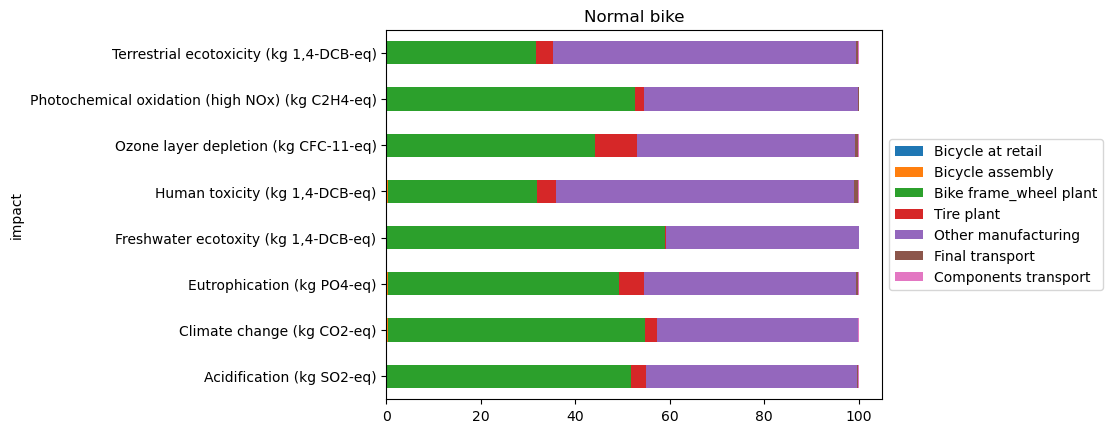

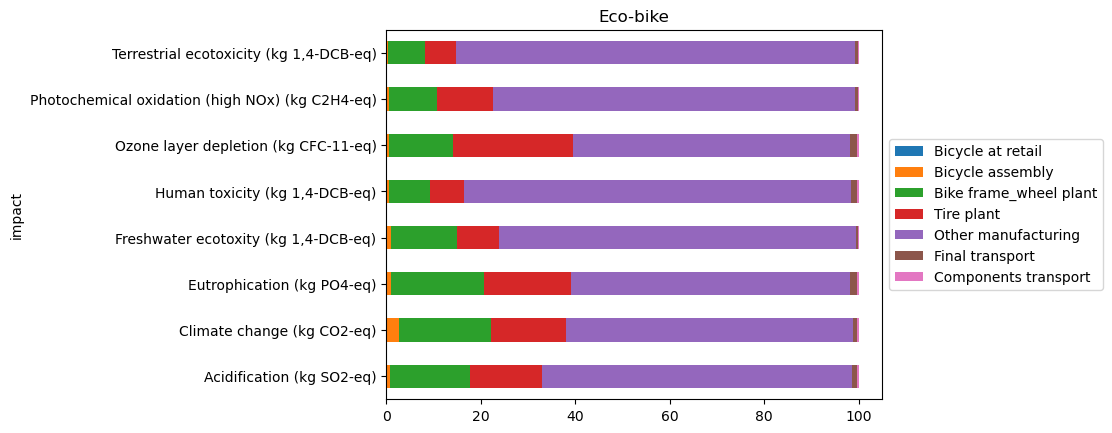

In [52]:
# Create stacked bar chart
Dprof_plot.plot(kind='barh', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Normal bike')

Dprof_eco_plot.plot(kind='barh', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Eco-bike')

We can see that the bike frame + wheel is the one for which the share of contribution across all impact categories has the largest decrease. How much has the contribution of the bike frame + wheel decreased for GWP and human toxicity when switching from primary to secondary aluminium? 
1. GWP 60%, human toxicity 10%
2. GWP 35%, human toxicity 20%
3. GWP 35%, human toxicity 45%
4. GWP 20%, human toxicity 20%
5. GWP 60%, human toxicity 20%
6. GWP 20%, human toxicity 45%

Define your answer as the variable `answer_6` (e.g. `answer_6 = {1}` if you think the correct statement is statement {1} or `answer_6 = {1, 2}` if you think the correct statements are statements {1, 2}).

In [53]:
answer_6 = {2}

**_Run the cell under to check the format of your answer(s)_**

In [54]:
assert all (type(i) in [set] for i in [answer_6]), 'The answer(s) must be a set of values'

## **7. Structural Path Analysis** _(10 points)_

The cell below performs a Structural Path Analysis for the climate change impact category for both bikes. 

What pathways/processes contribute to the most impacts? Provide a brief quantitative analysis in the form of a paragraph for each type of bike that you have to **deliver on Blackboard**.

**_Run the cell under to run the Structural Path Analysis - you have nothing to code, just run the cell!_** The cell might take a few seconds to run, be patient :-)

In [55]:
### Structural Path Analysis for the bike
SPA_bike = run_SPA.run_SPA_using_pyspa(A, L, C, S, y, 
                            'Climate change (kg CO2-eq)', 'DR_GHG_emissions_(kgCO2e)', 'TR_GHG_emissions_(kgCO2e)',
                            1, 5, 'files_PS8_V1_0/run_SPA_folder/Thresholds_template_perc.csv')

### Structural Path Analysis for the ecobike
SPA_ecobike = run_SPA.run_SPA_using_pyspa(A_eco, L_eco, C, S, y, 
                            'Climate change (kg CO2-eq)', 'DR_GHG_emissions_(kgCO2e)', 'TR_GHG_emissions_(kgCO2e)',
                            1, 5, 'files_PS8_V1_0/run_SPA_folder/Thresholds_template_perc.csv')

Extracting names of satellites...Done
Reading Thresholds...Done
Validating read data...The A matrix loaded is square and contains 207 sectors/processes across 1 region(s), and is described in the infosheet provided, for 1 satellite(s)...Done
Generating vectors of direct and total multipliers...Done
------ Ready to conduct the Structural Path Analysis ------
Supply Chain object created, extracting pathways, which will take some time...
Started at 10:08:16
Now calculating remainders
Ended at 10:08:16. It took 0 seconds to extract 91 pathways and calculate 92 remainders.
Started at 10:08:16
Extracting names of satellites...Done
Reading Thresholds...Done
Validating read data...The A matrix loaded is square and contains 207 sectors/processes across 1 region(s), and is described in the infosheet provided, for 1 satellite(s)...Done
Generating vectors of direct and total multipliers...Done
------ Ready to conduct the Structural Path Analysis ------
Supply Chain object created, extracting pathw

In [56]:
### Displaying results of Structural Path Analysis for the bike
display(SPA_bike)

,% of total intensity,direct intensity of last node in pathway,Stage 1 direct intensity,Stage 1,Stage 2 direct intensity,Stage 2,Stage 3 direct intensity,Stage 3,Stage 4 direct intensity,Stage 4,Stage 5 direct intensity,Stage 5
0,24.890812%,32.276151400384954,0.0,Bicycle assembly,0.0,Bike frame_wheel plant,8.993618524696956,Aluminium and aluminium products - tonnes,32.276151400384954,Electricity by coal - TJ,,0
1,16.054733%,20.818324332776005,0.0,Bicycle assembly,0.0,Other manufacturing,5.800941538840673,Aluminium and aluminium products - tonnes,20.818324332776005,Electricity by coal - TJ,,0
2,6.935724%,8.993618524696956,0.0,Bicycle assembly,0.0,Bike frame_wheel plant,8.993618524696956,Aluminium and aluminium products - tonnes,,0,0,0
3,4.473586%,5.800941538840673,0.0,Bicycle assembly,0.0,Other manufacturing,5.800941538840673,Aluminium and aluminium products - tonnes,,0,0,0
4,3.376133%,4.377864260452513,0.0,Bicycle assembly,0.0,Bike frame_wheel plant,8.993618524696956,Aluminium and aluminium products - tonnes,4.377864260452513,Electricity by gas - TJ,,0
5,2.790266%,3.618164930395185,0.0,Bicycle assembly,0.0,Bike frame_wheel plant,8.993618524696956,Aluminium and aluminium products - tonnes,1.0081869656561007,Aluminium and aluminium products - tonnes,3.618164930395185,Electricity by coal - TJ
6,2.315428%,3.002437547407736,0.0,Bicycle assembly,0.0,Bike frame_wheel plant,8.993618524696956,Aluminium and aluminium products - tonnes,32.276151400384954,Electricity by coal - TJ,3.002437547407736,Other Bituminous Coal - tonnes
7,2.300385%,2.982931358382197,0.0,Bicycle assembly,0.0,Other manufacturing,2.982931358382197,Basic iron and steel and of ferro-alloys and f...,,0,0,0
8,2.177628%,2.8237504815360968,0.0,Bicycle assembly,0.0,Other manufacturing,5.800941538840673,Aluminium and aluminium products - tonnes,2.8237504815360968,Electricity by gas - TJ,,0
9,1.799740%,2.3337395489334734,0.0,Bicycle assembly,0.0,Other manufacturing,5.800941538840673,Aluminium and aluminium products - tonnes,0.6502870487481873,Aluminium and aluminium products - tonnes,2.3337395489334734,Electricity by coal - TJ


In [57]:
### Displaying results of Structural Path Analysis for the ecobike
display(SPA_ecobike)

,% of total intensity,direct intensity of last node in pathway,Stage 1 direct intensity,Stage 1,Stage 2 direct intensity,Stage 2,Stage 3 direct intensity,Stage 3,Stage 4 direct intensity,Stage 4,Stage 5 direct intensity,Stage 5
0,14.816261%,2.982931358382197,0.0,Bicycle assembly,0.0,Other manufacturing,2.982931358382197,Basic iron and steel and of ferro-alloys and f...,,0,0,0
1,5.295977%,1.0662296810392788,0.0,Bicycle assembly,0.0,Other manufacturing,0.41644787285406987,Plastics; basic - tonnes,1.0662296810392788,Electricity by coal - TJ,,0
2,3.730363%,0.7510272405801426,0.0,Bicycle assembly,0.0,Bike frame_wheel plant,0.7510272405801426,Electricity by gas - TJ,,0,0,0
3,2.933464%,0.5905891435071481,0.0,Bicycle assembly,0.0,Other manufacturing,2.982931358382197,Basic iron and steel and of ferro-alloys and f...,0.5905891435071481,Basic iron and steel and of ferro-alloys and f...,,0
4,2.797772%,0.5632704304351069,0.0,Bicycle assembly,0.0,Other manufacturing,0.5632704304351069,Electricity by gas - TJ,,0,0,0
5,2.181616%,0.4392209099843732,0.0,Bicycle assembly,0.0,Tire plant,0.20188826805451002,Rubber and plastic products (25) - tonnes,0.4392209099843732,Electricity by coal - TJ,,0
6,2.068502%,0.41644787285406987,0.0,Bicycle assembly,0.0,Other manufacturing,0.41644787285406987,Plastics; basic - tonnes,,0,0,0
7,1.924051%,0.38736567759328416,0.0,Bicycle assembly,0.0,Other manufacturing,0.41644787285406987,Plastics; basic - tonnes,0.11409127096672567,Naphtha - tonnes,0.38736567759328416,Crude petroleum and services related to crude ...
8,1.865181%,0.3755136202900713,0.0,Bicycle assembly,0.3755136202900713,Electricity by gas - TJ,,0,0,0,0,0
9,1.671613%,0.33654288101508706,0.0,Bicycle assembly,0.0,Bike frame_wheel plant,0.0,Secondary aluminium for treatment; Re-processi...,0.33654288101508706,Electricity by coal - TJ,,0
